In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/raroog/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
class TrialSolution(tf.keras.models.Model):
  def __init__(self, conditions, n_i, n_h, n_o=1, activation='sigmoid'):
    super(TrialSolution, self).__init__()
    self.n_i = n_i
    self.n_h = n_h
    self.n_o = n_o
    self.conditions = conditions
    self.hidden_layer = tf.keras.layers.Dense(units=self.n_h, activation=activation)
    self.output_layer = tf.keras.layers.Dense(units=self.n_o, activation='linear')
    
  def call(self, X):
    X = tf.convert_to_tensor(X)
    response = self.hidden_layer(X)
    response = self.output_layer(response)
    
    boundary_value = tf.constant(0., dtype='float64', shape=response.get_shape())
    
    for condition in self.conditions:
      vanishing = tf.constant(1., dtype='float64', shape=response.get_shape())
      if condition['type'] == 'dirichlet':
        temp_bc = tf.reshape(condition['function'](X), shape=boundary_value.shape)
        for vanisher in self.conditions:
          if vanisher['variable'] != condition['variable'] and vanisher['value'] != condition['value']:
            vanishing *= (X[:, vanisher['variable']]
                                    - tf.constant(vanisher['value'], dtype='float64', shape=boundary_value.shape))
        boundary_value += temp_bc * vanishing
        
        response *= (tf.reshape(X[:, condition['variable']], shape=boundary_value.shape) - tf.constant(condition['value'], dtype='float64', shape=boundary_value.shape))
      
    response += boundary_value
    return response

In [3]:
inits = [{'variable':0, 'value':0, 'type':'dirichlet',
        'function':lambda X: tf.constant(1., dtype='float64', shape=(X.shape[0],1))}]

In [4]:
ts = TrialSolution(inits, n_i=1, n_h=10, n_o=1)

In [5]:
Xs = np.arange(0, 1., 0.1) + 1e-6
Xs = Xs.reshape(-1,1)

In [6]:
def diff_loss(network, inputs):
  with tf.GradientTape() as tape:
    inputs = tf.convert_to_tensor(inputs)
    tape.watch(inputs)
    response = network(inputs)
  grads = tape.gradient(response, inputs)
  X = inputs
  loss = tf.square(grads + tf.multiply(X + (1 + 3*X**2)/(1+X+X**3), response)
          - X**3 -2*X - X**2*(1 + 3*X**2)/(1+X+X**3))
  return loss

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
train_loss = tf.keras.metrics.Mean('train')

In [8]:
@tf.function
def train_step(X):
  with tf.GradientTape() as tape:
    loss = diff_loss(ts, X)
  gradients = tape.gradient(loss, ts.trainable_variables)
  optimizer.apply_gradients(zip(gradients, ts.trainable_variables))
  
  train_loss(loss)

In [9]:
ts(tf.convert_to_tensor(Xs))

<tf.Tensor: id=93, shape=(10, 1), dtype=float64, numpy=
array([[0.9999998 ],
       [0.98014115],
       [0.96054513],
       [0.94120499],
       [0.92210957],
       [0.90324345],
       [0.88458721],
       [0.86611765],
       [0.8478081 ],
       [0.82962882]])>

0.7873293
1.0777509
0.95820147
0.8343074
0.81884843
0.79933506
0.74489665
0.69243586
0.663866
0.64534163
0.6195756
0.58677727
0.5571411
0.5355488
0.51729774
0.49667692
0.47389087
0.45295504
0.4358608
0.42066425
0.40479782
0.3882559
0.37293538
0.35980663
0.34783548
0.33574912
0.3237231
0.3127828
0.30319577
0.29422012
0.285288
0.27670178
0.26897407
0.26198885
0.25524136
0.2486073
0.24239007
0.23672278
0.23135452
0.22606686
0.22095934
0.21619357
0.21169615
0.20729534
0.20298967
0.19889407
0.19501574
0.19125171
0.18756543
0.1840216
0.18065083
0.1773981
0.17422342
0.17115737
0.16822809
0.16540729
0.16266172
0.16000287
0.1574508
0.15499038
0.152597
0.15027407
0.14803432
0.14586854
0.14375974
0.14170897
0.1397241
0.13779862
0.13592128
0.13409321
0.132319
0.13059328
0.12890911
0.1272681
0.1256724
0.12411725
0.122598715
0.12111849
0.11967672
0.11826934
0.11689461
0.115553714
0.11424531
0.1129664
0.1117166
0.11049616
0.10930315
0.10813584
0.10699437
0.10587811
0.1047853
0.10371532
0.10266812
0.1

0.013694188
0.013677398
0.01366065
0.013643943
0.013627279
0.013610656
0.013594075
0.013577536
0.013561037
0.013544581
0.0135281645
0.013511789
0.013495455
0.01347916
0.013462907
0.013446693
0.01343052
0.013414387
0.0133982925
0.013382238
0.013366224
0.013350248
0.0133343125
0.013318415
0.013302556
0.013286737
0.0132709555
0.013255214
0.01323951
0.013223845
0.013208217
0.013192628
0.013177075
0.0131615605
0.013146085
0.013130645
0.013115244
0.013099879
0.01308455
0.013069259
0.013054005
0.013038788
0.0130236065
0.013008461
0.0129933525
0.01297828
0.012963244
0.012948243
0.012933278
0.012918349
0.012903455
0.012888596
0.0128737725
0.012858984
0.012844231
0.012829512
0.012814829
0.01280018
0.012785565
0.012770984
0.012756438
0.012741926
0.012727448
0.012713003
0.012698593
0.012684216
0.0126698725
0.012655563
0.0126412865
0.012627043
0.012612832
0.012598655
0.01258451
0.012570399
0.012556321
0.012542275
0.012528266
0.012514298
0.012500389
0.0124865845
0.012473025
0.0124601135
0.012449012


0.0075147673
0.007550553
0.0076255593
0.0077274237
0.007789932
0.0077893436
0.0078088874
0.007857998
0.007865337
0.007871113
0.007901493
0.0079020895
0.007909493
0.007926069
0.007921599
0.007932521
0.007935594
0.007934362
0.007942212
0.007937874
0.00794206
0.007940856
0.007939451
0.007940839
0.0079366295
0.007937811
0.007933667
0.0079329265
0.007929965
0.007927195
0.007925153
0.007921124
0.00791924
0.007914851
0.007912489
0.007908337
0.007905221
0.007901488
0.007897689
0.007894249
0.007890032
0.007886635
0.0078822905
0.007878726
0.007874455
0.0078706285
0.007866505
0.007862428
0.007858424
0.00785418
0.007850217
0.007845907
0.007841903
0.007837609
0.007833516
0.007829281
0.007825092
0.007820912
0.007816656
0.007812502
0.007808219
0.007804057
0.007799784
0.0077955904
0.007791344
0.007787116
0.0077828974
0.0077786474
0.0077744434
0.007770189
0.007765984
0.00776174
0.007757525
0.007753298
0.007749073
0.007744861
0.0077406336
0.00773643
0.007732208
0.007728006
0.0077237953
0.0077195927
0.00

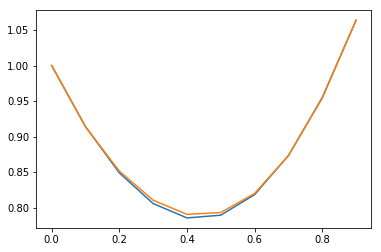

0.0066338573
0.006630761
0.0066276677
0.0066245776
0.00662149
0.006618406
0.0066153244
0.006612246
0.00660917
0.006606098
0.006603028
0.006599962
0.006596898
0.0065938374
0.006590779
0.006587724
0.0065846723
0.006581623
0.006578577
0.006575534
0.0065724934
0.006569456
0.006566421
0.0065633897
0.0065603605
0.006557335
0.0065543125
0.006551292
0.0065482743
0.0065452596
0.006542248
0.0065392395
0.006536234
0.006533231
0.006530232
0.006527234
0.0065242397
0.006521248
0.006518259
0.0065152734
0.0065122903
0.0065093106
0.0065063327
0.006503358
0.0065003857
0.0064974166
0.006494451
0.0064914874
0.006488527
0.006485569
0.0064826137
0.006479661
0.0064767115
0.006473765
0.006470821
0.00646788
0.006464942
0.006462006
0.0064590727
0.0064561428
0.006453215
0.0064502903
0.0064473688
0.0064444495
0.006441533
0.006438619
0.0064357077
0.006432799
0.006429894
0.006426991
0.006424091
0.006421194
0.0064182985
0.0064154062
0.006412517
0.00640963
0.006406746
0.006403865
0.0064009866
0.0063981107
0.006395237

0.0053121825
0.005310321
0.0053084614
0.0053066025
0.005304745
0.005302889
0.005301033
0.0052991793
0.005297326
0.005295474
0.005293623
0.0052917735
0.0052899253
0.0052880775
0.0052862316
0.005284386
0.005282542
0.0052806996
0.005278858
0.005277017
0.0052751773
0.0052733393
0.005271502
0.0052696653
0.0052678306
0.005265997
0.005264164
0.005262332
0.0052605015
0.0052586724
0.0052568438
0.0052550165
0.00525319
0.0052513652
0.0052495417
0.005247719
0.0052458975
0.0052440767
0.0052422574
0.005240439
0.005238622
0.005236806
0.0052349907
0.0052331765
0.005231364
0.0052295523
0.005227742
0.005225932
0.0052241236
0.005222317
0.0052205105
0.005218705
0.005216901
0.005215098
0.0052132965
0.005211496
0.005209696
0.005207897
0.0052060997
0.0052043037
0.005202508
0.005200714
0.0051989206
0.0051971287
0.005195338
0.005193548
0.005191759
0.005189971
0.0051881843
0.005186399
0.005184614
0.005182831
0.005181048
0.005179267
0.0051774867
0.0051757074
0.0051739295
0.0051721525
0.0051703765
0.005168602
0.0

0.0042552617
0.0042540166
0.0042527723
0.0042515285
0.004250286
0.0042490438
0.0042478023
0.004246562
0.0042453217
0.004244082
0.004242843
0.004241605
0.0042403676
0.0042391308
0.004237895
0.00423666
0.0042354255
0.0042341915
0.0042329584
0.0042317263
0.0042304946
0.004229264
0.0042280336
0.0042268042
0.0042255754
0.0042243474
0.00422312
0.004221894
0.0042206678
0.0042194426
0.0042182184
0.0042169946
0.004215772
0.0042145494
0.004213328
0.004212107
0.004210887
0.0042096674
0.004208449
0.0042072306
0.004206013
0.0042047957
0.0042035794
0.004202364
0.004201149
0.004199935
0.0041987216
0.004197509
0.004196297
0.0041950853
0.004193875
0.0041926648
0.004191456
0.004190247
0.0041890396
0.004187832
0.004186626
0.0041854205
0.0041842153
0.004183011
0.0041818074
0.0041806046
0.0041794023
0.004178201
0.004177
0.0041758
0.0041746004
0.0041734017
0.0041722036
0.0041710064
0.0041698096
0.004168614
0.004167418
0.004166223
0.0041650287
0.004163835
0.004162642
0.00416145
0.0041602585
0.0041590673
0.00

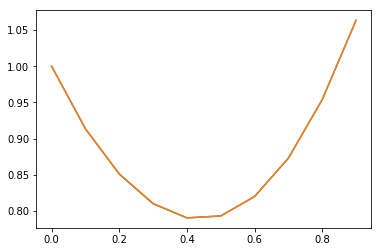

0.0037102946
0.0037093686
0.0037084431
0.003707518
0.0037065933
0.0037056692
0.0037047456
0.0037038224
0.0037028997
0.0037019774
0.0037010557
0.0037001343
0.0036992133
0.003698293
0.003697373
0.0036964535
0.0036955343
0.0036946158
0.0036936975
0.00369278
0.0036918626
0.003690946
0.0036900295
0.0036891138
0.0036881983
0.0036872833
0.003686369
0.0036854548
0.0036845412
0.003683628
0.0036827154
0.0036818031
0.0036808914
0.00367998
0.0036790692
0.0036781586
0.0036772487
0.0036763393
0.00367543
0.0036745216
0.0036736133
0.0036727055
0.0036717984
0.0036708915
0.003669985
0.0036690792
0.0036681737
0.0036672687
0.0036663641
0.0036654598
0.0036645562
0.003663653
0.0036627501
0.0036618477
0.003660946
0.0036600444
0.0036591433
0.0036582428
0.0036573426
0.003656443
0.0036555438
0.0036546448
0.0036537466
0.0036528485
0.0036519512
0.003651054
0.0036501575
0.0036492613
0.0036483656
0.0036474704
0.0036465754
0.003645681
0.003644787
0.0036438936
0.0036430005
0.0036421078
0.0036412156
0.0036403239
0.003

0.00320541
0.0032047334
0.003204057
0.003203381
0.0032027054
0.00320203
0.0032013548
0.00320068
0.0032000055
0.0031993312
0.0031986572
0.0031979834
0.00319731
0.003196637
0.003195964
0.0031952914
0.0031946192
0.003193947
0.0031932753
0.0031926038
0.0031919328
0.0031912618
0.0031905912
0.003189921
0.0031892508
0.0031885812
0.0031879118
0.0031872424
0.0031865735
0.003185905
0.0031852366
0.0031845686
0.0031839008
0.0031832333
0.003182566
0.0031818992
0.0031812324
0.003180566
0.0031798999
0.0031792342
0.0031785686
0.0031779034
0.0031772384
0.0031765737
0.0031759092
0.0031752451
0.003174581
0.0031739175
0.003173254
0.0031725906
0.0031719275
0.0031712647
0.0031706023
0.0031699399
0.003169278
0.0031686162
0.0031679547
0.0031672937
0.0031666327
0.0031659722
0.0031653119
0.0031646518
0.003163992
0.0031633326
0.0031626734
0.0031620145
0.0031613559
0.0031606974
0.0031600392
0.0031593814
0.003158724
0.0031580664
0.0031574096
0.0031567528
0.0031560962
0.00315544
0.0031547842
0.0031541286
0.00315347

0.0028162475
0.0028157425
0.0028152307
0.0028147232
0.0028142158
0.0028137045
0.0028131974
0.0028126882
0.0028121779
0.0028116705
0.0028111606
0.0028106514
0.0028101436
0.002809634
0.0028091252
0.0028086172
0.0028081078
0.0028075997
0.0028070915
0.0028065825
0.0028060747
0.0028055666
0.0028050584
0.002804551
0.002804043
0.0028035352
0.002803028
0.0028025208
0.0028020134
0.0028015068
0.002801
0.0028004933
0.0027999866
0.00279948
0.002798974
0.002798468
0.002797962
0.0027974565
0.0027969508
0.0027964453
0.0027959398
0.0027954348
0.0027949298
0.002794425
0.0027939205
0.0027934161
0.0027929118
0.0027924078
0.002791904
0.0027914003
0.002790897
0.0027903935
0.0027898904
0.0027893872
0.0027888846
0.0027883817
0.002787879
0.0027873765
0.002786874
0.002786372
0.00278587
0.0027853684
0.0027848668
0.0027843653
0.0027838643
0.0027833632
0.0027828622
0.0027823616
0.002781861
0.0027813609
0.0027808608
0.0027803606
0.002779861
0.0027793613
0.002778862
0.0027783627
0.0027778638
0.0027773648
0.00277686

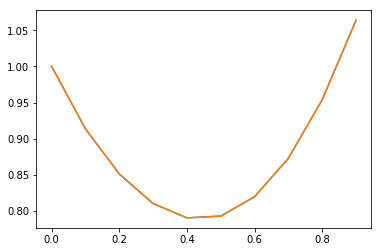

0.0025703085
0.0025698808
0.0025694533
0.0025690258
0.0025685984
0.0025681714
0.0025677443
0.0025673173
0.0025668908
0.002566464
0.0025660377
0.0025656114
0.002565185
0.0025647592
0.0025643331
0.0025639075
0.002563482
0.0025630565
0.0025626312
0.002562206
0.0025617809
0.002561356
0.0025609313
0.0025605066
0.0025600821
0.002559658
0.0025592337
0.0025588095
0.0025583857
0.002557962
0.0025575382
0.0025571147
0.0025566914
0.0025562681
0.002555845
0.0025554223
0.0025549994
0.0025545768
0.0025541543
0.002553732
0.0025533098
0.0025528877
0.0025524655
0.0025520439
0.0025516222
0.0025512006
0.0025507791
0.002550358
0.0025499368
0.0025495158
0.002549095
0.0025486744
0.0025482539
0.0025478334
0.002547413
0.002546993
0.002546573
0.002546153
0.0025457335
0.002545314
0.0025448943
0.002544475
0.002544056
0.0025436368
0.002543218
0.002542799
0.0025423807
0.002541962
0.0025415437
0.0025411255
0.0025407076
0.0025402897
0.0025398717
0.002539454
0.0025390366
0.0025386193
0.002538202
0.0025377849
0.0025373

0.002320608
0.0023202645
0.0023199213
0.002319578
0.002319235
0.002318892
0.002318549
0.0023182062
0.0023178635
0.002317521
0.0023171785
0.002316836
0.0023164938
0.0023161517
0.0023158097
0.0023154677
0.002315126
0.002314784
0.0023144423
0.0023141007
0.0023137594
0.0023134178
0.0023130768
0.0023127354
0.0023123946
0.0023120535
0.0023117126
0.002311372
0.002311031
0.0023106907
0.00231035
0.00231001
0.0023096695
0.0023093293
0.0023089894
0.0023086495
0.0023083095
0.0023079698
0.0023076301
0.0023072904
0.0023069512
0.0023066117
0.0023062725
0.0023059333
0.0023055943
0.0023052553
0.0023049165
0.0023045777
0.002304239
0.0023039004
0.0023035621
0.0023032236
0.0023028853
0.0023025472
0.0023022091
0.0023018713
0.0023015332
0.0023011956
0.002300858
0.0023005204
0.0023001828
0.0022998455
0.0022995083
0.0022991712
0.002298834
0.0022984971
0.0022981602
0.0022978233
0.0022974866
0.0022971502
0.0022968138
0.0022964773
0.002296141
0.002295805
0.0022954687
0.0022951327
0.002294797
0.002294461
0.002294

0.0021429304
0.002142641
0.0021423516
0.0021420622
0.002141773
0.0021414838
0.0021411947
0.0021409057
0.0021406168
0.0021403278
0.002140039
0.0021397504
0.0021394617
0.0021391732
0.0021388847
0.0021385963
0.002138308
0.0021380198
0.0021377315
0.0021374435
0.0021371555
0.0021368677
0.0021365797
0.002136292
0.0021360044
0.0021357166
0.002135429
0.0021351418
0.0021348542
0.0021345671
0.0021342798
0.0021339927
0.0021337057
0.0021334186
0.0021331317
0.0021328449
0.002132558
0.0021322714
0.0021319848
0.0021316982
0.0021314118
0.0021311254
0.002130839
0.002130553
0.0021302667
0.0021299806
0.0021296947
0.0021294088
0.0021291228
0.0021288372
0.0021285515
0.0021282658
0.0021279803
0.002127695
0.0021274094
0.0021271242
0.002126839
0.0021265538
0.0021262688
0.0021259838
0.0021256988
0.0021254139
0.002125129
0.0021248446
0.0021245598
0.0021242753
0.0021239908
0.0021237065
0.0021234222
0.002123138
0.0021228539
0.0021225698
0.0021222858
0.0021220017
0.002121718
0.002121434
0.0021211505
0.002120867
0.

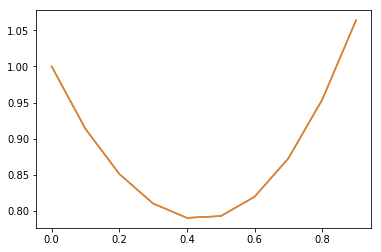

0.0019993966
0.0019991475
0.001998898
0.001998649
0.0019983998
0.0019981507
0.0019979018
0.001997653
0.001997404
0.0019971554
0.0019969065
0.0019966576
0.001996409
0.0019961603
0.0019959116
0.001995663
0.0019954143
0.0019951658
0.0019949174
0.001994669
0.0019944208
0.0019941726
0.0019939244
0.0019936762
0.0019934282
0.0019931803
0.0019929323
0.0019926843
0.0019924366
0.0019921889
0.0019919411
0.0019916936
0.001991446
0.0019911984
0.0019909511
0.0019907036
0.0019904564
0.001990209
0.0019899618
0.0019897148
0.0019894678
0.0019892207
0.0019889737
0.001988727
0.00198848
0.0019882333
0.0019879865
0.00198774
0.0019874934
0.0019872468
0.0019870005
0.0019867541
0.0019865078
0.0019862615
0.0019860151
0.001985769
0.001985523
0.001985277
0.001985031
0.001984785
0.0019845392
0.0019842936
0.0019840477
0.001983802
0.0019835564
0.001983311
0.0019830654
0.00198282
0.0019825748
0.0019823294
0.0019820842
0.001981839
0.001981594
0.0019813487
0.0019811038
0.0019808589
0.0019806141
0.0019803692
0.001980124

0.0018598699
0.001859656
0.0018594421
0.0018592284
0.0018590146
0.0018588009
0.0018585873
0.0018583736
0.0018581601
0.0018579466
0.0018577331
0.0018575197
0.0018573065
0.0018570931
0.0018568798
0.0018566666
0.0018564535
0.0018562403
0.0018560273
0.0018558142
0.0018556013
0.0018553884
0.0018551756
0.0018549628
0.00185475
0.0018545373
0.0018543246
0.001854112
0.0018538994
0.0018536869
0.0018534744
0.001853262
0.0018530496
0.0018528373
0.001852625
0.0018524128
0.0018522006
0.0018519885
0.0018517764
0.0018515644
0.0018513524
0.0018511404
0.0018509285
0.0018507168
0.0018505049
0.0018502931
0.0018500815
0.0018498698
0.0018496582
0.0018494467
0.0018492352
0.0018490237
0.0018488123
0.001848601
0.0018483896
0.0018481785
0.0018479672
0.0018477561
0.0018475449
0.0018473339
0.0018471229
0.0018469119
0.001846701
0.0018464901
0.0018462793
0.0018460685
0.0018458578
0.0018456471
0.0018454365
0.0018452259
0.0018450153
0.0018448049
0.0018445944
0.001844384
0.0018441736
0.0018439634
0.0018437532
0.001843

0.0017453912
0.0017452042
0.0017450172
0.0017448304
0.0017446436
0.0017444568
0.0017442701
0.0017440834
0.0017438966
0.00174371
0.0017435235
0.0017433369
0.0017431504
0.0017429639
0.0017427775
0.0017425912
0.0017424048
0.0017422185
0.0017420322
0.001741846
0.0017416598
0.0017414737
0.0017412875
0.0017411015
0.0017409155
0.0017407294
0.0017405435
0.0017403576
0.0017401718
0.0017399859
0.0017398001
0.0017396144
0.0017394287
0.001739243
0.0017390574
0.0017388718
0.0017386862
0.0017385008
0.0017383152
0.0017381299
0.0017379444
0.0017377591
0.0017375738
0.0017373885
0.0017372033
0.0017370181
0.0017368329
0.0017366478
0.0017364627
0.0017362777
0.0017360927
0.0017359077
0.0017357229
0.001735538
0.0017353531
0.0017351683
0.0017349835
0.0017347989
0.0017346141
0.0017344295
0.0017342449
0.0017340604
0.0017338758
0.0017336913
0.0017335069
0.0017333225
0.0017331381
0.0017329538
0.0017327695
0.0017325853
0.0017324011
0.0017322169
0.0017320327
0.0017318487
0.0017316646
0.0017314806
0.0017312967
0.00

0.0016377271
0.0016375636
0.0016374001
0.0016372367
0.0016370732
0.0016369098


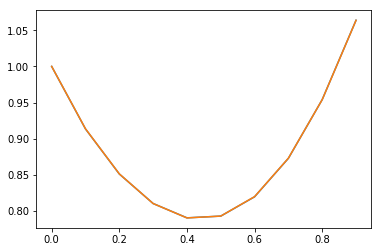

0.0016367465
0.0016365831
0.0016364198
0.0016362563
0.001636093
0.0016359296
0.0016357662
0.001635603
0.0016354397
0.0016352765
0.0016351133
0.0016349502
0.001634787
0.0016346239
0.0016344609
0.0016342978
0.0016341348
0.0016339718
0.001633809
0.001633646
0.0016334831
0.0016333204
0.0016331575
0.0016329947
0.001632832
0.0016326692
0.0016325066
0.001632344
0.0016321813
0.0016320187
0.0016318562
0.0016316937
0.0016315313
0.0016313688
0.0016312064
0.001631044
0.0016308817
0.0016307193
0.001630557
0.0016303947
0.0016302326
0.0016300704
0.0016299082
0.001629746
0.001629584
0.001629422
0.0016292599
0.0016290979
0.0016289359
0.001628774
0.001628612
0.0016284502
0.0016282884
0.0016281266
0.0016279648
0.0016278031
0.0016276414
0.0016274797
0.0016273181
0.0016271565
0.0016269949
0.0016268333
0.0016266719
0.0016265103
0.0016263489
0.0016261875
0.0016260261
0.0016258648
0.0016257034
0.0016255422
0.0016253808
0.0016252197
0.0016250585
0.0016248974
0.0016247361
0.0016245751
0.001624414
0.001624253
0.

0.0015470282
0.001546883
0.0015467377
0.0015465926
0.0015464474
0.0015463023
0.0015461572
0.0015460121
0.0015458671
0.001545722
0.0015455771
0.0015454321
0.0015452872
0.0015451423
0.0015449973
0.0015448525
0.0015447077
0.0015445629
0.001544418
0.0015442733
0.0015441286
0.0015439839
0.0015438392
0.0015436946
0.00154355
0.0015434055
0.0015432609
0.0015431163
0.0015429718
0.0015428273
0.0015426829
0.0015425384
0.001542394
0.0015422497
0.0015421053
0.001541961
0.0015418167
0.0015416725
0.0015415283
0.001541384
0.0015412398
0.0015410957
0.0015409515
0.0015408074
0.0015406634
0.0015405193
0.0015403753
0.0015402313
0.0015400874
0.0015399434
0.0015397995
0.0015396556
0.0015395117
0.001539368
0.0015392242
0.0015390804
0.0015389366
0.0015387929
0.0015386492
0.0015385055
0.0015383619
0.0015382182
0.0015380747
0.0015379312
0.0015377876
0.0015376441
0.0015375005
0.0015373571
0.0015372137
0.0015370703
0.001536927
0.0015367835
0.0015366402
0.0015364969
0.0015363537
0.0015362104
0.0015360672
0.0015359

0.0014580372
0.0014580019
0.0014579376
0.0014578134
0.0014577247
0.0014576622
0.0014575532
0.001457431
0.0014573445
0.001457253
0.0014571286
0.0014570125
0.0014569167
0.0014568052
0.0014566779
0.0014565645
0.0014564581
0.0014563367
0.0014562111
0.0014560968
0.0014559816
0.0014558559
0.0014557318
0.0014556147
0.0014554941
0.0014553673
0.0014552436
0.0014551234
0.0014549992
0.0014548722
0.0014547486
0.0014546257
0.0014544998
0.0014543731
0.001454249
0.0014541245
0.0014539978
0.0014538715
0.0014537467
0.0014536211
0.0014534942
0.0014533682
0.0014532428
0.0014531165
0.0014529898
0.0014528637
0.001452738
0.0014526115
0.0014524849
0.0014523587
0.0014522326
0.001452106
0.0014519795
0.0014518534
0.0014517271
0.0014516006
0.001451474
0.0014513478
0.0014512215
0.0014510951
0.0014509687
0.0014508425
0.001450716
0.0014505896
0.0014504633
0.001450337
0.0014502107
0.0014500843
0.0014499581
0.0014498319
0.0014497057
0.0014495794
0.0014494532
0.0014493271
0.0014492009
0.0014490746
0.0014489484
0.00144

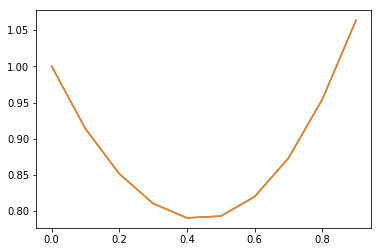

0.0013911704
0.0013910546
0.0013909389
0.0013908232
0.0013907074
0.0013905917
0.001390476
0.0013903603
0.0013902447
0.0013901291
0.0013900134
0.0013898979
0.0013897823
0.0013896667
0.0013895512
0.0013894357
0.0013893201
0.0013892046
0.0013890893
0.0013889738
0.0013888583
0.0013887427
0.0013886272
0.0013885117
0.0013883963
0.0013882808
0.0013881654
0.0013880499
0.0013879345
0.0013878192
0.0013877038
0.0013875886
0.0013874732
0.001387358
0.0013872426
0.0013871273
0.0013870122
0.0013868969
0.0013867817
0.0013866666
0.0013865514
0.0013864363
0.0013863211
0.001386206
0.0013860909
0.0013859759
0.0013858608
0.0013857458
0.0013856308
0.0013855158
0.0013854008
0.0013852859
0.001385171
0.001385056
0.0013849412
0.0013848263
0.0013847114
0.0013845966
0.0013844817
0.0013843669
0.0013842521
0.0013841374
0.0013840226
0.0013839079
0.0013837932
0.0013836785
0.0013835639
0.0013834492
0.0013833346
0.00138322
0.0013831054
0.0013829909
0.0013828763
0.0013827618
0.0013826472
0.0013825328
0.0013824182
0.0013

0.0013246533
0.0013245486
0.001324444
0.0013243393
0.0013242348
0.0013241301
0.0013240256
0.0013239209
0.0013238164
0.0013237118
0.0013236074
0.0013235029
0.0013233983
0.0013232939
0.0013231895
0.001323085
0.0013229806
0.0013228762
0.0013227718
0.0013226675
0.001322563
0.0013224587
0.0013223544
0.0013222501
0.0013221458
0.0013220416
0.0013219373
0.0013218331
0.0013217289
0.0013216246
0.0013215204
0.0013214163
0.0013213122
0.001321208
0.0013211039
0.0013209998
0.0013208957
0.0013207917
0.0013206876
0.0013205835
0.0013204796
0.0013203755
0.0013202715
0.0013201676
0.0013200636
0.0013199596
0.0013198557
0.0013197518
0.0013196479
0.001319544
0.0013194402
0.0013193364
0.0013192325
0.0013191287
0.0013190248
0.0013189211
0.0013188174
0.0013187137
0.0013186099
0.0013185062
0.0013184025
0.0013182987
0.0013181951
0.0013180914
0.0013179878
0.0013178842
0.0013177806
0.0013176771
0.0013175735
0.0013174699
0.0013173664
0.0013172629
0.0013171594
0.0013170559
0.0013169524
0.0013168489
0.0013167455
0.00

0.0012651823
0.0012650876
0.001264993
0.0012648983
0.0012648037
0.001264709
0.0012646144
0.0012645199
0.0012644253
0.0012643307
0.0012642362
0.0012641416
0.0012640471
0.0012639527
0.0012638582
0.0012637636
0.0012636692
0.0012635748
0.0012634804
0.001263386
0.0012632916
0.0012631972
0.0012631027
0.0012630085
0.001262914
0.0012628197
0.0012627254
0.0012626312
0.0012625369
0.0012624426
0.0012623483
0.0012622541
0.0012621598
0.0012620656
0.0012619714
0.0012618772
0.0012617831
0.0012616889
0.0012615947
0.0012615006
0.0012614065
0.0012613124
0.0012612183
0.0012611243
0.0012610302
0.0012609361
0.0012608421
0.001260748
0.0012606541
0.00126056
0.0012604661
0.0012603721
0.0012602782
0.0012601842
0.0012600903
0.0012599964
0.0012599025
0.0012598087
0.0012597147
0.0012596209
0.001259527
0.0012594332
0.0012593394
0.0012592457
0.0012591518
0.001259058
0.0012589643
0.0012588706
0.0012587769
0.0012586832
0.0012585894
0.0012584957
0.0012584021
0.0012583084
0.0012582148
0.0012581211
0.0012580275
0.001257

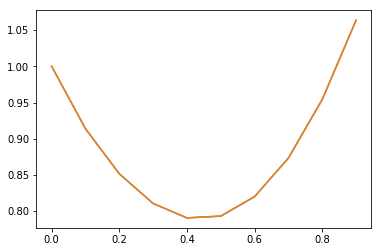

0.0012115405
0.0012114542
0.0012113678
0.0012112813
0.0012111949
0.0012111086
0.0012110223
0.0012109359
0.0012108495
0.0012107632
0.001210677
0.0012105906
0.0012105043
0.0012104181
0.0012103318
0.0012102455
0.0012101594
0.0012100731
0.001209987
0.0012099007
0.0012098146
0.0012097284
0.0012096423
0.0012095561
0.00120947
0.0012093838
0.0012092977
0.0012092117
0.0012091255
0.0012090395
0.0012089534
0.0012088673
0.0012087813
0.0012086952
0.0012086093
0.0012085233
0.0012084373
0.0012083513
0.0012082653
0.0012081794
0.0012080935
0.0012080076
0.0012079217
0.0012078357
0.0012077498
0.0012076639
0.0012075781
0.0012074922
0.0012074064
0.0012073206
0.0012072348
0.001207149
0.0012070632
0.0012069774
0.0012068916
0.0012068058
0.0012067201
0.0012066343
0.0012065487
0.001206463
0.0012063773
0.0012062916
0.0012062059
0.0012061202
0.0012060346
0.001205949
0.0012058633
0.0012057777
0.0012056922
0.0012056066
0.001205521
0.0012054355
0.0012053499
0.0012052644
0.0012051788
0.0012050933
0.0012050078
0.00120

0.001161018
0.0011609477
0.0011608697
0.0011607943
0.0011607237
0.0011606497
0.0011605711
0.0011604954
0.0011604223
0.001160346
0.0011602675
0.0011601915
0.0011601165
0.0011600391
0.0011599608
0.0011598844
0.001159808
0.00115973
0.0011596518
0.001159575
0.0011594978
0.0011594195
0.0011593414
0.0011592641
0.0011591865
0.0011591081
0.0011590301
0.0011589525
0.0011588745
0.0011587961
0.001158718
0.0011586403
0.0011585623
0.0011584839
0.0011584058
0.0011583279
0.0011582498
0.0011581716
0.0011580935
0.0011580153
0.0011579372
0.001157859
0.0011577809
0.0011577029
0.0011576248
0.0011575465
0.0011574684
0.0011573903
0.0011573122
0.0011572341
0.001157156
0.001157078
0.0011569998
0.0011569217
0.0011568437
0.0011567656
0.0011566875
0.0011566095
0.0011565315
0.0011564534
0.0011563754
0.0011562974
0.0011562194
0.0011561414
0.0011560634
0.0011559855
0.0011559075
0.0011558296
0.0011557516
0.0011556738
0.0011555959
0.0011555179
0.00115544
0.0011553621
0.0011552842
0.0011552065
0.0011551286
0.001155050

0.0011118705
0.0011117987
0.0011117269
0.001111655
0.0011115832
0.0011115114
0.0011114395
0.0011113677
0.001111296
0.0011112242
0.0011111525
0.0011110806
0.0011110089
0.0011109372
0.0011108654
0.0011107937
0.001110722
0.0011106502
0.0011105787
0.001110507
0.0011104352
0.0011103635
0.0011102919
0.0011102203
0.0011101486
0.001110077
0.0011100054
0.0011099338
0.0011098621
0.0011097905
0.001109719
0.0011096474
0.0011095759
0.0011095043
0.0011094325
0.001109361
0.0011092894
0.0011092176
0.001109146
0.0011090745
0.0011090029
0.0011089313
0.0011088598
0.0011087882
0.0011087166
0.0011086451
0.0011085735
0.001108502
0.0011084306
0.001108359
0.0011082875
0.001108216
0.0011081445
0.001108073
0.0011080016
0.0011079302
0.0011078587
0.0011077872
0.0011077159
0.0011076444
0.001107573
0.0011075017
0.0011074303
0.001107359
0.0011072875
0.0011072162
0.0011071449
0.0011070735
0.0011070021
0.0011069308
0.0011068595
0.0011067882
0.0011067169
0.0011066457
0.0011065743
0.0011065031
0.0011064318
0.0011063606


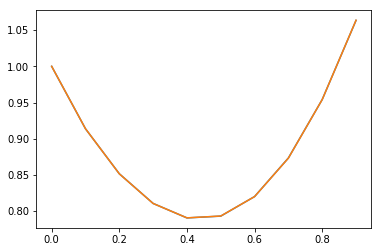

0.0010764835
0.0010764165
0.0010763493
0.0010762822
0.0010762152
0.0010761481
0.0010760812
0.0010760141
0.0010759471
0.00107588
0.0010758131
0.001075746
0.0010756791
0.001075612
0.0010755451
0.0010754782
0.0010754112
0.0010753443
0.0010752772
0.0010752102
0.0010751432
0.0010750762
0.0010750091
0.0010749422
0.0010748752
0.0010748082
0.0010747412
0.0010746743
0.0010746074
0.0010745404
0.0010744735
0.0010744066
0.0010743396
0.0010742727
0.0010742059
0.0010741389
0.0010740721
0.0010740052
0.0010739383
0.0010738714
0.0010738046
0.0010737377
0.001073671
0.0010736042
0.0010735375
0.0010734708
0.0010734042
0.0010733379
0.0010732717
0.0010732062
0.0010731423
0.0010730812
0.0010730264
0.0010729849
0.0010729708
0.0010730118
0.0010731568
0.0010734671
0.0010739603
0.0010744757
0.0010747338
0.0010747017
0.0010747068
0.0010749239
0.001075131
0.0010751275
0.0010750857
0.0010751897
0.001075299
0.0010752662
0.0010752254
0.0010752802
0.0010753012
0.0010752397
0.0010752178
0.0010752397
0.0010752061
0.0010

0.0010430322
0.0010429698
0.0010429075
0.0010428451
0.0010427827
0.0010427203
0.001042658
0.0010425956
0.0010425333
0.0010424709
0.0010424086
0.0010423464
0.0010422841
0.0010422218
0.0010421594
0.0010420971
0.001042035
0.0010419727
0.0010419104
0.0010418481
0.0010417858
0.0010417236
0.0010416614
0.0010415992
0.0010415369
0.0010414748
0.0010414126
0.0010413503
0.0010412881
0.001041226
0.0010411638
0.0010411016
0.0010410395
0.0010409773
0.0010409151
0.0010408531
0.0010407909
0.0010407288
0.0010406667
0.0010406045
0.0010405425
0.0010404804
0.0010404183
0.0010403562
0.0010402942
0.0010402321
0.0010401701
0.001040108
0.001040046
0.0010399839
0.0010399219
0.00103986
0.0010397979
0.001039736
0.0010396739
0.001039612
0.0010395499
0.001039488
0.0010394261
0.001039364
0.0010393021
0.0010392402
0.0010391782
0.0010391163
0.0010390544
0.0010389925
0.0010389306
0.0010388687
0.0010388067
0.0010387449
0.001038683
0.0010386212
0.0010385594
0.0010384974
0.0010384356
0.0010383738
0.001038312
0.0010382502

0.0009986148
0.0009985578
0.0009985007
0.0009984437
0.0009983866
0.0009983296
0.0009982726
0.0009982156
0.0009981586
0.0009981015
0.0009980447
0.0009979879
0.0009979312
0.0009978751
0.0009978198
0.0009977665
0.000997717
0.0009976753
0.00099765
0.0009976571
0.0009977274
0.0009979064
0.000998239
0.0009986819
0.0009990506
0.0009991508
0.000999098
0.0009991621
0.0009993647
0.0009994854
0.0009994485
0.0009994373
0.0009995383
0.000999603
0.0009995588
0.0009995371
0.0009995839
0.000999587
0.0009995323
0.000999515
0.0009995287
0.0009994985
0.0009994435
0.0009994224
0.0009994109
0.0009993649
0.0009993118
0.0009992835
0.0009992528
0.000999199
0.0009991487
0.0009991138
0.0009990712
0.0009990152
0.0009989655
0.0009989238
0.000998874
0.0009988174
0.0009987672
0.0009987201
0.000998666
0.00099861
0.0009985592
0.000998508
0.0009984521
0.0009983967
0.0009983446
0.0009982908
0.0009982344
0.0009981793
0.0009981258
0.0009980705
0.000998014
0.0009979589
0.0009979043
0.0009978482
0.0009977919
0.0009977365
0

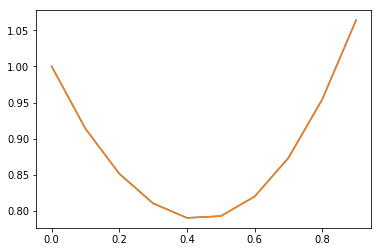

0.00097495917
0.0009749053
0.0009748516
0.0009747979
0.0009747441
0.00097469025
0.00097463647
0.0009745827
0.0009745289
0.0009744752
0.0009744214
0.0009743676
0.00097431376
0.00097426
0.0009742062
0.00097415247
0.0009740987
0.00097404484
0.00097399106
0.0009739373
0.0009738835
0.0009738297
0.0009737759
0.00097372214
0.00097366836
0.00097361463
0.00097356085
0.0009735071
0.00097345334
0.0009733996
0.0009733459
0.00097329216
0.00097323844
0.0009731847
0.00097313104
0.0009730773
0.00097302365
0.0009729699
0.00097291626
0.0009728626
0.0009728089
0.00097275525
0.0009727016
0.0009726479
0.0009725943
0.00097254064
0.00097248703
0.00097243336
0.00097237976
0.00097232615
0.00097227254
0.0009722189
0.0009721653
0.0009721117
0.00097205816
0.00097200455
0.000971951
0.0009718974
0.00097184384
0.0009717903
0.00097173674
0.0009716832
0.00097162963
0.0009715761
0.0009715226
0.00097146904
0.00097141555
0.00097136205
0.0009713085
0.000971255
0.0009712015
0.000971148
0.0009710946
0.0009710411
0.000970987

0.0009425105
0.0009424602
0.00094240997
0.0009423597
0.00094230945
0.00094225915
0.0009422089
0.0009421587
0.00094210845
0.0009420582
0.000942008
0.00094195775
0.0009419075
0.0009418573
0.0009418071
0.0009417569
0.0009417067
0.0009416565
0.0009416063
0.0009415561
0.00094150595
0.0009414558
0.0009414056
0.0009413555
0.0009413053
0.00094125513
0.000941205
0.0009411549
0.0009411047
0.0009410546
0.0009410045
0.00094095437
0.00094090425
0.00094085414
0.000940804
0.00094075396
0.00094070385
0.0009406538
0.00094060367
0.0009405536
0.00094050355
0.0009404535
0.00094040344
0.0009403534
0.0009403033
0.00094025326
0.00094020326
0.0009401532
0.0009401032
0.00094005314
0.00094000314
0.00093995314
0.00093990314
0.00093985314
0.00093980314
0.00093975314
0.00093970314
0.0009396532
0.0009396032
0.00093955325
0.00093950325
0.0009394533
0.00093940337
0.0009393534
0.0009393035
0.00093925354
0.0009392036
0.0009391537
0.0009391038
0.00093905383
0.00093900395
0.00093895406
0.0009389041
0.00093885424
0.000938

0.0009124715
0.0009124247
0.00091237784
0.00091233104
0.00091228425
0.00091223745
0.00091219065
0.00091214385
0.00091209705
0.00091205025
0.0009120035
0.0009119567
0.00091190997
0.0009118632
0.00091181643
0.0009117697
0.00091172295
0.0009116762
0.00091162947
0.0009115827
0.000911536
0.00091148925
0.0009114425
0.0009113958
0.0009113491
0.0009113024
0.0009112557
0.000911209
0.0009111623
0.0009111156
0.0009110689
0.00091102225
0.00091097556
0.00091092894
0.00091088226
0.0009108356
0.00091078895
0.0009107423
0.00091069564
0.000910649
0.0009106024
0.00091055577
0.00091050914
0.0009104625
0.0009104159
0.0009103693
0.00091032265
0.0009102761
0.00091022946
0.0009101829
0.0009101363
0.0009100897
0.00091004313
0.00090999657
0.00090995
0.00090990344
0.00090985687
0.0009098103
0.0009097638
0.00090971723
0.0009096707
0.00090962416
0.00090957765
0.00090953114
0.0009094846
0.00090943807
0.00090939156
0.00090934505
0.00090929854
0.0009092521
0.0009092056
0.0009091591
0.0009091126
0.0009090661
0.000909

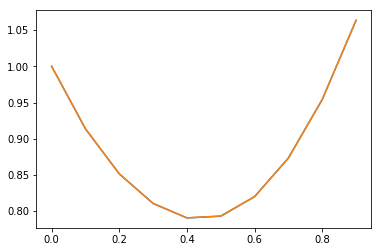

0.0008887901
0.0008887458
0.0008887015
0.00088865723
0.000888613
0.0008885687
0.00088852446
0.0008884802
0.000888436
0.0008883917
0.00088834745
0.0008883032
0.000888259
0.0008882148
0.00088817056
0.0008881263
0.0008880821
0.0008880379
0.00088799366
0.0008879495
0.0008879053
0.00088786107
0.0008878169
0.0008877727
0.0008877285
0.00088768435
0.00088764017
0.000887596
0.00088755187
0.0008875077
0.00088746357
0.0008874194
0.00088737527
0.0008873311
0.00088728697
0.00088724284
0.0008871987
0.0008871546
0.0008871105
0.00088706636
0.00088702224
0.00088697823
0.00088693417
0.0008868902
0.00088684645
0.00088680297
0.0008867601
0.00088671857
0.0008866794
0.0008866452
0.0008866208
0.0008866157
0.00088664703
0.0008867434
0.0008869372
0.00088723656
0.0008875543
0.0008877379
0.0008877374
0.0008877102
0.0008877994
0.00088794576
0.00088799983
0.00088796084
0.0008879623
0.000888034
0.00088806933
0.0008880332
0.0008880139
0.0008880428
0.00088804914
0.0008880087
0.0008879808
0.00088798546
0.0008879749
0.

0.00086463115
0.0008645895
0.00086454797
0.0008645064
0.00086446485
0.0008644233
0.0008643817
0.00086434017
0.0008642986
0.00086425705
0.00086421554
0.000864174
0.0008641324
0.0008640909
0.00086404936
0.00086400786
0.00086396636
0.00086392486
0.0008638833
0.0008638418
0.0008638003
0.0008637588
0.00086371735
0.00086367584
0.00086363434
0.00086359284
0.0008635514
0.0008635099
0.00086346845
0.00086342695
0.0008633855
0.00086334406
0.0008633025
0.000863261
0.0008632195
0.000863178
0.00086313643
0.00086309493
0.0008630534
0.0008630119
0.0008629704
0.000862929
0.0008628875
0.000862846
0.0008628045
0.00086276303
0.0008627215
0.0008626801
0.00086263864
0.00086259714
0.0008625557
0.00086251425
0.0008624728
0.00086243136
0.0008623899
0.0008623485
0.00086230703
0.00086226565
0.0008622242
0.00086218276
0.0008621414
0.0008620999
0.00086205854
0.00086201716
0.0008619758
0.0008619343
0.00086189294
0.00086185156
0.0008618102
0.0008617688
0.00086172746
0.0008616861
0.0008616447
0.0008616033
0.000861562

0.0008429143
0.0008428779
0.00084284006
0.00084280915
0.00084277755
0.0008427394
0.0008427019
0.0008426688
0.0008426341
0.00084259536
0.00084255775
0.00084252283
0.0008424863
0.0008424472
0.00084240944
0.0008423732
0.00084233546
0.00084229634
0.0008422583
0.0008422211
0.00084218284
0.0008421438
0.00084210536
0.00084206753
0.000842029
0.0008419899
0.0008419513
0.00084191305
0.0008418743
0.00084183516
0.0008417964
0.0008417578
0.0008417189
0.0008416798
0.000841641
0.0008416022
0.00084156333
0.0008415243
0.0008414853
0.0008414464
0.00084140745
0.0008413684
0.0008413294
0.0008412905
0.0008412515
0.00084121246
0.00084117346
0.00084113446
0.0008410955
0.0008410565
0.00084101746
0.00084097846
0.00084093946
0.00084090047
0.00084086147
0.00084082247
0.00084078347
0.00084074447
0.0008407054
0.0008406664
0.0008406274
0.0008405884
0.0008405494
0.00084051036
0.00084047136
0.0008404324
0.00084039336
0.00084035436
0.0008403153
0.0008402763
0.0008402373
0.00084019825
0.00084015925
0.00084012025
0.0008

0.0008211112
0.000821074
0.00082103687
0.00082099973
0.0008209626
0.0008209255
0.0008208884
0.00082085124
0.0008208141
0.00082077703
0.0008207399
0.00082070276
0.0008206657
0.00082062854
0.00082059146
0.0008205544
0.00082051725
0.00082048017
0.0008204431


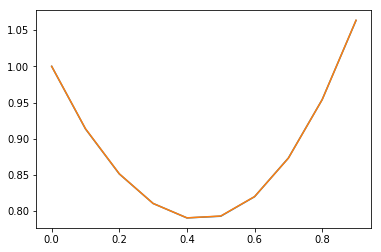

0.000820406
0.00082036894
0.00082033186
0.0008202948
0.0008202577
0.0008202207
0.0008201836
0.0008201465
0.00082010945
0.0008200724
0.00082003535
0.0008199983
0.0008199613
0.00081992423
0.0008198872
0.0008198502
0.00081981317
0.00081977615
0.00081973907
0.00081970205
0.0008196651
0.00081962807
0.00081959105
0.000819554
0.000819517
0.00081948005
0.000819443
0.00081940606
0.00081936904
0.0008193321
0.00081929506
0.0008192581
0.00081922114
0.0008191842
0.0008191472
0.00081911025
0.0008190733
0.00081903633
0.00081899937
0.0008189624
0.00081892544
0.0008188885
0.0008188516
0.0008188146
0.0008187777
0.00081874075
0.00081870385
0.0008186669
0.00081863
0.0008185931
0.0008185562
0.0008185192
0.0008184823
0.0008184454
0.0008184085
0.0008183716
0.00081833475
0.00081829785
0.00081826095
0.00081822404
0.0008181872
0.0008181503
0.00081811345
0.00081807654
0.0008180397
0.00081800285
0.00081796595
0.0008179291
0.00081789226
0.0008178554
0.00081781857
0.0008177817
0.0008177449
0.00081770803
0.000817671

0.00079962215
0.0007995872
0.00079955213
0.00079951715
0.0007994821
0.0007994471
0.00079941214
0.0007993771
0.0007993421
0.00079930713
0.00079927215
0.00079923717
0.0007992022
0.0007991672
0.0007991322
0.00079909724
0.00079906225
0.0007990273
0.00079899235
0.00079895736
0.0007989224
0.00079888746
0.0007988525
0.00079881755
0.0007987826
0.00079874764
0.0007987127
0.0007986778
0.00079864287
0.0007986079
0.00079857296
0.00079853804
0.0007985031
0.00079846825
0.0007984333
0.0007983984
0.0007983635
0.00079832855
0.0007982937
0.00079825876
0.0007982239
0.00079818896
0.0007981541
0.0007981192
0.0007980843
0.00079804944
0.0007980146
0.00079797965
0.0007979448
0.0007979099
0.00079787505
0.0007978402
0.0007978053
0.00079777045
0.00079773564
0.0007977008
0.0007976659
0.0007976311
0.00079759624
0.00079756137
0.00079752656
0.0007974917
0.0007974569
0.0007974221
0.0007973872
0.0007973524
0.0007973176
0.0007972828
0.000797248
0.0007972132
0.00079717836
0.00079714356
0.00079710875
0.00079707394
0.0007

0.0007801906
0.0007801577
0.0007801251
0.0007800936
0.0007800618
0.000780029
0.0007799961
0.000779964
0.00077993184
0.0007798991
0.0007798661
0.0007798335
0.0007798011
0.0007797684
0.00077973533
0.0007797025
0.0007796699
0.0007796372
0.0007796042
0.00077957124
0.0007795385
0.00077950564
0.0007794727
0.0007794397
0.0007794068
0.000779374
0.00077934103
0.000779308
0.000779275
0.00077924214
0.0007792092
0.0007791762
0.0007791432
0.0007791103
0.00077907735
0.00077904435
0.00077901135
0.0007789784
0.0007789454
0.0007789124
0.00077887945
0.00077884644
0.0007788135
0.0007787805
0.00077874755
0.00077871454
0.0007786816
0.00077864865
0.0007786157
0.00077858276
0.00077854976
0.0007785168
0.00077848387
0.0007784509
0.00077841803
0.0007783851
0.00077835214
0.0007783192
0.00077828625
0.00077825336
0.0007782204
0.00077818753
0.0007781546
0.0007781217
0.00077808875
0.00077805587
0.0007780229
0.00077799003
0.00077795715
0.00077792426
0.0007778914
0.0007778585
0.00077782554
0.0007777927
0.0007777598
0.

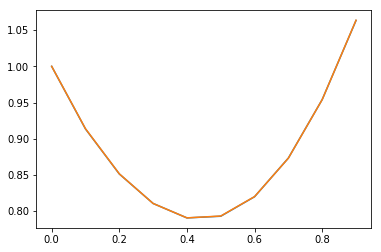

0.00076260715
0.00076257554
0.000762544
0.0007625124
0.00076248083
0.0007624493
0.0007624177
0.00076238613
0.0007623546
0.000762323
0.0007622914
0.0007622599
0.00076222833
0.0007621968
0.00076216523
0.0007621337
0.00076210214
0.0007620706
0.0007620391
0.00076200755
0.000761976
0.00076194445
0.00076191296
0.0007618814
0.0007618499
0.0007618184
0.0007617869
0.00076175533
0.00076172384
0.00076169235
0.0007616608
0.0007616293
0.0007615978
0.00076156633
0.00076153484
0.00076150335
0.00076147186
0.0007614404
0.0007614089
0.0007613774
0.0007613459
0.0007613144
0.000761283
0.0007612515
0.00076122
0.00076118857
0.0007611571
0.00076112564
0.00076109415
0.0007610627
0.0007610313
0.0007609998
0.00076096837
0.00076093693
0.0007609055
0.000760874
0.0007608426
0.00076081115
0.0007607797
0.0007607483
0.00076071685
0.0007606855
0.00076065405
0.0007606226
0.0007605912
0.00076055975
0.0007605284
0.00076049694
0.00076046557
0.00076043414
0.00076040276
0.00076037133
0.00076033996
0.0007603086
0.00076027715

0.0007433579
0.00074332807
0.0007432982
0.0007432684
0.00074323855
0.00074320874
0.00074317894
0.0007431491
0.0007431193
0.0007430895
0.0007430597
0.0007430299
0.00074300007
0.00074297027
0.00074294046
0.00074291066
0.00074288086
0.00074285106
0.00074282126
0.00074279145
0.0007427617
0.0007427319
0.0007427021
0.00074267236
0.00074264256
0.0007426128
0.000742583
0.00074255327
0.00074252347
0.0007424937
0.0007424639
0.0007424342
0.00074240443
0.0007423747
0.00074234494
0.00074231514
0.0007422854
0.00074225565
0.0007422259
0.00074219616
0.0007421664
0.00074213673
0.000742107
0.00074207725
0.0007420475
0.0007420178
0.0007419881
0.0007419583
0.00074192864
0.0007418989
0.0007418692
0.00074183947
0.0007418098
0.00074178004
0.00074175035
0.00074172067
0.0007416909
0.00074166124
0.00074163155
0.00074160186
0.0007415722
0.0007415425
0.0007415128
0.0007414831
0.00074145343
0.00074142375
0.00074139406
0.0007413644
0.00074133475
0.00074130506
0.0007412754
0.00074124575
0.00074121606
0.0007411864
0.

0.0007287456
0.00072873355
0.00072871166
0.00072868355
0.0007286623
0.00072864426
0.0007286194
0.00072859146
0.0007285684
0.00072854664
0.00072852
0.00072849216
0.0007284679
0.0007284437
0.0007284162
0.0007283884
0.0007283628
0.0007283371
0.0007283092
0.0007282813
0.0007282549
0.00072822825
0.00072820013
0.0007281721
0.00072814507
0.0007281178
0.00072808965
0.0007280615
0.000728034
0.0007280064
0.0007279782
0.00072795
0.00072792225
0.00072789437
0.00072786614
0.0007278379
0.00072780985
0.00072778185
0.0007277536
0.00072772533
0.00072769716
0.00072766904
0.0007276408
0.0007276125
0.00072758435
0.0007275562
0.0007275279
0.00072749954
0.0007274713
0.0007274431
0.00072741485
0.0007273865
0.0007273582
0.00072733
0.00072730175
0.0007272734
0.0007272451
0.0007272169
0.0007271886
0.0007271603
0.00072713196
0.00072710373
0.00072707544
0.00072704715
0.00072701887
0.0007269905
0.0007269623
0.000726934
0.0007269057
0.00072687736
0.0007268491
0.0007268208
0.0007267925
0.0007267642
0.0007267359
0.00

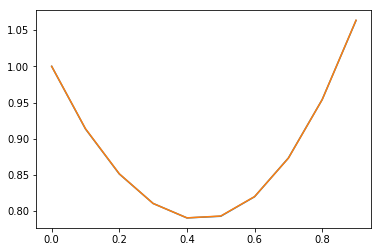

0.00071428297
0.00071425573
0.0007142285
0.0007142013
0.00071417406
0.0007141468
0.0007141196
0.0007140924
0.00071406516
0.0007140379
0.00071401073
0.0007139835
0.0007139563
0.00071392907
0.0007139019
0.00071387464
0.00071384746
0.0007138203
0.00071379304
0.00071376585
0.0007137387
0.0007137115
0.0007136843
0.0007136571
0.0007136299
0.0007136027
0.0007135755
0.00071354833
0.00071352115
0.000713494
0.00071346684
0.00071343966
0.0007134125
0.0007133853
0.00071335817
0.000713331
0.0007133038
0.0007132767
0.0007132495
0.00071322237
0.0007131952
0.00071316806
0.0007131409
0.00071311375
0.00071308657
0.00071305945
0.0007130323
0.0007130052
0.000712978
0.0007129509
0.00071292376
0.00071289664
0.0007128695
0.0007128424
0.00071281526
0.00071278814
0.000712761
0.0007127339
0.00071270677
0.00071267964
0.0007126526
0.00071262545
0.0007125983
0.0007125712
0.00071254413
0.000712517
0.00071248994
0.0007124628
0.00071243575
0.0007124086
0.00071238156
0.00071235443
0.00071232737
0.0007123003
0.00071227

0.00070004375
0.0007000317
0.00070001575
0.0006999907
0.0006999678
0.00069995085
0.0006999312
0.00069990574
0.0006998821
0.00069986226
0.00069984014
0.0006998144
0.00069979025
0.0006997684
0.0006997449
0.00069971906
0.0006996943
0.00069967116
0.0006996468
0.0006996209
0.0006995958
0.0006995717
0.0006995469
0.000699521
0.00069949555
0.0006994708
0.00069944566
0.0006994198
0.0006993942
0.000699369
0.0006993436
0.0006993178
0.000699292
0.00069926656
0.00069924106
0.0006992152
0.00069918943
0.0006991638
0.0006991382
0.00069911237
0.00069908646
0.0006990608
0.00069903507
0.0006990092
0.0006989834
0.00069895753
0.0006989318
0.00069890596
0.0006988801
0.0006988543
0.00069882843
0.00069880264
0.0006987768
0.0006987509
0.00069872505
0.0006986992
0.00069867336
0.0006986475
0.0006986217
0.00069859583
0.00069857
0.0006985441
0.00069851824
0.0006984924
0.00069846655
0.00069844065
0.00069841475
0.00069838896
0.0006983631
0.0006983372
0.0006983113
0.00069828547
0.0006982596
0.0006982338
0.0006982079


0.0006846541
0.00068462925
0.00068460446
0.00068457966
0.00068455486
0.00068453007
0.00068450527
0.0006844805
0.0006844557
0.0006844309
0.0006844061
0.0006843813
0.00068435655
0.00068433175
0.00068430696
0.00068428216
0.00068425736
0.0006842326
0.00068420783
0.0006841831
0.0006841583
0.00068413344
0.00068410864
0.0006840838
0.000684059
0.0006840342
0.00068400934
0.00068398454
0.00068395975
0.0006839349
0.0006839101
0.0006838853
0.0006838605
0.0006838357
0.00068381085
0.00068378606
0.00068376126
0.00068373646
0.00068371167
0.00068368687
0.0006836621
0.00068363734
0.00068361254
0.00068358774
0.00068356295
0.00068353815
0.0006835134
0.0006834886
0.0006834638
0.0006834391
0.0006834143
0.0006833895
0.00068336475
0.00068333995
0.0006833152
0.0006832904
0.0006832657
0.0006832409
0.00068321615
0.0006831914
0.0006831666
0.0006831419
0.00068311713
0.0006830924
0.00068306766
0.00068304286
0.0006830181
0.0006829934
0.00068296865
0.0006829439
0.0006829192
0.00068289455
0.00068286987
0.0006828452
0.

0.00067213824


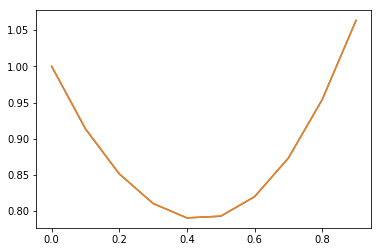

0.00067211443
0.0006720906
0.0006720669
0.00067204307
0.0006720193
0.0006719955
0.00067197176
0.00067194796
0.0006719242
0.0006719004
0.00067187665
0.0006718529
0.00067182916
0.00067180535
0.0006717816
0.00067175785
0.0006717341
0.0006717103
0.00067168655
0.0006716628
0.00067163905
0.0006716153
0.00067159155
0.0006715678
0.00067154405
0.0006715203
0.00067149656
0.00067147287
0.0006714491
0.00067142537
0.0006714016
0.00067137793
0.0006713542
0.00067133043
0.0006713067
0.000671283
0.00067125924
0.00067123555
0.0006712118
0.0006711881
0.00067116437
0.0006711407
0.0006711169
0.00067109324
0.00067106955
0.0006710458
0.0006710221
0.0006709984
0.00067097467
0.000670951
0.0006709273
0.0006709036
0.0006708799
0.0006708562
0.0006708325
0.0006708088
0.0006707851
0.0006707614
0.00067073776
0.0006707141
0.0006706904
0.0006706667
0.000670643
0.0006706193
0.0006705956
0.000670572
0.0006705483
0.0006705246
0.000670501
0.0006704773
0.0006704536
0.00067042996
0.00067040627
0.00067038264
0.00067035895
0.

0.0006600155
0.00065999274
0.00065997
0.0006599472
0.00065992447
0.0006599017
0.00065987895
0.0006598562
0.00065983343
0.00065981067
0.0006597879
0.0006597652
0.00065974245
0.0006597197
0.00065969693
0.00065967423
0.0006596515
0.0006596287
0.000659606
0.00065958325
0.00065956055
0.00065953773
0.00065951503
0.0006594923
0.0006594696
0.0006594468
0.000659424
0.00065940124
0.0006593785
0.00065935566
0.0006593329
0.00065931014
0.0006592874
0.0006592646
0.00065924186
0.0006592191
0.00065919635
0.0006591736
0.0006591508
0.00065912807
0.0006591053
0.00065908255
0.0006590598
0.00065903703
0.00065901433
0.0006589916
0.0006589688
0.00065894605
0.00065892335
0.0006589006
0.00065887783
0.00065885513
0.0006588324
0.0006588096
0.0006587869
0.00065876415
0.00065874145
0.00065871875
0.000658696
0.0006586733
0.00065865053
0.00065862783
0.00065860513
0.0006585824
0.0006585597
0.00065853697
0.00065851427
0.0006584915
0.0006584688
0.0006584461
0.0006584234
0.0006584007
0.000658378
0.0006583553
0.000658332

0.00064697996
0.00064695807
0.00064693624
0.00064691436
0.0006468925
0.00064687064
0.0006468488
0.0006468269
0.0006468051
0.0006467832
0.0006467614
0.00064673956
0.0006467177
0.0006466959
0.0006466742
0.0006466526
0.00064663135
0.0006466106
0.0006465909
0.00064657314
0.0006465591
0.00064655236
0.0006465592
0.00064659026
0.00064666214
0.0006467884
0.0006469654
0.0006471343
0.0006472214
0.00064721686
0.00064720603
0.0006472565
0.00064733776
0.0006473753
0.00064735895
0.0006473528
0.0006473874
0.0006474183
0.00064740976
0.00064739137
0.0006473993
0.00064741605
0.0006474087
0.0006473873
0.00064737984
0.0006473836
0.00064737577
0.0006473546
0.00064733904
0.00064733316
0.00064732204
0.00064730126
0.0006472824
0.0006472705
0.00064725673
0.0006472362
0.0006472157
0.00064720004
0.0006471839
0.00064716325
0.0006471422
0.00064712414
0.0006471063
0.0006470856
0.00064706407
0.00064704457
0.0006470255
0.0006470046
0.0006469829
0.00064696243
0.0006469425
0.00064692163
0.0006468999
0.0006468788
0.0006

0.0006354511
0.0006354301
0.00063540915
0.00063538813
0.0006353672
0.00063534616
0.0006353252
0.00063530426
0.00063528324
0.0006352623
0.00063524133
0.0006352203


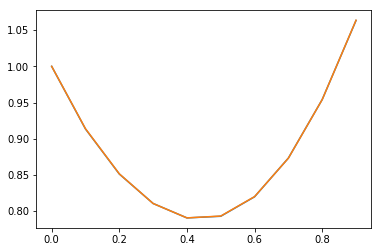

0.00063519937
0.0006351784
0.00063515746
0.00063513644
0.0006351155
0.00063509453
0.0006350736
0.0006350526
0.00063503167
0.0006350107
0.00063498976
0.0006349688
0.00063494785
0.0006349269
0.00063490594
0.000634885
0.00063486403
0.0006348431
0.0006348221
0.0006348012
0.00063478027
0.0006347593
0.00063473836
0.00063471746
0.0006346965
0.00063467555
0.00063465466
0.0006346337
0.0006346128
0.00063459185
0.0006345709
0.00063455
0.00063452905
0.00063450815
0.0006344872
0.0006344663
0.0006344454
0.00063442445
0.00063440355
0.00063438265
0.0006343617
0.0006343408
0.0006343199
0.000634299
0.00063427805
0.00063425716
0.00063423626
0.00063421536
0.00063419447
0.0006341736
0.0006341527
0.0006341318
0.0006341109
0.00063409
0.0006340691
0.0006340482
0.0006340273
0.0006340064
0.0006339855
0.0006339646
0.0006339437
0.0006339229
0.000633902
0.0006338811
0.0006338602
0.00063383934
0.00063381845
0.00063379755
0.0006337767
0.0006337558
0.0006337349
0.00063371414
0.00063369336
0.0006336727
0.0006336522
0.

0.0006249344
0.0006249142
0.00062489405
0.00062487385
0.00062485365
0.00062483345
0.00062481326
0.00062479306
0.00062477286
0.0006247527
0.0006247325
0.0006247123
0.0006246921
0.000624672
0.0006246518
0.0006246316
0.00062461145
0.00062459125
0.0006245711
0.0006245509
0.0006245307
0.0006245106
0.0006244904
0.00062447024
0.00062445004
0.0006244299
0.00062440976
0.00062438956
0.0006243694
0.0006243493
0.0006243291
0.00062430894
0.0006242888
0.0006242686
0.00062424847
0.0006242283
0.0006242082
0.00062418805
0.0006241679
0.0006241477
0.00062412757
0.00062410743
0.0006240873
0.00062406715
0.000624047
0.00062402687
0.00062400673
0.0006239866
0.0006239665
0.00062394637
0.00062392623
0.0006239061
0.00062388595
0.0006238658
0.0006238457
0.0006238256
0.00062380545
0.0006237853
0.0006237652
0.0006237451
0.00062372495
0.00062370487
0.0006236847
0.00062366464
0.0006236445
0.0006236244
0.0006236043
0.0006235842
0.00062356406
0.000623544
0.00062352384
0.00062350376
0.0006234837
0.00062346354
0.0006234

0.00061459607
0.0006145766
0.00061455724
0.00061453786
0.0006145185
0.0006144991
0.0006144797
0.0006144603
0.00061444094
0.00061442156
0.0006144022
0.0006143828
0.0006143634
0.000614344
0.0006143247
0.0006143053
0.00061428593
0.00061426655
0.00061424717
0.00061422784
0.00061420846
0.0006141891
0.0006141697
0.0006141503
0.00061413087
0.0006141115
0.0006140921
0.00061407266
0.0006140533
0.00061403384
0.00061401445
0.0006139951
0.00061397563
0.00061395625
0.00061393686
0.0006139174
0.00061389804
0.00061387866
0.0006138593
0.0006138399
0.0006138205
0.00061380106
0.0006137817
0.0006137623
0.0006137429
0.00061372353
0.00061370415
0.00061368477
0.0006136654
0.000613646
0.0006136266
0.00061360723
0.00061358785
0.0006135685
0.00061354914
0.00061352976
0.0006135104
0.000613491
0.00061347167
0.0006134523
0.0006134329
0.0006134135
0.0006133942
0.0006133748
0.0006133554
0.0006133361
0.0006133167
0.0006132974
0.000613278
0.0006132586
0.0006132393
0.0006132199
0.0006132006
0.00061318127
0.0006131619


0.0006045583
0.0006045403
0.00060452166
0.00060450356
0.0006044859
0.0006044679
0.00060444925
0.0006044308
0.00060441275
0.0006043946
0.000604376
0.0006043574
0.00060433906
0.00060432084
0.00060430233
0.0006042837
0.0006042652
0.0006042468
0.00060422835
0.00060420966
0.0006041911
0.0006041726
0.0006041541
0.0006041355
0.0006041168
0.00060409826
0.0006040797
0.0006040611
0.00060404243
0.0006040238
0.00060400524
0.0006039866
0.000603968


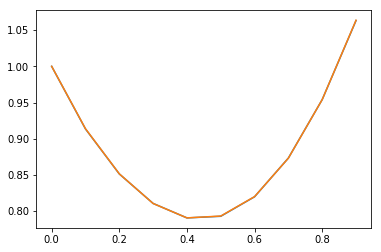

0.00060394936
0.00060393073
0.00060391217
0.00060389354
0.0006038749
0.0006038562
0.0006038376
0.000603819
0.00060380035
0.0006037817
0.00060376315
0.0006037445
0.0006037259
0.0006037073
0.00060368865
0.00060367
0.0006036514
0.00060363277
0.0006036142
0.0006035956
0.00060357695
0.0006035583
0.00060353975
0.0006035211
0.0006035025
0.00060348393
0.0006034653
0.00060344674
0.0006034281
0.0006034095
0.0006033909
0.0006033723
0.0006033537
0.0006033351
0.0006033165
0.0006032979
0.00060327933
0.00060326076
0.00060324214
0.00060322357
0.00060320494
0.0006031864
0.0006031678
0.0006031492
0.0006031306
0.00060311204
0.0006030935
0.0006030749
0.0006030563
0.0006030377
0.00060301914
0.0006030006
0.000602982
0.00060296344
0.00060294487
0.0006029263
0.00060290773
0.00060288917
0.0006028706
0.00060285203
0.00060283346
0.0006028149
0.0006027963
0.00060277776
0.0006027592
0.0006027406
0.00060272205
0.0006027034
0.0006026848
0.00060266623
0.0006026476
0.00060262904
0.0006026104
0.00060259184
0.0006025732

0.0005940624
0.0005940706
0.00059405365
0.0005940529
0.00059407146
0.0005940757
0.0005940591
0.0005940485
0.00059405295
0.00059405266
0.0005940374
0.00059402216
0.0005940173
0.0005940119
0.00059399655
0.0005939798
0.0005939699
0.00059396063
0.00059394503
0.00059392763
0.00059391453
0.0005939025
0.00059388636
0.0005938687
0.0005938538
0.00059383985
0.00059382326
0.00059380545
0.0005937894
0.00059377414
0.0005937573
0.00059373945
0.00059372257
0.00059370644
0.0005936894
0.0005936715
0.0005936542
0.0005936374
0.00059362024
0.00059360237
0.00059358473
0.0005935676
0.00059355027
0.0005935324
0.0005935146
0.0005934971
0.00059347966
0.00059346185
0.00059344404
0.00059342635
0.00059340877
0.000593391
0.00059337314
0.00059335533
0.00059333764
0.0005933198
0.00059330196
0.0005932841
0.00059326633
0.0005932486
0.0005932307
0.00059321284
0.00059319497
0.0005931772
0.00059315935
0.0005931415
0.0005931236
0.00059310574
0.0005930879
0.00059307006
0.0005930522
0.0005930343
0.0005930165
0.00059299864
0

0.0005837802
0.0005837629
0.00058374554
0.00058372825
0.0005837109
0.00058369356
0.0005836763
0.0005836589
0.00058364164
0.0005836243
0.000583607
0.0005835897
0.0005835724
0.0005835551
0.00058353774
0.00058352045
0.00058350316
0.0005834858
0.0005834685
0.00058345124
0.00058343395
0.0005834166
0.0005833993
0.00058338203
0.00058336474
0.0005833474
0.0005833301
0.0005833128
0.00058329554
0.00058327825
0.00058326096
0.0005832437
0.0005832264
0.0005832091
0.0005831918
0.0005831745
0.00058315723
0.00058313995
0.00058312266
0.0005831054
0.0005830881
0.0005830708
0.0005830535
0.0005830362
0.00058301893
0.0005830017
0.0005829844
0.0005829671
0.00058294984
0.00058293255
0.0005829153
0.00058289804
0.00058288075
0.0005828635
0.00058284623
0.00058282894
0.0005828117
0.00058279454
0.0005827774
0.0005827604
0.0005827435
0.0005827271
0.0005827114
0.0005826973
0.00058268616
0.00058268075
0.0005826861
0.0005827117
0.00058277074
0.0005828794
0.00058303354
0.0005831945
0.0005832846
0.00058328855
0.0005832

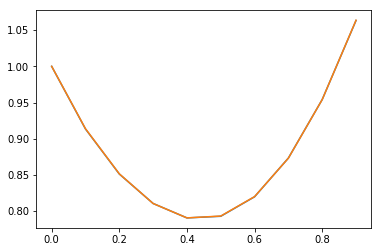

0.0005752873
0.00057527056
0.00057525386
0.0005752371
0.0005752204
0.0005752036
0.0005751869
0.00057517015
0.00057515345
0.0005751367
0.00057512
0.0005751032
0.0005750865
0.00057506975
0.00057505304
0.00057503633
0.00057501957
0.00057500286
0.00057498616
0.00057496945
0.0005749527
0.000574936
0.0005749193
0.0005749026
0.0005748858
0.0005748691
0.0005748524
0.0005748357
0.000574819
0.0005748023
0.0005747856
0.0005747688
0.0005747521
0.0005747354
0.0005747187
0.000574702
0.0005746853
0.0005746686
0.0005746519
0.00057463517
0.0005746185
0.0005746018
0.0005745851
0.0005745684
0.0005745517
0.000574535
0.0005745183
0.0005745016
0.00057448493
0.0005744682
0.0005744515
0.0005744348
0.00057441817
0.00057440146
0.00057438476
0.0005743681
0.0005743514
0.0005743347
0.00057431805
0.00057430135
0.0005742847
0.000574268
0.0005742513
0.00057423464
0.00057421793
0.0005742013
0.0005741846
0.00057416793
0.0005741512
0.0005741346
0.00057411793
0.0005741012
0.0005740846
0.0005740679
0.0005740512
0.00057403

0.0005659035
0.0005658874
0.00056587136
0.0005658553
0.00056583923
0.0005658231
0.00056580704
0.000565791
0.0005657749
0.00056575885
0.0005657428
0.0005657267
0.00056571065
0.0005656946
0.0005656785
0.00056566246
0.0005656464
0.0005656304
0.0005656143
0.00056559825
0.0005655822
0.00056556606
0.00056555
0.0005655339
0.0005655178
0.0005655017
0.0005654856
0.0005654695
0.00056545343
0.0005654373
0.00056542124
0.0005654051
0.00056538905
0.000565373
0.00056535687
0.0005653408
0.0005653247
0.0005653086
0.00056529255
0.0005652765
0.00056526036
0.0005652443
0.0005652282
0.0005652121
0.00056519604
0.00056518
0.0005651639
0.00056514784
0.0005651317
0.00056511565
0.0005650996
0.0005650835
0.00056506746
0.0005650514
0.0005650353
0.00056501926
0.0005650032
0.00056498713
0.00056497107
0.000564955
0.00056493893
0.00056492287
0.0005649068
0.00056489074
0.0005648747
0.0005648586
0.00056484254
0.0005648265
0.00056481047
0.0005647944
0.00056477834
0.0005647623
0.0005647462
0.0005647302
0.00056471414
0.00

0.00055603933
0.00055602385
0.0005560084
0.000555993
0.0005559776
0.0005559621
0.00055594667
0.00055593124
0.00055591576
0.0005559003
0.0005558848
0.0005558693
0.0005558539
0.0005558384
0.0005558229
0.00055580743
0.00055579195
0.00055577647
0.00055576104
0.00055574556
0.0005557301
0.0005557146
0.00055569917
0.0005556837
0.0005556682
0.0005556528
0.0005556373
0.0005556218
0.0005556064
0.0005555909
0.0005555755
0.00055556
0.0005555445
0.0005555291
0.0005555136
0.0005554982
0.0005554827
0.00055546727
0.0005554518
0.00055543636
0.00055542093
0.00055540545
0.00055539
0.00055537454
0.0005553591
0.0005553437
0.0005553282
0.0005553128
0.00055529736
0.0005552819
0.00055526645
0.000555251
0.00055523554
0.0005552201
0.0005552047
0.00055518927
0.00055517384
0.00055515836
0.00055514293
0.0005551275
0.0005551121
0.00055509666
0.00055508123
0.0005550658
0.0005550503
0.0005550349
0.0005550195
0.00055500405
0.0005549886
0.0005549732
0.0005549578
0.00055494235
0.0005549269
0.0005549115
0.0005548961
0.00

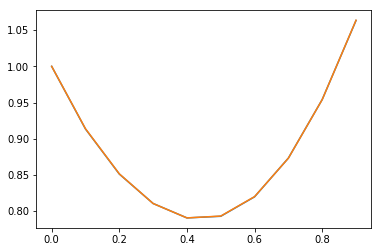

0.0005498679
0.0005498528
0.0005498377
0.0005498226
0.0005498075
0.0005497924
0.0005497773
0.0005497622
0.0005497471
0.000549732
0.00054971693
0.0005497018
0.0005496867
0.00054967165
0.0005496565
0.00054964144
0.00054962636
0.0005496113
0.00054959615
0.0005495811
0.000549566
0.0005495509
0.00054953585
0.0005495207
0.00054950564
0.00054949056
0.0005494755
0.0005494604
0.00054944534
0.00054943026
0.0005494152
0.0005494001
0.00054938503
0.00054936996
0.0005493549
0.0005493398
0.00054932473
0.00054930965
0.0005492946
0.0005492795
0.0005492644
0.00054924935
0.0005492343
0.0005492192
0.0005492041
0.00054918905
0.00054917403
0.00054915895
0.0005491439
0.0005491288
0.0005491137
0.0005490987
0.00054908363
0.00054906856
0.0005490535
0.00054903846
0.0005490234
0.0005490083
0.0005489933
0.0005489782
0.00054896314
0.0005489481
0.00054893305
0.00054891803
0.00054890296
0.00054888794
0.00054887286
0.0005488578
0.00054884277
0.0005488277
0.0005488127
0.0005487976
0.0005487826
0.00054876757
0.000548752

0.0005427801
0.0005427655
0.0005427509
0.00054273626
0.0005427217
0.0005427071
0.0005426925
0.0005426779
0.0005426633
0.0005426487
0.0005426341
0.00054261956
0.00054260495
0.0005425904
0.0005425758
0.0005425612
0.0005425466
0.000542532
0.00054251746
0.00054250285
0.0005424883
0.0005424737
0.00054245914
0.0005424445
0.00054243
0.00054241536
0.0005424008
0.00054238626
0.00054237165
0.0005423571
0.0005423425
0.00054232794
0.0005423134
0.0005422988
0.0005422842
0.00054226967
0.00054225506
0.0005422405
0.00054222596
0.0005422114
0.0005421968
0.00054218224
0.0005421677
0.00054215314
0.0005421386
0.000542124
0.0005421094
0.0005420949
0.0005420803
0.00054206577
0.0005420512
0.00054203667
0.0005420221
0.0005420075
0.00054199295
0.0005419784
0.00054196385
0.0005419493
0.00054193474
0.0005419202
0.00054190564
0.0005418911
0.0005418766
0.00054186204
0.0005418475
0.00054183294
0.0005418184
0.00054180383
0.0005417893
0.00054177473
0.00054176024
0.0005417457
0.00054173113
0.0005417166
0.00054170203
0

0.0005346192
0.00053460506
0.0005345909
0.0005345768
0.00053456257
0.0005345484
0.0005345343
0.00053452014
0.000534506
0.0005344918
0.00053447764
0.0005344635
0.00053444935
0.0005344352
0.0005344211
0.00053440704
0.00053439307
0.0005343792
0.00053436565
0.0005343526
0.0005343406
0.0005343307
0.00053432514
0.0005343277
0.0005343461
0.000534392
0.00053448236
0.0005346207
0.0005347825
0.0005348908
0.00053491094
0.00053489924
0.0005349335
0.00053500925
0.0005350556
0.0005350497
0.00053504645
0.0005350807
0.0005351146
0.0005351121
0.0005351018
0.00053511595
0.00053513335
0.00053512753
0.0005351149
0.0005351184
0.00053512567
0.0005351178
0.00053510454
0.00053510146
0.00053510134
0.00053509156
0.0005350781
0.00053507154
0.0005350666
0.000535055
0.00053504144
0.0005350325
0.0005350242
0.0005350116
0.00053499796
0.0005349874
0.00053497707
0.00053496374
0.0005349502
0.0005349386
0.0005349269
0.0005349132
0.00053489953
0.0005348872
0.0005348746
0.0005348608
0.000534847
0.0005348341
0.000534821
0.

0.00052812
0.0005281063
0.0005280926
0.0005280789
0.0005280652
0.00052805146
0.0005280378
0.00052802404
0.00052801037
0.0005279966
0.00052798295
0.00052796927
0.00052795553
0.00052794185
0.0005279282
0.00052791444
0.00052790076
0.0005278871
0.00052787334
0.00052785967
0.000527846
0.00052783225
0.00052781857
0.00052780483
0.0005277911
0.00052777736
0.0005277636
0.00052774994
0.0005277362
0.00052772247
0.00052770873
0.000527695
0.00052768126
0.0005276675
0.00052765384


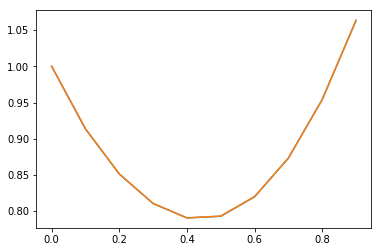

0.0005276401
0.00052762637
0.00052761263
0.00052759895
0.0005275852
0.0005275715
0.00052755774
0.00052754406
0.0005275303
0.0005275166
0.0005275029
0.0005274892
0.00052747544
0.00052746176
0.000527448
0.00052743434
0.0005274206
0.00052740687
0.0005273932
0.00052737945
0.0005273658
0.00052735204
0.00052733836
0.0005273246
0.00052731094
0.0005272972
0.0005272835
0.0005272698
0.0005272561
0.0005272424
0.0005272287
0.000527215
0.0005272013
0.0005271876
0.00052717386
0.0005271602
0.0005271465
0.00052713277
0.0005271191
0.0005271054
0.00052709173
0.000527078
0.0005270643
0.00052705064
0.00052703696
0.0005270232
0.00052700954
0.00052699586
0.0005269822
0.00052696845
0.00052695477
0.0005269411
0.0005269274
0.00052691373
0.00052690005
0.0005268864
0.0005268727
0.00052685896
0.0005268453
0.0005268316
0.0005268179
0.00052680424
0.00052679057
0.0005267769
0.0005267632
0.0005267495
0.00052673585
0.0005267222
0.0005267085
0.0005266948
0.0005266812
0.0005266675
0.00052665384
0.00052664016
0.000526626

0.00051946344
0.00051945023
0.00051943696
0.00051942375
0.00051941053
0.00051939726
0.00051938405
0.00051937083
0.00051935756
0.00051934435
0.00051933114
0.0005193179
0.00051930465
0.00051929144
0.0005192782
0.000519265
0.00051925174
0.0005192385
0.0005192253
0.0005192121
0.0005191989
0.0005191857
0.00051917246
0.0005191592
0.000519146
0.00051913277
0.00051911955
0.00051910634
0.0005190931
0.0005190799
0.0005190667
0.0005190535
0.0005190403
0.00051902706
0.00051901385
0.00051900063
0.0005189874
0.0005189742
0.000518961
0.0005189478
0.00051893457
0.00051892136
0.00051890814
0.0005188949
0.0005188817
0.00051886856
0.00051885535
0.00051884213
0.0005188289
0.0005188157
0.0005188025
0.00051878934
0.0005187761
0.0005187629
0.0005187497
0.00051873655
0.00051872333
0.0005187101
0.0005186969
0.00051868375
0.00051867054
0.0005186573
0.00051864417
0.00051863096
0.00051861774
0.0005186046
0.0005185914
0.00051857816
0.000518565
0.0005185518
0.00051853864
0.0005185254
0.0005185123
0.00051849906
0.00

0.00051297277
0.0005129599
0.00051294704
0.00051293423
0.00051292137
0.00051290856
0.0005128957
0.00051288283
0.00051287
0.00051285716
0.00051284436
0.0005128315
0.0005128187
0.0005128058
0.000512793
0.00051278016
0.00051276735
0.00051275454
0.0005127417
0.0005127289
0.000512716
0.0005127032
0.00051269034
0.00051267754
0.00051266473
0.00051265187
0.00051263906
0.00051262625
0.0005126134
0.0005126006
0.0005125878
0.0005125749
0.0005125621
0.0005125493
0.0005125365
0.00051252363
0.00051251083
0.000512498
0.0005124852
0.00051247235
0.00051245955
0.00051244674
0.00051243394
0.00051242113
0.0005124083
0.00051239546
0.00051238266
0.00051236985
0.00051235704
0.00051234424
0.00051233143
0.0005123186
0.0005123058
0.000512293
0.0005122802
0.0005122674
0.0005122546
0.0005122418
0.000512229
0.0005122162
0.0005122034
0.00051219057
0.00051217776
0.00051216496
0.00051215215
0.00051213935
0.00051212654
0.00051211374
0.00051210093
0.0005120882
0.0005120754
0.0005120626
0.00051204977
0.00051203696
0.000

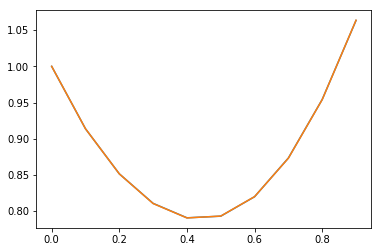

0.00050744606
0.0005074335
0.0005074209
0.00050740835
0.0005073958
0.0005073832
0.0005073706
0.00050735805
0.0005073455
0.0005073329
0.00050732034
0.00050730776
0.00050729525
0.0005072827
0.0005072701
0.00050725753
0.00050724496
0.00050723244
0.00050721987
0.0005072073
0.0005071947
0.00050718215
0.00050716964
0.00050715706
0.0005071445
0.000507132
0.0005071194
0.00050710683
0.00050709426
0.00050708174
0.00050706917
0.00050705665
0.0005070441
0.0005070315
0.000507019
0.0005070064
0.00050699385
0.00050698133
0.00050696876
0.00050695625
0.0005069437
0.00050693116
0.0005069186
0.0005069061
0.0005068935
0.000506881
0.0005068684
0.0005068559
0.0005068433
0.0005068308
0.00050681824
0.0005068057
0.00050679315
0.00050678063
0.0005067681
0.00050675555
0.00050674303
0.0005067305
0.00050671794
0.00050670543
0.00050669286
0.00050668034
0.0005066678
0.0005066553
0.00050664274
0.0005066302
0.0005066177
0.00050660514
0.0005065926
0.0005065801
0.0005065676
0.0005065551
0.0005065425
0.00050653
0.0005065

0.00050169375
0.0005016816
0.0005016695
0.0005016574
0.0005016453
0.00050163316
0.00050162105
0.00050160894
0.00050159683
0.00050158467
0.0005015725
0.0005015604
0.0005015483
0.0005015361
0.00050152396
0.00050151185
0.0005014997
0.0005014875
0.0005014754
0.00050146325
0.0005014511
0.0005014389
0.0005014268
0.00050141464
0.0005014025
0.0005013903
0.00050137815
0.000501366
0.0005013538
0.00050134165
0.0005013295
0.0005013173
0.00050130516
0.00050129305
0.0005012809
0.0005012687
0.00050125655
0.0005012444
0.0005012322
0.00050122006
0.0005012079
0.0005011957
0.0005011836
0.00050117145
0.0005011593
0.0005011471
0.00050113496
0.00050112285
0.0005011107
0.0005010985
0.00050108635
0.00050107425
0.0005010621
0.0005010499
0.00050103775
0.00050102564
0.0005010135
0.0005010013
0.0005009892
0.00050097704
0.0005009649
0.00050095277
0.0005009406
0.00050092844
0.0005009163
0.00050090416
0.00050089206
0.0005008799
0.0005008677
0.0005008556
0.00050084345
0.00050083135
0.0005008192
0.0005008071
0.0005007

0.00049489393
0.00049488206
0.0004948702
0.00049485837
0.0004948465
0.0004948346
0.0004948228
0.0004948109
0.0004947991
0.00049478724
0.00049477536
0.00049476355
0.0004947517
0.00049473986
0.000494728
0.00049471617
0.0004947043
0.0004946925
0.0004946806
0.0004946688
0.0004946569
0.0004946451
0.0004946332
0.0004946214
0.0004946095
0.0004945977
0.00049458584
0.000494574
0.0004945622
0.00049455033
0.00049453846
0.0004945266
0.0004945147
0.00049450283
0.00049449096
0.0004944791
0.0004944672
0.00049445534
0.00049444346
0.0004944316
0.0004944197
0.00049440784
0.00049439596
0.0004943841
0.0004943722
0.00049436034
0.0004943485
0.00049433665
0.0004943248
0.0004943129
0.000494301
0.00049428915
0.00049427734
0.00049426546
0.0004942536
0.0004942417
0.0004942299
0.000494218
0.00049420615
0.0004941943
0.00049418246
0.0004941706
0.0004941587
0.00049414684
0.000494135
0.00049412315
0.0004941113
0.00049409945
0.0004940876
0.00049407576
0.0004940639
0.000494052
0.0004940402
0.0004940283
0.0004940165
0.0

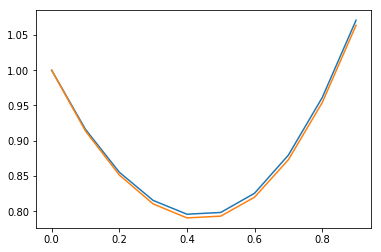

0.00048999523
0.00048998836
0.00048999884
0.00049000204
0.0004899908
0.0004899886
0.000489992
0.0004899838
0.0004899744
0.00048997335
0.0004899682
0.0004899568
0.00048995024
0.00048994576
0.00048993557
0.0004899252
0.0004899188
0.0004899101
0.00048989867
0.00048988976
0.0004898815
0.00048987044
0.00048985967
0.0004898507
0.00048984046
0.000489829
0.0004898188
0.00048980885
0.00048979756
0.00048978644
0.00048977614
0.0004897653
0.00048975385
0.00048974296
0.00048973225
0.0004897209
0.00048970955
0.0004896986
0.00048968743
0.00048967596
0.0004896648
0.00048965367
0.00048964226
0.00048963085
0.0004896196
0.0004896084
0.0004895969
0.0004895855
0.0004895742
0.0004895628
0.00048955134
0.00048954
0.0004895286
0.0004895172
0.0004895057
0.0004894943
0.0004894829
0.00048947136
0.00048945996
0.00048944855
0.0004894371
0.0004894256
0.0004894142
0.00048940274
0.00048939127
0.0004893798
0.00048936834
0.00048935687
0.0004893454
0.00048933394
0.0004893225
0.000489311
0.00048929953
0.00048928807
0.0004

0.00048419155
0.0004841803
0.00048416905
0.0004841578
0.00048414656
0.00048413532
0.00048412406
0.00048411282
0.0004841016
0.00048409033
0.0004840791
0.00048406786
0.0004840566
0.00048404536
0.00048403413
0.0004840229
0.00048401163
0.0004840004
0.00048398916
0.00048397793
0.0004839667
0.00048395546
0.00048394423
0.000483933
0.00048392176
0.0004839105
0.00048389926
0.00048388803
0.0004838768
0.0004838656
0.00048385435
0.00048384312
0.0004838319
0.00048382065
0.00048380942
0.00048379818
0.00048378695
0.00048377572
0.0004837645
0.00048375328
0.00048374204
0.0004837308
0.0004837196
0.00048370837
0.00048369713
0.00048368593
0.0004836747
0.00048366346
0.00048365226
0.00048364102
0.00048362982
0.00048361858
0.00048360735
0.00048359614
0.0004835849
0.0004835737
0.00048356247
0.00048355127
0.00048354006
0.00048352883
0.00048351762
0.0004835064
0.00048349518
0.00048348398
0.00048347274
0.00048346154
0.00048345033
0.0004834391
0.0004834279
0.0004834167
0.00048340549
0.00048339425
0.00048338305
0.

0.0004787509
0.00047873994
0.000478729
0.00047871802
0.00047870705
0.0004786961
0.00047868514
0.00047867413
0.00047866313
0.00047865213
0.00047864116
0.00047863016
0.00047861916
0.00047860816
0.00047859718
0.00047858618
0.00047857518
0.0004785642
0.0004785532
0.0004785422
0.00047853123
0.00047852023
0.00047850926
0.00047849826
0.0004784873
0.0004784763
0.00047846528
0.0004784543
0.00047844334
0.00047843234
0.00047842137
0.00047841037
0.0004783994
0.0004783884
0.00047837742
0.00047836645
0.00047835545
0.00047834447
0.0004783335
0.0004783225
0.00047831153
0.00047830056
0.00047828958
0.0004782786
0.0004782676
0.00047825664
0.00047824567
0.0004782347
0.00047822372
0.00047821275
0.00047820178
0.00047819078
0.0004781798
0.00047816883
0.00047815786
0.0004781469
0.00047813592
0.00047812494
0.00047811397
0.00047810303
0.00047809206
0.00047808109
0.0004780701
0.00047805914
0.00047804817
0.0004780372
0.00047802625
0.00047801528
0.0004780043
0.00047799334
0.00047798236
0.00047797142
0.00047796045


0.0004739006
0.00047389267
0.00047388588
0.0004738904
0.0004738902
0.0004738801
0.00047387436
0.0004738744
0.00047386836
0.00047385783
0.0004738522
0.0004738483
0.00047383926
0.00047382922
0.00047382287
0.00047381598
0.00047380567
0.00047379616
0.0004737888
0.00047378
0.00047376938
0.00047376004
0.0004737516
0.00047374176
0.00047373117
0.00047372168
0.00047371243
0.0004737021
0.00047369162
0.00047368192
0.0004736721
0.00047366155
0.0004736511
0.00047364118
0.000473631
0.00047362037
0.00047360995
0.0004735998
0.00047358937
0.00047357872
0.0004735683
0.00047355797
0.00047354744
0.0004735368
0.00047352634
0.00047351592
0.00047350535
0.00047349473
0.0004734842
0.0004734737
0.0004734631
0.00047345247
0.0004734419
0.00047343134
0.00047342072
0.0004734101
0.00047339953
0.00047338894
0.0004733783
0.00047336766
0.00047335707
0.00047334647
0.00047333585
0.00047332523
0.00047331463
0.000473304
0.0004732934
0.00047328277
0.00047327214
0.00047326152
0.0004732509
0.00047324027
0.00047322965
0.000473

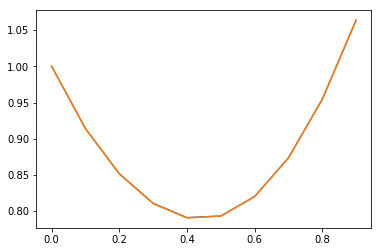

0.00047300672
0.0004729961
0.0004729855
0.00047297488
0.00047296428
0.00047295366
0.00047294307
0.00047293244
0.00047292185
0.0004729112
0.00047290057
0.00047288992
0.00047287927
0.00047286865
0.000472858
0.00047284737
0.00047283672
0.0004728261
0.00047281545
0.00047280482
0.00047279417
0.00047278355
0.0004727729
0.00047276227
0.00047275162
0.000472741
0.00047273037
0.00047271972
0.0004727091
0.00047269848
0.00047268783
0.0004726772
0.00047266658
0.00047265596
0.0004726453
0.00047263468
0.00047262406
0.00047261344
0.0004726028
0.00047259216
0.00047258154
0.00047257092
0.0004725603
0.00047254967
0.00047253905
0.00047252842
0.0004725178
0.00047250718
0.00047249655
0.00047248593
0.0004724753
0.0004724647
0.00047245406
0.00047244344
0.00047243282
0.0004724222
0.00047241157
0.00047240098
0.00047239035
0.00047237973
0.0004723691
0.0004723585
0.0004723479
0.00047233727
0.00047232665
0.00047231602
0.00047230543
0.0004722948
0.00047228418
0.0004722736
0.00047226297
0.00047225234
0.00047224175
0

0.00046717134
0.00046716095
0.00046715056
0.00046714017
0.00046712978
0.0004671194
0.000467109
0.0004670986
0.00046708822
0.00046707783
0.00046706744
0.00046705708
0.0004670467
0.0004670363
0.0004670259
0.00046701552
0.00046700513
0.00046699477
0.00046698438
0.000466974
0.0004669636
0.00046695324
0.00046694285
0.00046693246
0.0004669221
0.0004669117
0.0004669013
0.00046689095
0.00046688056
0.0004668702
0.0004668598
0.00046684945
0.00046683906
0.0004668287
0.0004668183
0.00046680795
0.00046679756
0.0004667872
0.0004667768
0.00046676645
0.00046675606
0.0004667457
0.00046673534
0.00046672494
0.00046671458
0.00046670422
0.00046669383
0.00046668347
0.0004666731
0.00046666272
0.00046665236
0.000466642
0.00046663164
0.00046662128
0.0004666109
0.00046660053
0.00046659017
0.0004665798
0.00046656944
0.00046655908
0.00046654872
0.00046653833
0.00046652797
0.0004665176
0.00046650725
0.0004664969
0.00046648653
0.00046647617
0.0004664658
0.00046645544
0.0004664451
0.00046643475
0.0004664244
0.000466

0.00046266255
0.00046265248
0.0004626424
0.0004626323
0.00046262218
0.0004626121
0.000462602
0.0004625919
0.0004625818
0.0004625717
0.00046256158
0.00046255148
0.0004625414
0.0004625313
0.0004625212
0.0004625111
0.000462501
0.0004624909
0.0004624808
0.0004624707
0.0004624606
0.0004624505
0.0004624404
0.0004624303
0.0004624202
0.0004624101
0.0004624
0.0004623899
0.0004623798
0.0004623697
0.0004623596
0.0004623495
0.00046233943
0.00046232934
0.00046231924
0.00046230914
0.00046229907
0.00046228897
0.00046227887
0.00046226877
0.0004622587
0.0004622486
0.0004622385
0.00046222843
0.00046221833
0.00046220823
0.00046219816
0.00046218807
0.000462178
0.0004621679
0.0004621578
0.00046214773
0.00046213763
0.00046212756
0.00046211746
0.0004621074
0.0004620973
0.00046208722
0.00046207715
0.00046206705
0.00046205698
0.00046204688
0.0004620368
0.00046202674
0.00046201664
0.00046200657
0.0004619965
0.0004619864
0.00046197633
0.00046196626
0.0004619562
0.0004619461
0.00046193603
0.00046192596
0.00046191

0.0004573515
0.00045734164
0.00045733174
0.00045732185
0.00045731198
0.00045730209
0.00045729222
0.00045728232
0.00045727243
0.00045726256
0.00045725267
0.0004572428
0.0004572329
0.00045722304
0.00045721314
0.00045720328
0.00045719338
0.00045718352
0.00045717365
0.00045716375
0.0004571539
0.000457144
0.00045713413
0.00045712426
0.00045711437
0.0004571045
0.00045709463
0.00045708477
0.00045707487
0.000457065
0.00045705514
0.00045704527
0.00045703538
0.0004570255
0.00045701565
0.00045700578
0.0004569959
0.00045698605
0.00045697615
0.00045696629
0.00045695642
0.00045694655
0.0004569367
0.00045692682
0.00045691695
0.0004569071


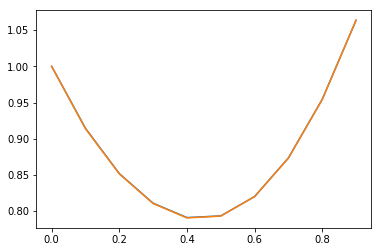

0.00045689722
0.00045688736
0.0004568775
0.00045686762
0.00045685776
0.0004568479
0.00045683802
0.00045682816
0.00045681832
0.00045680846
0.0004567986
0.00045678872
0.00045677886
0.000456769
0.00045675915
0.0004567493
0.00045673942
0.00045672955
0.00045671972
0.00045670985
0.00045669999
0.00045669012
0.00045668028
0.00045667042
0.00045666055
0.0004566507
0.00045664085
0.000456631
0.00045662114
0.00045661128
0.00045660144
0.00045659157
0.00045658174
0.00045657187
0.00045656203
0.00045655217
0.00045654233
0.00045653246
0.00045652266
0.00045651285
0.00045650307
0.00045649335
0.0004564837
0.0004564743
0.00045646532
0.00045645717
0.0004564507
0.00045644757
0.0004564511
0.0004564671
0.00045650612
0.00045657993
0.00045669673
0.00045682705
0.0004569179
0.0004569343
0.00045692697
0.0004569594
0.00045702228
0.00045705898
0.00045705383
0.00045705526
0.00045708692
0.0004571121
0.00045710817
0.00045710398
0.0004571202
0.00045713404
0.00045712816
0.00045712193
0.0004571292
0.00045713453
0.0004571270

0.00045240455
0.00045239498
0.00045238537
0.0004523758
0.0004523662
0.0004523566
0.000452347
0.0004523374
0.00045232783
0.00045231823
0.00045230865
0.00045229905
0.00045228947
0.00045227987
0.0004522703
0.0004522607
0.00045225112
0.00045224154
0.00045223194
0.00045222236
0.0004522128
0.00045220318
0.0004521936
0.00045218403
0.00045217443
0.00045216485
0.00045215528
0.00045214567
0.0004521361
0.00045212652
0.00045211695
0.00045210737
0.00045209777
0.0004520882
0.00045207862
0.00045206904
0.00045205947
0.0004520499
0.00045204032
0.0004520307
0.00045202114
0.00045201156
0.000452002
0.0004519924
0.00045198284
0.00045197326
0.0004519637
0.0004519541
0.00045194454
0.00045193496
0.00045192539
0.0004519158
0.00045190626
0.0004518967
0.0004518871
0.00045187754
0.00045186796
0.0004518584
0.0004518488
0.00045183927
0.0004518297
0.00045182012
0.00045181054
0.000451801
0.00045179142
0.00045178185
0.00045177227
0.00045176272
0.00045175315
0.00045174357
0.00045173403
0.00045172445
0.00045171488
0.000

0.00044771458
0.00044770518
0.00044769578
0.00044768638
0.00044767698
0.00044766758
0.00044765818
0.00044764878
0.00044763938
0.00044762998
0.00044762058
0.00044761118
0.00044760178
0.00044759238
0.00044758298
0.00044757358
0.00044756418
0.00044755478
0.00044754538
0.00044753597
0.0004475266
0.0004475172
0.0004475078
0.0004474984
0.000447489
0.00044747963
0.00044747023
0.00044746083
0.00044745143
0.00044744206
0.00044743266
0.00044742326
0.00044741385
0.00044740448
0.00044739508
0.00044738568
0.0004473763
0.0004473669
0.00044735754
0.00044734814
0.00044733874
0.00044732937
0.00044731997
0.0004473106
0.0004473012
0.00044729182
0.00044728242
0.00044727305
0.00044726365
0.00044725428
0.00044724488
0.00044723554
0.0004472262
0.00044721688
0.0004472076
0.00044719837
0.0004471893
0.00044718056
0.00044717244
0.0004471656
0.00044716135
0.00044716225
0.0004471734
0.00044720338
0.00044726615
0.0004473702
0.00044750696
0.0004476162
0.00044765268
0.00044764442
0.00044766543
0.0004477293
0.00044777

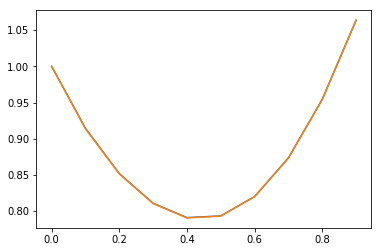

0.00044308073
0.0004430716
0.00044306245
0.00044305332
0.0004430442
0.00044303507
0.00044302593
0.0004430168
0.00044300765
0.00044299854
0.0004429894
0.00044298026
0.00044297113
0.00044296202
0.00044295288
0.00044294374
0.0004429346
0.0004429255
0.00044291635
0.00044290724
0.0004428981
0.00044288897
0.00044287986
0.00044287072
0.00044286158
0.00044285247
0.00044284333
0.00044283422
0.00044282508
0.00044281597
0.00044280684
0.00044279773
0.0004427886
0.00044277948
0.00044277034
0.00044276123
0.00044275212
0.00044274298
0.00044273387
0.00044272473
0.00044271562
0.0004427065
0.00044269738
0.00044268827
0.00044267916
0.00044267002
0.0004426609
0.0004426518
0.0004426427
0.00044263355
0.00044262444
0.00044261533
0.00044260622
0.00044259708
0.00044258797
0.00044257886
0.00044256976
0.00044256065
0.00044255154
0.0004425424
0.0004425333
0.00044252418
0.00044251507
0.00044250596
0.00044249685
0.00044248774
0.00044247863
0.00044246952
0.0004424604
0.0004424513
0.0004424422
0.00044243308
0.0004424

0.0004384377
0.00043842883
0.00043841996
0.00043841108
0.0004384022
0.00043839333
0.00043838448
0.0004383756
0.0004383667
0.0004383578
0.00043834888
0.00043833998
0.00043833107
0.0004383222
0.0004383133
0.00043830439
0.00043829548
0.0004382866
0.0004382777
0.0004382688
0.00043825989
0.000438251
0.0004382421
0.0004382332
0.00043822432
0.00043821541
0.0004382065
0.00043819763
0.00043818873
0.00043817982
0.00043817094
0.00043816204
0.00043815316
0.00043814426
0.00043813538
0.00043812647
0.00043811757
0.0004381087
0.00043809979
0.0004380909
0.00043808203
0.00043807313
0.00043806425
0.00043805534
0.00043804647
0.00043803756
0.00043802868
0.0004380198
0.0004380109
0.00043800203
0.00043799315
0.00043798424
0.00043797537
0.0004379665
0.00043795758
0.0004379487
0.00043793983
0.00043793092
0.00043792205
0.00043791317
0.0004379043
0.00043789542
0.0004378865
0.00043787764
0.00043786876
0.00043785988
0.000437851
0.00043784213
0.00043783322
0.00043782435
0.00043781547
0.0004378066
0.00043779772
0.00

0.00043396011
0.00043396806
0.0004339653
0.00043395703
0.00043395645
0.00043395822
0.00043395237
0.00043394434
0.00043394175
0.0004339397
0.0004339324
0.00043392446
0.00043392027
0.00043391564
0.00043390758
0.00043389975
0.0004338943
0.00043388814
0.00043387976
0.00043387184
0.00043386538
0.00043385822
0.00043384972
0.00043384163
0.0004338345
0.00043382676
0.00043381818
0.00043381
0.00043380234
0.00043379425
0.00043378564
0.00043377734
0.00043376937
0.00043376107
0.00043375246
0.00043374405
0.00043373587
0.00043372746
0.00043371884
0.00043371037
0.00043370205
0.00043369355
0.00043368494
0.0004336764
0.000433668
0.00043365944
0.00043365083
0.0004336423
0.0004336338
0.00043362522
0.00043361657
0.00043360802
0.00043359946
0.00043359087
0.00043358226
0.00043357364
0.00043356506
0.00043355644
0.00043354783
0.00043353922
0.0004335306
0.00043352201
0.00043351337
0.00043350473
0.00043349614
0.00043348753
0.00043347888
0.00043347027
0.00043346162
0.00043345298
0.00043344437
0.00043343572
0.0004

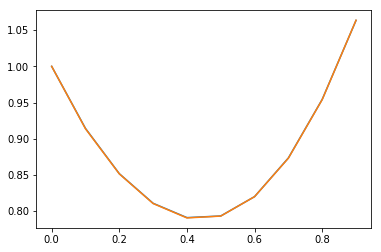

0.00043007554
0.000430067
0.0004300585
0.00043005001
0.0004300415
0.000430033
0.0004300245
0.00043001596
0.00043000747
0.00042999897
0.00042999047
0.00042998194
0.00042997344
0.00042996494
0.00042995645
0.00042994792
0.00042993942
0.00042993092
0.00042992242
0.0004299139
0.0004299054
0.0004298969
0.0004298884
0.0004298799
0.0004298714
0.0004298629
0.0004298544
0.00042984588
0.00042983738
0.00042982888
0.0004298204
0.0004298119
0.0004298034
0.0004297949
0.0004297864
0.0004297779
0.0004297694
0.0004297609
0.0004297524
0.0004297439
0.0004297354
0.00042972693
0.00042971844
0.00042970994
0.00042970144
0.00042969294
0.00042968444
0.00042967594
0.00042966745
0.00042965898
0.00042965048
0.00042964198
0.00042963348
0.00042962498
0.0004296165
0.00042960802
0.00042959952
0.00042959102
0.00042958255
0.00042957405
0.00042956555
0.00042955708
0.00042954859
0.0004295401
0.00042953162
0.00042952312
0.00042951462
0.00042950615
0.00042949765
0.00042948916
0.0004294807
0.0004294722
0.00042946372
0.000429

0.00042557175
0.00042556348
0.00042555522
0.00042554695
0.0004255387
0.00042553042
0.00042552216
0.0004255139
0.00042550563
0.00042549736
0.0004254891
0.00042548083
0.0004254726
0.00042546433
0.00042545606
0.0004254478
0.00042543953
0.00042543127
0.000425423
0.0004254147
0.00042540644
0.00042539815
0.00042538985
0.00042538156
0.00042537326
0.000425365
0.0004253567
0.0004253484
0.0004253401
0.00042533182
0.00042532355
0.00042531526
0.00042530696
0.0004252987
0.0004252904
0.0004252821
0.00042527384
0.00042526555
0.00042525725
0.000425249
0.0004252407
0.0004252324
0.00042522413
0.00042521584
0.00042520757
0.00042519928
0.00042519098
0.00042518272
0.00042517442
0.00042516616
0.00042515786
0.0004251496
0.0004251413
0.00042513304
0.00042512474
0.00042511648
0.0004251082
0.00042509992
0.00042509165
0.00042508336
0.0004250751
0.0004250668
0.00042505853
0.00042505027
0.00042504197
0.0004250337
0.00042502544
0.00042501715
0.00042500888
0.00042500062
0.00042499232
0.00042498406
0.0004249758
0.000

0.00042134203
0.00042133432
0.00042132635
0.00042131834
0.0004213105
0.00042130268
0.00042129468
0.00042128665
0.00042127873
0.00042127082
0.0004212628
0.00042125478
0.0004212468
0.00042123886
0.00042123083
0.00042122274
0.00042121473
0.0004212068
0.00042119875
0.00042119066
0.00042118266
0.00042117466
0.00042116662
0.00042115856
0.00042115053
0.0004211425
0.00042113446
0.0004211264
0.00042111834
0.0004211103
0.00042110228
0.0004210942
0.00042108615
0.00042107812
0.00042107006
0.000421062
0.00042105393
0.00042104587
0.0004210378
0.00042102978
0.00042102172
0.00042101365
0.0004210056
0.00042099756
0.0004209895
0.00042098144
0.00042097337
0.00042096534
0.00042095728
0.00042094922
0.00042094119
0.00042093312
0.00042092506
0.00042091703
0.00042090897
0.0004209009
0.00042089287
0.0004208848
0.00042087678
0.00042086872
0.00042086066
0.00042085262
0.00042084456
0.00042083653
0.00042082847
0.00042082043
0.00042081237
0.00042080434
0.00042079628
0.00042078824
0.00042078018
0.00042077215
0.00042

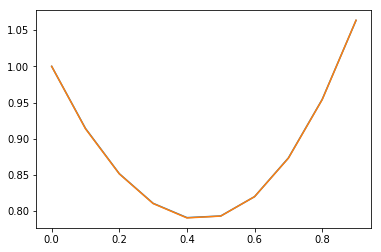

0.00041792204
0.0004179141
0.00041790615
0.0004178982
0.00041789023
0.0004178823
0.00041787434
0.0004178664
0.00041785845
0.0004178505
0.00041784256
0.0004178346
0.00041782667
0.00041781872
0.00041781078
0.00041780283
0.0004177949
0.00041778694
0.000417779
0.00041777108
0.00041776313
0.0004177552
0.00041774724
0.0004177393
0.00041773135
0.0004177234
0.00041771546
0.00041770755
0.0004176996
0.00041769166
0.0004176837
0.00041767576
0.00041766782
0.0004176599
0.00041765196
0.000417644
0.00041763607
0.00041762815
0.0004176202
0.00041761226
0.00041760434
0.0004175964
0.00041758845
0.00041758054
0.0004175726
0.00041756465
0.00041755673
0.00041754878
0.00041754084
0.00041753292
0.00041752498
0.00041751706
0.00041750912
0.00041750117
0.00041749325
0.0004174853
0.0004174774
0.00041746945
0.00041746153
0.0004174536
0.00041744567
0.00041743772
0.0004174298
0.00041742186
0.00041741395
0.000417406
0.00041739809
0.00041739017
0.00041738222
0.0004173743
0.00041736636
0.00041735845
0.00041735053
0.000

0.00041433735
0.00041433776
0.00041437833
0.00041443342
0.00041445278
0.00041444547
0.0004144569
0.00041448747
0.0004145008
0.0004144939
0.00041449812
0.00041451643
0.00041452254
0.00041451523
0.00041451576
0.00041452455
0.0004145245
0.0004145169
0.000414516
0.0004145189
0.0004145147
0.00041450735
0.0004145052
0.00041450417
0.00041449798
0.0004144909
0.00041448753
0.00041448383
0.00041447667
0.00041446975
0.00041446526
0.0004144599
0.00041445237
0.00041444547
0.00041443997
0.00041443354
0.0004144259
0.0004144189
0.0004144127
0.00041440566
0.00041439797
0.00041439087
0.00041438415
0.0004143768
0.00041436907
0.00041436186
0.00041435476
0.00041434722
0.00041433953
0.00041433217
0.00041432484
0.0004143172
0.00041430953
0.00041430205
0.00041429457
0.0004142869
0.0004142792
0.00041427164
0.00041426407
0.00041425636
0.00041424864
0.00041424105
0.00041423342
0.00041422568
0.00041421797
0.0004142103
0.00041420266
0.00041419495
0.00041418723
0.00041417955
0.00041417187
0.00041416415
0.0004141564

0.00040993944
0.00040993185
0.00040992425
0.00040991665
0.00040990906
0.00040990146
0.00040989387
0.00040988627
0.00040987867
0.00040987108
0.00040986348
0.0004098559
0.0004098483
0.00040984072
0.00040983313
0.00040982553
0.00040981793
0.00040981034
0.00040980274
0.00040979515
0.00040978758
0.00040977998
0.0004097724
0.0004097648
0.0004097572
0.00040974963
0.00040974203
0.00040973444
0.00040972684
0.00040971927
0.00040971168
0.00040970408
0.0004096965
0.00040968892
0.00040968132
0.00040967375
0.00040966616
0.00040965856
0.000409651
0.0004096434
0.0004096358
0.00040962824
0.00040962064
0.00040961307
0.00040960548
0.00040959788
0.0004095903
0.00040958272
0.00040957515
0.00040956755
0.00040956
0.0004095524
0.00040954482
0.00040953723
0.00040952966
0.00040952206
0.0004095145
0.0004095069
0.00040949933
0.00040949174
0.00040948417
0.0004094766
0.000409469
0.00040946144
0.00040945385
0.00040944628
0.0004094387
0.00040943112
0.00040942355
0.00040941598
0.00040940839
0.00040940082
0.00040939325

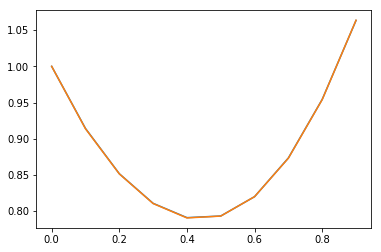

0.0004068889
0.00040688147
0.00040687405
0.00040686663
0.0004068592
0.0004068518
0.00040684437
0.00040683695
0.00040682952
0.0004068221
0.0004068147
0.0004068073
0.00040679987
0.00040679245
0.00040678502
0.0004067776
0.00040677018
0.00040676276
0.00040675534
0.00040674795
0.00040674052
0.0004067331
0.00040672568
0.00040671826
0.00040671087
0.00040670345
0.00040669602
0.0004066886
0.0004066812
0.0004066738
0.00040666637
0.00040665895
0.00040665155
0.00040664413
0.0004066367
0.00040662932
0.0004066219
0.00040661448
0.00040660708
0.00040659966
0.00040659224
0.00040658485
0.00040657743
0.00040657
0.0004065626
0.0004065552
0.0004065478
0.00040654038
0.00040653296
0.00040652556
0.00040651814
0.00040651075
0.00040650333
0.0004064959
0.00040648846
0.00040648103
0.00040647358
0.00040646616
0.00040645874
0.0004064513
0.00040644387
0.00040643642
0.000406429
0.00040642155
0.00040641412
0.0004064067
0.00040639925
0.00040639183
0.0004063844
0.00040637696
0.00040636954
0.00040636212
0.00040635467
0.0

0.0004024675
0.0004024603
0.00040245324
0.0004024464
0.00040243997
0.00040243453
0.00040243095
0.00040243127
0.00040243927
0.00040246246
0.00040251127
0.00040259893
0.00040271558
0.0004028238
0.0004028662
0.00040286093
0.00040287565
0.00040293034
0.00040297743
0.00040298124
0.00040297885
0.00040300572
0.00040303348
0.00040303366
0.0004030305
0.00040304704
0.0004030618
0.00040305773
0.00040305476
0.00040306427
0.00040306884
0.00040306227
0.00040306023
0.00040306465
0.00040306262
0.0004030556
0.00040305385
0.0004030542
0.00040304894
0.0004030424
0.00040304003
0.0004030371
0.00040303034
0.00040302437
0.00040302085
0.00040301576
0.00040300863
0.0004030028
0.00040299806
0.00040299172
0.0004029846
0.0004029787
0.00040297298
0.00040296605
0.00040295906
0.00040295292
0.00040294652
0.00040293936
0.0004029325
0.00040292606
0.00040291922
0.000402912
0.00040290513
0.0004028984
0.00040289137
0.00040288418
0.00040287722
0.00040287033
0.00040286317
0.00040285598
0.00040284896
0.00040284195
0.00040283

0.0003995198
0.00039951268
0.00039950554
0.0003994984
0.00039949128
0.00039948415
0.00039947702
0.0003994699
0.00039946276
0.00039945563
0.0003994485
0.00039944137
0.00039943424
0.0003994271
0.00039941998
0.00039941285
0.00039940572
0.0003993986
0.00039939146
0.00039938433
0.0003993772
0.00039937007
0.00039936297
0.00039935583
0.0003993487
0.00039934157
0.00039933444
0.0003993273
0.00039932018
0.00039931308
0.00039930595
0.00039929882
0.0003992917
0.00039928456
0.00039927746
0.00039927033
0.0003992632
0.00039925607
0.00039924897
0.00039924184
0.0003992347
0.00039922757
0.00039922047
0.00039921334
0.0003992062
0.0003991991
0.00039919198
0.00039918485
0.00039917775
0.00039917062
0.0003991635
0.0003991564
0.00039914926
0.00039914215
0.00039913502
0.0003991279
0.0003991208
0.00039911366
0.00039910656
0.00039909943
0.00039909233
0.0003990852
0.0003990781
0.00039907097
0.00039906387
0.00039905673
0.00039904963
0.0003990425
0.0003990354
0.00039902827
0.00039902117
0.00039901404
0.00039900694


0.00039615197
0.00039614498
0.00039613797
0.00039613098
0.000396124


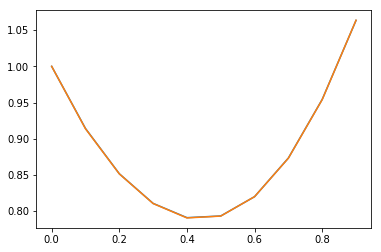

0.00039611702
0.00039611
0.00039610302
0.00039609603
0.00039608905
0.00039608206
0.00039607505
0.00039606806
0.00039606108
0.0003960541
0.0003960471
0.00039604012
0.0003960331
0.00039602612
0.00039601914
0.00039601215
0.00039600517
0.00039599818
0.0003959912
0.0003959842
0.00039597723
0.00039597024
0.00039596326
0.00039595627
0.0003959493
0.00039594228
0.0003959353
0.0003959283
0.00039592132
0.00039591434
0.00039590738
0.0003959004
0.0003958934
0.00039588643
0.00039587944
0.00039587246
0.00039586547
0.0003958585
0.0003958515
0.00039584452
0.00039583753
0.00039583055
0.00039582356
0.0003958166
0.00039580962
0.00039580264
0.00039579565
0.00039578867
0.00039578168
0.00039577472
0.00039576774
0.00039576076
0.00039575377
0.00039574679
0.00039573983
0.00039573284
0.00039572586
0.00039571887
0.00039571192
0.00039570493
0.00039569795
0.00039569096
0.000395684
0.00039567702
0.00039567004
0.00039566308
0.0003956561
0.0003956491
0.00039564216
0.00039563517
0.0003956282
0.00039562123
0.00039561425

0.00039367029
0.0003936669
0.0003936604
0.00039365483
0.00039365105
0.00039364555
0.00039363885
0.00039363367
0.00039362867
0.00039362212
0.00039361574
0.00039361036
0.00039360434
0.00039359755
0.00039359138
0.0003935855
0.00039357896
0.00039357223
0.00039356606
0.00039355975
0.00039355297
0.00039354636
0.00039354002
0.00039353338
0.00039352657
0.00039352
0.00039351347
0.00039350672
0.00039349994
0.00039349336
0.00039348667
0.00039347986
0.0003934731
0.00039346644
0.0003934597
0.00039345288
0.00039344613
0.00039343938
0.0003934326
0.00039342578
0.00039341903
0.00039341228
0.00039340547
0.0003933987
0.0003933919
0.00039338513
0.00039337832
0.0003933715
0.00039336472
0.0003933579
0.0003933511
0.0003933443
0.0003933375
0.0003933307
0.0003933239
0.00039331708
0.00039331027
0.0003933035
0.00039329665
0.00039328984
0.00039328303
0.00039327625
0.0003932694
0.0003932626
0.00039325582
0.00039324898
0.00039324214
0.00039323536
0.00039322852
0.00039322168
0.00039321487
0.00039320803
0.00039320122

0.00039048682
0.0003904801
0.00039047337
0.00039046668
0.00039045996
0.00039045324
0.00039044654
0.00039043982
0.0003904331
0.00039042637
0.00039041968
0.00039041296
0.00039040623
0.00039039954
0.00039039282
0.0003903861
0.0003903794
0.00039037268
0.00039036598
0.00039035926
0.00039035254
0.00039034584
0.00039033912
0.00039033243
0.0003903257
0.00039031898
0.00039031229
0.00039030556
0.00039029887
0.00039029215
0.00039028545
0.00039027873
0.00039027203
0.0003902653
0.00039025862
0.0003902519
0.0003902452
0.00039023848
0.00039023178
0.00039022506
0.0003902183
0.0003902116
0.00039020483
0.0003901981
0.0003901914
0.00039018466
0.0003901779
0.0003901712
0.00039016447
0.00039015771
0.000390151
0.00039014427
0.00039013755
0.0003901308
0.00039012407
0.00039011735
0.00039011062
0.00039010387
0.00039009715
0.00039009043
0.0003900837
0.00039007698
0.00039007023
0.0003900635
0.00039005678
0.00039005006
0.00039004334
0.0003900366
0.00039002986
0.00039002314
0.00039001642
0.0003900097
0.00039000297

0.00038694634
0.00038693973
0.00038693313
0.00038692652
0.0003869199
0.0003869133
0.0003869067
0.00038690012
0.00038689352
0.0003868869
0.0003868803
0.0003868737
0.0003868671
0.00038686048
0.0003868539
0.0003868473
0.0003868407
0.0003868341
0.00038682748
0.0003868209
0.0003868143
0.0003868077
0.00038680108
0.0003867945
0.0003867879
0.0003867813
0.0003867747
0.0003867681
0.0003867615
0.0003867549
0.00038674832
0.0003867417
0.0003867351
0.00038672853
0.00038672192
0.0003867153
0.00038670874
0.00038670213
0.00038669552
0.00038668895
0.00038668234
0.00038667576
0.00038666915
0.00038666255
0.00038665597
0.00038664936
0.0003866428
0.00038663618
0.0003866296
0.000386623
0.00038661642
0.0003866098
0.0003866032
0.00038659663
0.00038659002
0.00038658344
0.00038657684
0.00038657026
0.00038656368
0.00038655708
0.0003865505
0.0003865439
0.00038653731
0.0003865307
0.00038652413
0.00038651752
0.00038651095
0.00038650437
0.00038649776
0.00038649119
0.00038648458
0.000386478
0.00038647142
0.00038646485

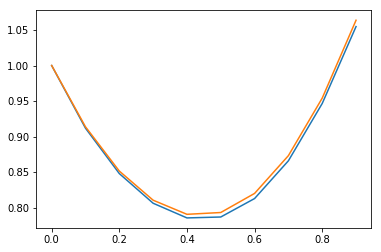

0.00038703796
0.00038703182
0.00038703365
0.0003870373
0.0003870328
0.0003870277
0.00038702835
0.00038702734
0.00038702117
0.00038701695
0.00038701575
0.00038701156
0.00038700516
0.0003870012
0.00038699803
0.00038699227
0.00038698612
0.00038698185
0.00038697707
0.0003869707
0.00038696488
0.00038696002
0.00038695426
0.0003869478
0.00038694203
0.0003869366
0.0003869303
0.00038692387
0.00038691802
0.00038691208
0.0003869056
0.00038689925
0.00038689325
0.000386887
0.00038688048
0.0003868741
0.00038686793
0.00038686153
0.00038685498
0.0003868486
0.0003868423
0.0003868358
0.00038682928
0.00038682288
0.00038681648
0.00038680996
0.00038680344
0.00038679698
0.00038679052
0.000386784
0.00038677745
0.000386771
0.00038676447
0.00038675795
0.0003867514
0.0003867449
0.0003867384
0.00038673187
0.00038672535
0.00038671884
0.00038671232
0.00038670577
0.00038669922
0.0003866927
0.00038668618
0.00038667963
0.00038667308
0.00038666656
0.00038666005
0.0003866535
0.00038664695
0.00038664043
0.0003866339
0.0

0.00038332943
0.00038332297
0.00038331654
0.00038331008
0.00038330362
0.00038329719
0.00038329072
0.0003832843
0.00038327783
0.00038327137
0.00038326494
0.00038325848
0.00038325205
0.00038324558
0.00038323915
0.0003832327
0.00038322626
0.0003832198
0.00038321337
0.0003832069
0.00038320047
0.000383194
0.00038318758
0.00038318112
0.0003831747
0.00038316823
0.0003831618
0.00038315536
0.0003831489
0.00038314247
0.000383136
0.00038312958
0.00038312314
0.00038311668
0.00038311025
0.0003831038
0.00038309736
0.00038309093
0.00038308447
0.00038307803
0.0003830716
0.00038306514
0.0003830587
0.00038305228
0.00038304582
0.00038303938
0.00038303295
0.0003830265
0.00038302006
0.00038301363
0.0003830072
0.00038300073
0.0003829943
0.00038298787
0.00038298144
0.000382975
0.00038296854
0.0003829621
0.00038295568
0.00038294925
0.00038294282
0.00038293636
0.00038292992
0.0003829235
0.00038291706
0.00038291063
0.0003829042
0.00038289774
0.0003828913
0.00038288487
0.00038287844
0.000382872
0.00038286558
0.0

0.00038032263
0.00038031634
0.00038031006
0.00038030377
0.00038029748
0.00038029117
0.00038028488
0.0003802786
0.0003802723
0.00038026602
0.0003802597
0.00038025342
0.00038024713
0.00038024085
0.00038023456
0.00038022827
0.000380222
0.00038021567
0.00038020939
0.0003802031
0.0003801968
0.00038019053
0.00038018424
0.00038017795
0.00038017167
0.00038016538
0.0003801591
0.0003801528
0.00038014652
0.0003801402
0.00038013392
0.00038012763
0.00038012135
0.00038011506
0.00038010877
0.0003801025
0.0003800962
0.0003800899
0.00038008363
0.00038007734
0.00038007108
0.0003800648
0.0003800585
0.00038005222
0.00038004594
0.00038003965
0.00038003337
0.00038002708
0.0003800208
0.0003800145
0.00038000822
0.00038000193
0.00037999568
0.0003799894
0.0003799831
0.00037997682
0.00037997053
0.00037996424
0.000379958
0.0003799517
0.0003799454
0.00037993913
0.00037993284
0.00037992658
0.0003799203
0.000379914
0.00037990772
0.00037990144
0.00037989518
0.0003798889
0.0003798826
0.00037987632
0.00037987006
0.0003

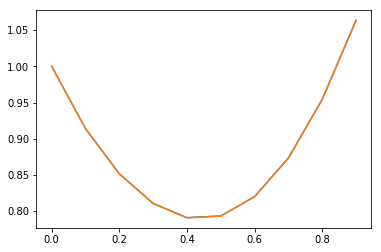

0.00037782
0.0003778138
0.0003778076
0.0003778014
0.0003777952
0.00037778902
0.00037778282
0.00037777663
0.00037777043
0.00037776423
0.00037775806
0.00037775186
0.00037774566
0.00037773946
0.00037773326
0.0003777271
0.0003777209
0.0003777147
0.0003777085
0.00037770232
0.00037769612
0.00037768992
0.00037768375
0.00037767756
0.00037767136
0.0003776652
0.000377659
0.0003776528
0.0003776466
0.00037764042
0.00037763422
0.00037762805
0.00037762185
0.00037761565
0.00037760948
0.00037760328
0.00037759705
0.00037759086
0.00037758466
0.00037757843
0.00037757223
0.000377566
0.0003775598
0.00037755357
0.00037754737
0.00037754115
0.00037753495
0.00037752875
0.00037752252
0.00037751632
0.0003775101
0.0003775039
0.0003774977
0.00037749147
0.00037748527
0.00037747907
0.00037747284
0.00037746664
0.00037746044
0.0003774542
0.000377448
0.00037744181
0.0003774356
0.0003774294
0.0003774232
0.00037741696
0.00037741076
0.00037740456
0.00037739836
0.00037739213
0.00037738594
0.00037737974
0.00037737354
0.0003

0.00037431013
0.00037430404
0.00037429796
0.00037429185
0.00037428577
0.00037427968
0.0003742736
0.0003742675
0.0003742614
0.00037425532
0.00037424924
0.00037424316
0.00037423708
0.00037423096
0.00037422488
0.0003742188
0.00037421272
0.00037420663
0.00037420055
0.00037419444
0.00037418836
0.00037418227
0.0003741762
0.0003741701
0.00037416402
0.00037415794
0.00037415186
0.00037414578
0.0003741397
0.0003741336
0.00037412753
0.0003741215
0.00037411557
0.0003741098
0.00037410436
0.00037409968
0.00037409662
0.00037409694
0.00037410427
0.000374126
0.0003741732
0.00037426088
0.00037437986
0.00037449002
0.00037452945
0.00037452433
0.00037454846
0.00037460928
0.00037464857
0.00037464596
0.0003746543
0.00037469057
0.00037470929
0.00037470413
0.00037471377
0.00037473562
0.00037473923
0.00037473437
0.00037474374
0.00037475323
0.00037474895
0.00037474738
0.00037475422
0.00037475396
0.0003747482
0.0003747491
0.00037475093
0.00037474607
0.00037474188
0.00037474206
0.00037473926
0.00037473335
0.000374

0.0003716761
0.00037167018
0.0003716642
0.00037165827
0.00037165234
0.00037164637
0.00037164043
0.00037163447
0.00037162853
0.00037162256
0.00037161662
0.0003716107
0.00037160472
0.00037159878
0.00037159282
0.00037158682
0.00037158086
0.0003715749
0.00037156892
0.00037156296
0.00037155696
0.000371551
0.00037154503
0.00037153906
0.0003715331
0.00037152713
0.00037152116
0.00037151517
0.0003715092
0.00037150324
0.00037149727
0.0003714913
0.00037148534
0.00037147937
0.0003714734
0.0003714674
0.00037146144
0.00037145548
0.0003714495
0.00037144354
0.00037143758
0.0003714316
0.00037142565
0.00037141968
0.0003714137
0.00037140775
0.00037140178
0.0003713958
0.00037138985
0.00037138388
0.00037137792
0.00037137195
0.00037136598
0.00037136002
0.00037135405
0.00037134808
0.00037134212
0.00037133615
0.00037133018
0.00037132422
0.00037131828
0.00037131232
0.00037130635
0.00037130038
0.00037129442
0.00037128845
0.00037128248
0.00037127652
0.00037127055
0.0003712646
0.00037125865
0.00037125268
0.000371

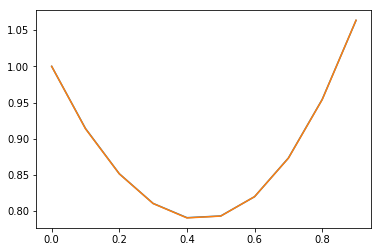

0.00036912708
0.0003691212
0.00036911533
0.00036910945
0.00036910357
0.0003690977
0.0003690918
0.00036908593
0.00036908005
0.00036907417
0.0003690683
0.0003690624
0.00036905654
0.00036905066
0.0003690448
0.00036903893
0.00036903305
0.00036902717
0.0003690213
0.0003690154
0.00036900953
0.00036900365
0.00036899777
0.0003689919
0.00036898605
0.00036898017
0.0003689743
0.0003689684
0.00036896253
0.00036895665
0.00036895077
0.00036894492
0.00036893904
0.00036893316
0.00036892729
0.0003689214
0.00036891556
0.00036890968
0.0003689038
0.00036889792
0.00036889204
0.0003688862
0.0003688803
0.00036887443
0.00036886855
0.0003688627
0.00036885682
0.00036885095
0.0003688451
0.00036883922
0.00036883334
0.00036882746
0.0003688216
0.00036881573
0.00036880985
0.000368804
0.00036879812
0.00036879224
0.0003687864
0.00036878051
0.00036877464
0.0003687688
0.0003687629
0.00036875706
0.00036875118
0.0003687453
0.00036873945
0.00036873357
0.00036872772
0.00036872184
0.00036871596
0.0003687101
0.00036870423
0.0

0.0003666763
0.00036667057
0.00036666487
0.00036665914
0.0003666534
0.0003666477
0.00036664194
0.00036663617
0.00036663047
0.0003666247
0.00036661897
0.0003666132
0.00036660748
0.00036660171
0.00036659598
0.00036659022
0.00036658449
0.00036657872
0.000366573
0.00036656723
0.0003665615
0.00036655573
0.00036655
0.00036654423
0.0003665385
0.00036653277
0.000366527
0.00036652127
0.0003665155
0.00036650978
0.00036650404
0.00036649828
0.00036649255
0.00036648678
0.00036648105
0.00036647532
0.00036646955
0.00036646382
0.0003664581
0.00036645232
0.0003664466
0.00036644086
0.0003664351
0.00036642936
0.00036642363
0.00036641787
0.00036641213
0.0003664064
0.00036640067
0.0003663949
0.00036638917
0.00036638344
0.00036637767
0.00036637194
0.0003663662
0.00036636047
0.0003663547
0.00036634898
0.00036634324
0.0003663375
0.00036633178
0.000366326
0.00036632028
0.00036631455
0.0003663088
0.00036630308
0.00036629732
0.00036629158
0.00036628585
0.00036628012
0.00036627438
0.00036626865
0.00036626292
0.00

0.00036344648
0.0003634408
0.00036343516
0.00036342948
0.00036342384
0.00036341816
0.00036341252
0.00036340687
0.0003634012
0.00036339555
0.00036338987
0.00036338423
0.00036337858
0.0003633729
0.00036336726
0.00036336159
0.00036335594
0.0003633503
0.00036334462
0.00036333897
0.00036333333
0.00036332765
0.000363322
0.00036331636
0.00036331068
0.00036330504
0.0003632994
0.00036329374
0.00036328807
0.00036328242
0.00036327678
0.0003632711
0.00036326546
0.0003632598
0.00036325416
0.0003632485
0.00036324284
0.0003632372
0.00036323155
0.0003632259
0.00036322023
0.00036321458
0.00036320894
0.0003632033
0.00036319764
0.00036319197
0.00036318632
0.00036318068
0.00036317503
0.00036316938
0.00036316374
0.00036315806
0.00036315242
0.00036314677
0.00036314112
0.00036313548
0.00036312983
0.00036312419
0.00036311854
0.00036311286
0.00036310722
0.00036310157
0.00036309593
0.00036309028
0.00036308463
0.000363079
0.00036307334
0.0003630677
0.00036306205
0.0003630564
0.00036305076
0.0003630451
0.00036303

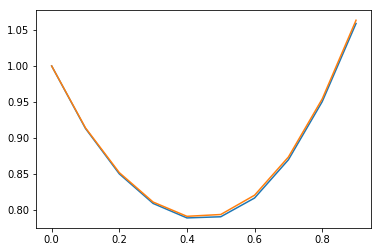

0.00036162653
0.00036162746
0.0003616266
0.00036162132
0.000361618
0.00036161713
0.0003616136
0.00036160822
0.00036160502
0.00036160246
0.00036159757
0.00036159245
0.00036158893
0.00036158497
0.00036157956
0.0003615747
0.00036157065
0.0003615658
0.00036156032
0.00036155552
0.00036155092
0.00036154565
0.00036154024
0.00036153532
0.0003615303
0.00036152487
0.00036151952
0.00036151445
0.00036150918
0.00036150368
0.00036149833
0.00036149312
0.0003614877
0.00036148218
0.00036147682
0.0003614715
0.000361466
0.0003614605
0.0003614551
0.0003614497
0.0003614442
0.0003614387
0.00036143325
0.0003614278
0.00036142228
0.00036141678
0.0003614113
0.00036140584
0.0003614003
0.00036139478
0.0003613893
0.0003613838
0.00036137828
0.00036137277
0.00036136727
0.00036136174
0.00036135621
0.00036135069
0.00036134518
0.00036133965
0.00036133413
0.00036132862
0.0003613231
0.00036131756
0.00036131204
0.00036130653
0.000361301
0.00036129548
0.00036128995
0.00036128442
0.00036127892
0.00036127339
0.00036126783
0.

0.00035911106
0.0003591056
0.00035910012
0.00035909464
0.0003590892
0.00035908373
0.00035907826
0.00035907282
0.00035906734
0.00035906187
0.0003590564
0.00035905096
0.0003590455
0.00035904002
0.00035903457
0.0003590291
0.00035902363
0.0003590182
0.00035901272
0.00035900724
0.0003590018
0.00035899633
0.0003589909
0.00035898542
0.00035897995
0.0003589745
0.00035896903
0.00035896356
0.00035895812
0.00035895265
0.0003589472
0.00035894173
0.00035893626
0.00035893076
0.0003589253
0.00035891982
0.00035891432
0.00035890884
0.00035890337
0.00035889787
0.0003588924
0.00035888693
0.00035888143
0.00035887596
0.0003588705
0.00035886499
0.0003588595
0.00035885404
0.00035884854
0.00035884307
0.0003588376
0.00035883213
0.00035882663
0.00035882115
0.00035881568
0.0003588102
0.0003588047
0.00035879924
0.00035879377
0.0003587883
0.0003587828
0.00035877732
0.00035877185
0.00035876638
0.0003587609
0.0003587554
0.00035874994
0.00035874447
0.000358739
0.00035873352
0.00035872805
0.00035872255
0.00035871708
0

0.00035671075
0.00035670534
0.00035669995
0.00035669454
0.00035668915
0.00035668374
0.00035667836
0.00035667294
0.00035666753
0.00035666215
0.00035665673
0.00035665135
0.00035664593
0.00035664055
0.00035663514
0.00035662975
0.00035662437
0.00035661896
0.00035661357
0.00035660816
0.00035660277
0.00035659736
0.00035659198
0.00035658656
0.00035658118
0.0003565758
0.00035657038
0.000356565
0.00035655958
0.0003565542
0.0003565488
0.0003565434
0.00035653802
0.0003565326
0.00035652722
0.00035652184
0.00035651642
0.00035651104
0.00035650565
0.00035650024
0.00035649486
0.00035648947
0.00035648406
0.00035647867
0.0003564733
0.00035646788
0.0003564625
0.0003564571
0.0003564517
0.0003564463
0.00035644093
0.00035643554
0.00035643013
0.00035642475
0.00035641936
0.00035641395
0.00035640856
0.00035640318
0.0003563978
0.0003563924
0.000356387
0.0003563816
0.00035637623
0.00035637085
0.00035636543
0.00035636005
0.00035635466
0.00035634928
0.0003563439
0.0003563385
0.0003563331
0.0003563277
0.00035632233

0.00035418593
0.0003541806
0.0003541753
0.00035416998
0.0003541647
0.0003541594
0.00035415406
0.00035414877
0.00035414344
0.00035413814
0.00035413282
0.00035412752
0.00035412222
0.0003541169
0.00035411163
0.00035410636
0.00035410115
0.00035409603
0.0003540911
0.0003540867
0.00035408325
0.00035408183
0.0003540847
0.00035409615
0.0003541246
0.0003541805
0.00035427394
0.0003543809
0.0003544558
0.00035446777
0.00035446696
0.00035450485
0.0003545575
0.00035457595
0.00035457106
0.00035458867
0.00035461978
0.0003546267
0.000354623
0.00035463768
0.00035465404
0.00035465238
0.00035465087
0.00035466137
0.0003546663
0.00035466126
0.00035466257
0.00035466818
0.0003546658
0.00035466158
0.00035466344
0.0003546638
0.00035465887
0.00035465622
0.00035465637
0.00035465302
0.00035464807
0.000354646
0.00035464377
0.00035463882
0.00035463457
0.0003546319
0.00035462776
0.0003546226
0.00035461874
0.000354615
0.00035460998
0.00035460512
0.00035460113
0.0003545965
0.0003545913
0.00035458663
0.00035458215
0.000

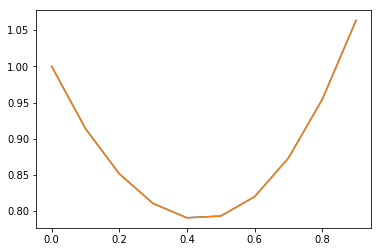

0.00035406993
0.00035406466
0.0003540594
0.00035405412
0.00035404885
0.0003540436
0.00035403832
0.00035403302
0.00035402775
0.0003540225
0.00035401722
0.00035401195
0.00035400668
0.00035400141
0.00035399615
0.00035399088
0.0003539856
0.00035398034
0.00035397508
0.00035396978
0.0003539645
0.00035395924
0.00035395398
0.0003539487
0.00035394344
0.00035393817
0.0003539329
0.00035392764
0.00035392237
0.0003539171
0.00035391183
0.00035390657
0.0003539013
0.00035389603
0.00035389076
0.0003538855
0.00035388023
0.000353875
0.00035386972
0.00035386445
0.00035385918
0.00035385392
0.00035384865
0.00035384338
0.0003538381
0.00035383285
0.00035382758
0.0003538223
0.00035381704
0.0003538118
0.00035380654
0.00035380127
0.000353796
0.00035379073
0.00035378546
0.0003537802
0.00035377496
0.0003537697
0.00035376442
0.00035375915
0.0003537539
0.00035374862
0.00035374338
0.0003537381
0.00035373284
0.00035372758
0.0003537223
0.00035371707
0.0003537118
0.00035370653
0.00035370127
0.00035369603
0.00035369076
0

0.00035096638
0.00035096117
0.000350956
0.0003509508
0.0003509456
0.00035094042
0.00035093524
0.00035093003
0.00035092485
0.00035091967
0.0003509145
0.00035090928
0.0003509041
0.00035089892
0.00035089374
0.00035088853
0.00035088335
0.00035087817
0.000350873
0.00035086778
0.0003508626
0.00035085742
0.00035085223
0.00035084705
0.00035084184
0.00035083666
0.00035083148
0.0003508263
0.00035082112
0.0003508159
0.00035081073
0.00035080555
0.00035080037
0.0003507952
0.00035079
0.0003507848
0.00035077965
0.00035077453
0.00035076943
0.00035076452
0.00035075986
0.00035075576
0.0003507529
0.0003507525
0.0003507572
0.00035077194
0.00035080584
0.00035086836
0.00035096507
0.0003510628
0.00035111778
0.00035111982
0.00035112497
0.00035116824
0.00035121408
0.00035122377
0.00035122043
0.00035124124
0.00035126825
0.000351271
0.00035126868
0.0003512842
0.00035129784
0.000351295
0.00035129438
0.00035130433
0.0003513079
0.00035130297
0.00035130433
0.00035130928
0.00035130675
0.00035130256
0.00035130393
0.00

0.0003493268
0.0003493217
0.0003493166
0.00034931148
0.00034930639
0.0003493013
0.0003492962
0.0003492911
0.000349286
0.00034928092
0.00034927583
0.00034927073
0.00034926564
0.00034926055
0.00034925545
0.00034925036
0.00034924527
0.00034924017
0.00034923508
0.00034923
0.0003492249
0.0003492198
0.0003492147
0.00034920961
0.00034920452
0.00034919943
0.00034919434
0.00034918924
0.00034918415
0.00034917906
0.00034917396
0.00034916887
0.00034916378
0.00034915868
0.0003491536
0.0003491485
0.0003491434
0.0003491383
0.00034913322
0.00034912812
0.00034912306
0.00034911797
0.00034911287
0.00034910778
0.0003491027
0.0003490976
0.0003490925
0.0003490874
0.00034908231
0.00034907725
0.00034907216
0.00034906706
0.00034906197
0.00034905688
0.00034905178
0.00034904672
0.00034904163
0.00034903653
0.00034903144
0.00034902635
0.00034902125
0.0003490162
0.0003490111
0.000349006
0.0003490009
0.00034899585
0.00034899075
0.00034898566
0.00034898057
0.00034897547
0.0003489704
0.00034896532
0.00034896022
0.0003

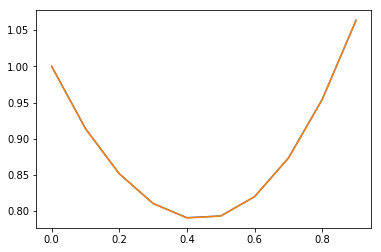

0.0003467038
0.00034669877
0.00034669373
0.0003466887
0.0003466837
0.00034667866
0.00034667362
0.0003466686
0.00034666355
0.00034665852
0.0003466535
0.00034664848
0.00034664344
0.0003466384
0.00034663337
0.00034662837
0.00034662333
0.0003466183
0.00034661326
0.00034660823
0.00034660322
0.0003465982
0.00034659315
0.00034658812
0.0003465831
0.00034657808
0.00034657304
0.000346568
0.000346563
0.00034655796
0.00034655293
0.0003465479
0.0003465429
0.00034653785
0.00034653282
0.0003465278
0.00034652278
0.00034651774
0.00034651274
0.0003465077
0.00034650267
0.00034649766
0.00034649263
0.0003464876
0.0003464826
0.00034647755
0.00034647252
0.0003464675
0.00034646248
0.00034645744
0.00034645243
0.0003464474
0.0003464424
0.00034643736
0.00034643232
0.00034642732
0.00034642228
0.00034641728
0.00034641224
0.00034640724
0.0003464022
0.00034639717
0.00034639216
0.00034638713
0.00034638212
0.00034637708
0.00034637208
0.00034636704
0.00034636204
0.000346357
0.000346352
0.00034634696
0.00034634196
0.000

0.00034460568
0.00034469747
0.00034480263
0.00034486267
0.00034486747
0.00034487073
0.00034491188
0.0003449608
0.00034497224
0.00034496895
0.00034499064
0.00034501767
0.00034502032
0.00034501875
0.000345035
0.0003450484
0.0003450452
0.000345046
0.00034505667
0.00034505915
0.00034505452
0.00034505752
0.00034506194
0.00034505854
0.00034505554
0.00034505784
0.00034505714
0.00034505237
0.0003450508
0.00034505074
0.00034504692
0.0003450427
0.0003450412
0.00034503863
0.00034503383
0.00034503033
0.0003450278
0.00034502358
0.00034501893
0.00034501558
0.00034501188
0.00034500705
0.00034500274
0.000344999
0.0003449945
0.0003449897
0.0003449855
0.00034498126
0.00034497643
0.00034497175
0.0003449674
0.00034496275
0.00034495787
0.00034495324
0.0003449487
0.00034494387
0.000344939
0.00034493438
0.00034492963
0.00034492475
0.00034491994
0.0003449152
0.00034491037
0.00034490548
0.00034490068
0.00034489587
0.00034489098
0.0003448861
0.00034488126
0.00034487643
0.0003448715
0.00034486662
0.0003448618
0.

0.00034306882
0.00034306393
0.00034305907
0.0003430542
0.00034304935
0.00034304446
0.0003430396
0.00034303474
0.00034302988
0.000343025
0.00034302013
0.00034301527
0.0003430104
0.00034300552
0.00034300066
0.0003429958
0.00034299094
0.00034298608
0.0003429812
0.00034297633
0.00034297147
0.0003429666
0.00034296175
0.00034295686
0.000342952
0.00034294714
0.00034294228
0.00034293742
0.00034293256
0.00034292767
0.0003429228
0.00034291795
0.0003429131
0.00034290823
0.00034290337
0.0003428985
0.00034289362
0.00034288876
0.0003428839
0.00034287904
0.00034287418
0.00034286932
0.00034286446
0.0003428596
0.00034285474
0.00034284987
0.000342845
0.00034284015
0.00034283526
0.0003428304
0.00034282554
0.00034282068
0.00034281582
0.00034281096
0.0003428061
0.00034280124
0.00034279638
0.00034279152
0.00034278666
0.0003427818
0.00034277694
0.00034277208
0.00034276722
0.00034276236
0.0003427575
0.00034275264
0.00034274778
0.00034274292
0.00034273806
0.0003427332
0.00034272834
0.00034272348
0.00034271862


0.0003402166
0.00034021182
0.000340207
0.0003402022
0.0003401974
0.0003401926
0.0003401878
0.00034018303
0.00034017823
0.00034017343
0.00034016863
0.00034016382
0.00034015905
0.00034015425
0.00034014945
0.00034014464
0.00034013984
0.00034013507
0.00034013027
0.00034012547
0.00034012066
0.0003401159
0.0003401111
0.0003401063
0.00034010148
0.0003400967
0.0003400919
0.0003400871
0.00034008233
0.00034007753
0.00034007273
0.00034006793
0.00034006315
0.00034005835
0.00034005355
0.00034004878
0.00034004397
0.00034003917
0.0003400344
0.0003400296
0.0003400248


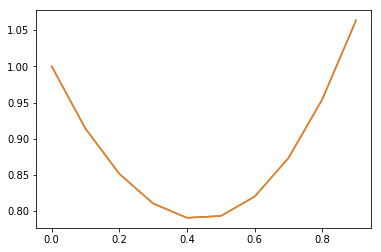

0.00034002002
0.00034001522
0.00034001042
0.00034000564
0.00034000084
0.00033999607
0.00033999127
0.00033998647
0.0003399817
0.0003399769
0.0003399721
0.00033996732
0.0003399625
0.00033995774
0.00033995294
0.00033994816
0.00033994336
0.00033993856
0.0003399338
0.00033992899
0.0003399242
0.0003399194
0.00033991464
0.00033990984
0.00033990503
0.00033990026
0.00033989546
0.00033989068
0.00033988588
0.0003398811
0.0003398763
0.00033987153
0.00033986673
0.00033986196
0.00033985716
0.00033985238
0.00033984758
0.0003398428
0.000339838
0.00033983323
0.00033982843
0.00033982366
0.0003398189
0.00033981408
0.0003398093
0.0003398045
0.00033979974
0.00033979493
0.00033979016
0.00033978536
0.00033978058
0.0003397758
0.00033977104
0.0003397663
0.0003397616
0.00033975707
0.00033975273
0.0003397489
0.00033974613
0.00033974554
0.0003397495
0.00033976286
0.0003397933
0.00033985323
0.0003399434
0.00034004508
0.00034010157
0.00034010524
0.00034010923
0.00034015003
0.00034019692
0.00034020713
0.00034020422


0.00033850112
0.00033849644
0.00033849175
0.00033848707
0.00033848238
0.0003384777
0.00033847304
0.00033846835
0.00033846367
0.00033845898
0.0003384543
0.0003384496
0.00033844492
0.0003384402
0.00033843552
0.0003384308
0.0003384261
0.0003384214
0.0003384167
0.00033841198
0.0003384073
0.00033840258
0.00033839786
0.00033839318
0.00033838846
0.00033838378
0.00033837906
0.00033837435
0.00033836966
0.00033836495
0.00033836026
0.00033835554
0.00033835083
0.00033834614
0.00033834143
0.00033833674
0.00033833203
0.00033832734
0.00033832263
0.0003383179
0.00033831323
0.0003383085
0.00033830383
0.0003382991
0.00033829443
0.0003382897
0.00033828503
0.0003382803
0.00033827563
0.0003382709
0.00033826623
0.0003382615
0.00033825682
0.0003382521
0.00033824742
0.0003382427
0.00033823802
0.0003382333
0.00033822862
0.0003382239
0.00033821922
0.0003382145
0.00033820982
0.00033820514
0.00033820042
0.00033819574
0.00033819102
0.00033818634
0.00033818162
0.00033817693
0.00033817225
0.00033816753
0.00033816285

0.00033572654
0.0003357219
0.00033571725
0.00033571263
0.000335708
0.00033570334
0.0003356987
0.00033569406
0.00033568943
0.00033568477
0.00033568015
0.00033567552
0.00033567086
0.00033566623
0.00033566158
0.00033565695
0.00033565232
0.00033564767
0.00033564304
0.0003356384
0.00033563375
0.00033562913
0.0003356245
0.00033561984
0.00033561522
0.0003356106
0.00033560593
0.0003356013
0.00033559668
0.00033559202
0.0003355874
0.00033558276
0.0003355781
0.00033557348
0.00033556885
0.0003355642
0.00033555957
0.00033555494
0.0003355503
0.00033554566
0.00033554103
0.0003355364
0.00033553175
0.00033552712
0.0003355225
0.00033551786
0.0003355132
0.00033550858
0.00033550395
0.00033549932
0.0003354947
0.00033549004
0.0003354854
0.00033548078
0.00033547616
0.00033547153
0.00033546687
0.00033546225
0.00033545762
0.000335453
0.00033544836
0.00033544374
0.00033543917
0.00033543468
0.00033543035
0.00033542636
0.0003354231
0.00033542138
0.00033542293
0.00033543128
0.0003354529
0.0003354992
0.0003355777
0

0.00033434827
0.0003343438
0.00033433933
0.00033433482
0.00033433028
0.0003343258
0.00033432132
0.0003343168
0.00033431227
0.00033430776
0.00033430324
0.0003342987
0.0003342942
0.00033428968
0.00033428517
0.00033428063
0.0003342761
0.00033427158
0.00033426704
0.0003342625
0.00033425796
0.00033425342
0.00033424888
0.00033424434
0.00033423983
0.0003342353


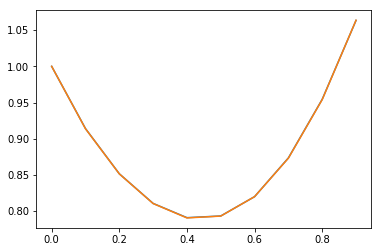

0.00033423075
0.0003342262
0.00033422167
0.00033421713
0.0003342126
0.00033420807
0.00033420353
0.000334199
0.00033419445
0.0003341899
0.00033418537
0.00033418086
0.00033417632
0.00033417178
0.00033416724
0.0003341627
0.0003341582
0.00033415365
0.0003341491
0.00033414457
0.00033414003
0.00033413552
0.00033413098
0.0003341264
0.00033412187
0.0003341173
0.00033411276
0.00033410822
0.00033410365
0.0003340991
0.00033409454
0.00033409
0.00033408543
0.0003340809
0.00033407632
0.00033407178
0.00033406724
0.00033406267
0.00033405813
0.00033405356
0.00033404902
0.00033404445
0.0003340399
0.00033403537
0.0003340308
0.00033402626
0.0003340217
0.00033401715
0.0003340126
0.00033400804
0.0003340035
0.00033399896
0.0003339944
0.00033398985
0.00033398528
0.00033398074
0.0003339762
0.00033397163
0.0003339671
0.00033396255
0.00033395799
0.00033395345
0.0003339489
0.00033394434
0.0003339398
0.00033393526
0.00033393071
0.00033392615
0.0003339216
0.00033391707
0.0003339125
0.00033390796
0.00033390342
0.000

0.00033225483
0.00033225035
0.00033224587
0.00033224135
0.00033223687
0.0003322324
0.00033222788
0.0003322234
0.00033221891
0.0003322144
0.00033220992
0.00033220544
0.00033220093
0.00033219645
0.00033219196
0.00033218748
0.00033218297
0.00033217843
0.00033217392
0.0003321694
0.0003321649
0.00033216042
0.0003321559
0.0003321514
0.00033214688
0.00033214237
0.00033213786
0.00033213335
0.00033212884
0.00033212433
0.00033211982
0.0003321153
0.0003321108
0.00033210628
0.00033210177
0.00033209726
0.00033209275
0.00033208824
0.00033208373
0.00033207922
0.0003320747
0.00033207022
0.0003320657
0.0003320612
0.0003320567
0.00033205218
0.00033204767
0.00033204316
0.00033203865
0.00033203413
0.00033202965
0.00033202514
0.00033202063
0.00033201612
0.0003320116
0.0003320071
0.0003320026
0.0003319981
0.0003319936
0.00033198908
0.00033198457
0.00033198006
0.00033197558
0.00033197107
0.00033196656
0.00033196204
0.00033195753
0.00033195302
0.00033194854
0.00033194403
0.00033193952
0.000331935
0.0003319305

0.0003302659
0.00033026145
0.000330257
0.00033025254
0.00033024812
0.00033024367
0.0003302392
0.00033023476
0.0003302303
0.00033022586
0.00033022143
0.00033021698
0.00033021253
0.00033020807
0.00033020362
0.0003301992
0.00033019474
0.0003301903
0.00033018584
0.00033018138
0.00033017696
0.0003301725
0.00033016806
0.0003301636
0.00033015918
0.00033015473
0.00033015027
0.00033014582
0.0003301414
0.00033013694
0.0003301325
0.00033012804
0.0003301236
0.00033011916
0.0003301147
0.00033011026
0.00033010583
0.00033010138
0.00033009693
0.0003300925
0.00033008805
0.0003300836
0.00033007917
0.00033007472
0.00033007027
0.00033006584
0.0003300614
0.00033005694
0.0003300525
0.00033004806
0.0003300436
0.00033003918
0.00033003473
0.00033003028
0.00033002585
0.0003300214
0.00033001695
0.00033001252
0.00033000807
0.00033000365
0.0003299992
0.00032999474
0.00032999032
0.00032998587
0.00032998144
0.000329977
0.00032997254
0.0003299681
0.00032996366
0.00032995924
0.00032995478
0.00032995036
0.0003299459
0.

0.0003285756
0.0003286459
0.0003286602
0.0003286582
0.00032868836
0.0003287353
0.00032875498
0.00032875087
0.00032876414
0.00032879197
0.00032880018
0.00032879654
0.0003288082
0.00032882355
0.0003288233
0.00032882148
0.00032883044
0.00032883574
0.00032883172
0.00032883263
0.00032883798
0.00032883656
0.00032883292
0.00032883458
0.00032883533
0.00032883132
0.00032882913
0.0003288295
0.00032882695
0.00032882285
0.00032882125
0.0003288196
0.00032881554
0.00032881205
0.00032880998
0.00032880667
0.00032880242
0.00032879927
0.0003287963
0.00032879214
0.00032878816
0.0003287849
0.00032878114
0.00032877683
0.00032877302
0.00032876938
0.0003287652
0.00032876097
0.00032875713
0.00032875314
0.00032874884
0.0003287447
0.00032874072
0.0003287365
0.0003287322
0.00032872806
0.00032872392
0.00032871962
0.00032871534
0.00032871118
0.00032870693
0.00032870262
0.00032869834
0.00032869412
0.0003286898
0.0003286855
0.00032868123
0.00032867695
0.0003286726
0.0003286683
0.00032866403
0.00032865972
0.000328655

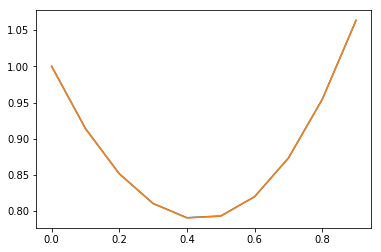

0.0003281682
0.00032816385
0.00032815948
0.00032815515
0.00032815078
0.00032814645
0.00032814208
0.00032813774
0.00032813338
0.00032812904
0.00032812468
0.00032812034
0.00032811597
0.00032811164
0.00032810727
0.00032810293
0.00032809857
0.00032809423
0.00032808987
0.00032808553
0.00032808117
0.00032807683
0.0003280725
0.00032806813
0.0003280638
0.00032805942
0.0003280551
0.00032805072
0.0003280464
0.00032804202
0.00032803768
0.00032803335
0.00032802898
0.00032802465
0.00032802028
0.00032801594
0.0003280116
0.00032800724
0.0003280029
0.00032799854
0.00032799417
0.0003279898
0.0003279854
0.00032798105
0.00032797668
0.00032797232
0.00032796795
0.0003279636
0.00032795922
0.00032795485
0.0003279505
0.00032794612
0.00032794176
0.0003279374
0.00032793303
0.00032792866
0.0003279243
0.00032791993
0.00032791556
0.0003279112
0.00032790683
0.00032790247
0.0003278981
0.00032789374
0.00032788937
0.000327885
0.00032788064
0.00032787627
0.0003278719
0.00032786754
0.00032786318
0.0003278588
0.000327854

0.0003262
0.00032619588
0.00032619582
0.00032619733
0.0003261943
0.00032619093
0.00032619076
0.00032618936
0.00032618525
0.00032618258
0.0003261813
0.00032617804
0.000326174
0.0003261715
0.00032616887
0.0003261648
0.00032616107
0.00032615825
0.00032615467
0.00032615045
0.0003261469
0.00032614355
0.00032613947
0.00032613537
0.00032613176
0.00032612795
0.00032612373
0.0003261197
0.00032611593
0.00032611185
0.00032610763
0.00032610365
0.00032609966
0.00032609547
0.00032609128
0.00032608723
0.00032608313
0.00032607888
0.00032607472
0.00032607059
0.0003260664
0.00032606217
0.00032605798
0.00032605382
0.0003260496
0.00032604535
0.00032604116
0.00032603697
0.00032603272
0.00032602847
0.00032602425
0.00032602003
0.00032601578
0.00032601156
0.00032600734
0.0003260031
0.00032599884
0.0003259946
0.00032599038
0.00032598613
0.00032598185
0.0003259776
0.00032597338
0.0003259691
0.00032596485
0.0003259606
0.00032595635
0.0003259521
0.00032594783
0.00032594358
0.00032593933
0.00032593508
0.0003259308

0.0003242664
0.0003242622
0.00032425797
0.00032425375
0.00032424953
0.0003242453
0.0003242411
0.00032423687
0.00032423265
0.00032422843
0.0003242242
0.00032422
0.00032421577
0.00032421155
0.00032420733
0.0003242031
0.0003241989
0.00032419467
0.00032419045
0.00032418623
0.000324182
0.0003241778
0.00032417357
0.00032416935
0.00032416513
0.0003241609
0.0003241567
0.00032415247
0.00032414825
0.00032414403
0.00032413978
0.00032413556
0.0003241313
0.00032412706
0.00032412284
0.0003241186
0.00032411437
0.00032411012
0.00032410587
0.00032410165
0.0003240974
0.00032409318
0.00032408893
0.00032408469
0.00032408047
0.00032407622
0.000324072
0.00032406775
0.0003240635
0.00032405928
0.00032405503
0.0003240508
0.00032404656
0.00032404234
0.0003240381
0.00032403387
0.00032402962
0.00032402537
0.00032402115
0.0003240169
0.00032401268
0.00032400843
0.0003240042
0.00032399996
0.00032399574
0.0003239915
0.00032398727
0.00032398303
0.0003239788
0.00032397456
0.00032397034
0.0003239661
0.00032396187
0.0003

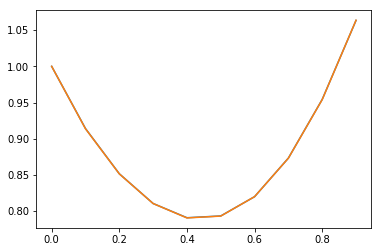

0.00032219104
0.00032218685
0.00032218266
0.0003221785
0.0003221743
0.00032217015
0.00032216596
0.0003221618
0.0003221576
0.0003221534
0.00032214925
0.00032214506
0.0003221409
0.0003221367
0.00032213255
0.00032212836
0.0003221242
0.00032212
0.00032211584
0.00032211165
0.0003221075
0.0003221033
0.00032209913
0.00032209494
0.00032209078
0.0003220866
0.00032208243
0.00032207824
0.00032207408
0.00032206989
0.00032206572
0.00032206153
0.00032205737
0.00032205318
0.00032204902
0.00032204483
0.00032204067
0.00032203647
0.0003220323
0.00032202812
0.000322024
0.00032201986
0.00032201575
0.00032201174
0.00032200792
0.00032200446
0.0003220018
0.0003220007
0.00032200286
0.00032201156
0.0003220324
0.0003220748
0.00032214326
0.00032223156
0.000322297
0.0003223152
0.00032231168
0.00032233214
0.00032237562
0.00032240013
0.00032239777
0.0003224033
0.00032242673
0.0003224405
0.00032243715
0.00032244148
0.00032245673
0.00032246194
0.00032245804
0.00032246203
0.00032246986
0.00032246875
0.00032246578
0.00

0.00032032735
0.00032032325
0.00032031912
0.000320315
0.0003203109
0.00032030678
0.00032030267
0.00032029857
0.00032029444
0.00032029033
0.00032028623
0.0003202821
0.000320278
0.0003202739
0.00032026976
0.00032026565
0.00032026155
0.00032025742
0.0003202533
0.0003202492
0.0003202451
0.00032024097
0.00032023687
0.00032023276
0.00032022863
0.00032022453
0.00032022042
0.00032021632
0.0003202122
0.00032020808
0.00032020398
0.00032019988
0.00032019574
0.00032019164
0.00032018754
0.00032018343
0.00032017933
0.0003201752
0.0003201711
0.000320167
0.0003201629
0.00032015875
0.00032015465
0.00032015055
0.00032014644
0.00032014234
0.0003201382
0.0003201341
0.00032013
0.0003201259
0.0003201218
0.0003201177
0.00032011356
0.00032010945
0.00032010535
0.00032010124
0.00032009714
0.00032009304
0.00032008893
0.0003200848
0.0003200807
0.0003200766
0.0003200725
0.0003200684
0.00032006428
0.00032006018
0.00032005605
0.00032005194
0.00032004784
0.00032004373
0.00032003963
0.00032003553
0.00032003142
0.00032

0.00031847515
0.00031848683
0.0003185134
0.00031856232
0.00031863913
0.00031872015
0.0003187712
0.00031877673
0.00031877746
0.00031880784
0.00031884745
0.00031886116
0.00031885738
0.00031886957
0.00031889306
0.0003188997
0.00031889614
0.00031890508
0.0003189184
0.0003189191
0.0003189163
0.0003189228
0.00031892848
0.00031892542
0.00031892426
0.0003189286
0.0003189289
0.00031892495
0.0003189246
0.00031892594
0.0003189233
0.00031891986
0.00031891937
0.00031891826
0.00031891448
0.00031891157
0.00031891026
0.00031890746
0.00031890353
0.00031890086
0.00031889853
0.00031889486
0.0003188911
0.00031888828
0.0003188851
0.00031888115
0.00031887757
0.0003188744
0.00031887073
0.00031886675
0.00031886323
0.00031885973
0.00031885583
0.0003188519
0.00031884827
0.00031884454
0.00031884052
0.00031883665
0.0003188329
0.00031882903
0.000318825
0.00031882114
0.0003188173
0.00031881334
0.00031880933
0.00031880543
0.00031880153
0.00031879754
0.00031879352
0.0003187896
0.00031878563
0.00031878162
0.0003187776

0.0003171164
0.00031711243
0.00031710844
0.00031710445
0.00031710046
0.00031709648
0.0003170925
0.0003170885
0.00031708452
0.00031708053
0.00031707654
0.00031707255
0.00031706857
0.00031706458


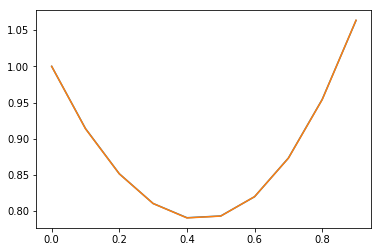

0.0003170606
0.0003170566
0.00031705262
0.00031704863
0.00031704464
0.00031704066
0.00031703667
0.00031703265
0.00031702867
0.00031702465
0.00031702063
0.00031701665
0.00031701263
0.00031700864
0.00031700463
0.0003170006
0.00031699662
0.0003169926
0.00031698862
0.0003169846
0.0003169806
0.0003169766
0.00031697258
0.0003169686
0.00031696458
0.0003169606
0.00031695658
0.00031695256
0.00031694857
0.00031694456
0.00031694057
0.00031693655
0.00031693256
0.00031692855
0.00031692456
0.00031692054
0.00031691656
0.00031691254
0.00031690855
0.00031690454
0.00031690055
0.00031689653
0.00031689252
0.00031688853
0.00031688454
0.00031688053
0.00031687654
0.00031687252
0.00031686854
0.00031686452
0.00031686053
0.00031685652
0.00031685253
0.0003168485
0.00031684453
0.0003168405
0.00031683652
0.0003168325
0.00031682852
0.0003168245
0.00031682051
0.00031681653
0.0003168125
0.00031680852
0.0003168045
0.00031680052
0.0003167965
0.00031679252
0.00031678853
0.0003167845
0.00031678053
0.0003167765
0.00031677

0.00031529224
0.00031528831
0.00031528441
0.00031528051
0.00031527661
0.0003152727
0.0003152688
0.0003152649
0.000315261
0.00031525706
0.00031525316
0.00031524926
0.00031524536
0.00031524146
0.00031523753
0.00031523363
0.00031522973
0.00031522583
0.00031522193
0.000315218
0.00031521407
0.00031521017
0.00031520624
0.0003152023
0.00031519838
0.00031519445
0.00031519053
0.00031518663
0.0003151827
0.00031517877
0.00031517484
0.0003151709
0.00031516698
0.00031516308
0.00031515915
0.00031515522
0.0003151513
0.00031514736
0.00031514346
0.00031513954
0.0003151356
0.00031513168
0.00031512778
0.00031512385
0.00031511992
0.000315116
0.00031511206
0.00031510816
0.00031510423
0.0003151003
0.00031509637
0.00031509247
0.00031508855
0.00031508462
0.0003150807
0.0003150768
0.00031507286
0.00031506893
0.000315065
0.0003150611
0.00031505717
0.00031505324
0.00031504934
0.0003150454
0.00031504149
0.00031503756
0.00031503366
0.00031502973
0.0003150258
0.0003150219
0.00031501797
0.00031501404
0.00031501014
0

0.0003135273
0.0003135234
0.00031351953
0.00031351563
0.00031351173
0.00031350783
0.00031350393
0.00031350006
0.00031349616
0.00031349226
0.00031348836
0.0003134845
0.0003134806
0.0003134767
0.0003134728
0.00031346892
0.00031346502
0.00031346112
0.00031345722
0.00031345335
0.00031344945
0.00031344555
0.00031344168
0.00031343778
0.00031343388
0.00031342998
0.0003134261
0.0003134222
0.0003134183
0.00031341444
0.00031341054
0.00031340664
0.00031340276
0.00031339886
0.00031339496
0.00031339106
0.0003133872
0.0003133833
0.0003133794
0.00031337552
0.00031337162
0.00031336772
0.00031336385
0.00031335995
0.00031335608
0.00031335218
0.00031334828
0.0003133444
0.0003133405
0.0003133366
0.00031333274
0.00031332884
0.00031332494
0.00031332107
0.00031331717
0.0003133133
0.0003133094
0.0003133055
0.00031330163
0.00031329773
0.00031329386
0.00031328996
0.00031328606
0.0003132822
0.0003132783
0.00031327442
0.00031327052
0.00031326665
0.00031326275
0.00031325885
0.00031325498
0.00031325108
0.0003132472

0.0003117534
0.00031175255
0.00031175485
0.00031176355
0.00031178407
0.0003118257
0.00031189233
0.00031197723
0.00031203835
0.0003120539
0.00031205095
0.00031207246
0.0003121144
0.00031213593
0.0003121331
0.00031214027
0.00031216323
0.0003121747
0.00031217127
0.00031217717
0.00031219184
0.00031219536
0.00031219202
0.00031219728
0.00031220424
0.0003122023
0.0003122004
0.0003122045
0.0003122059
0.00031220226
0.0003122015
0.00031220322
0.00031220115
0.00031219775
0.0003121973
0.00031219656
0.0003121931
0.0003121903
0.0003121892
0.0003121867
0.00031218296
0.0003121805
0.0003121784
0.00031217493
0.0003121714


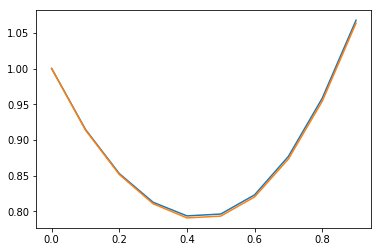

0.00031216882
0.00031216588
0.00031216213
0.00031215878
0.00031215587
0.00031215235
0.00031214862
0.00031214533
0.00031214205
0.00031213832
0.00031213465
0.00031213128
0.00031212773
0.00031212394
0.0003121203
0.00031211678
0.00031211306
0.00031210927
0.00031210564
0.00031210203
0.00031209824
0.0003120945
0.00031209082
0.0003120871
0.0003120833
0.00031207956
0.00031207583
0.00031207208
0.00031206827
0.0003120645
0.00031206076
0.00031205697
0.00031205316
0.0003120494
0.00031204565
0.00031204184
0.00031203806
0.00031203427
0.0003120305
0.00031202668
0.00031202286
0.00031201908
0.0003120153
0.0003120115
0.0003120077
0.00031200392
0.0003120001
0.00031199632
0.0003119925
0.0003119887
0.0003119849
0.0003119811
0.00031197732
0.0003119735
0.0003119697
0.0003119659
0.0003119621
0.00031195828
0.0003119545
0.0003119507
0.0003119469
0.0003119431
0.00031193928
0.0003119355
0.00031193168
0.0003119279
0.0003119241
0.0003119203
0.0003119165
0.00031191268
0.0003119089
0.00031190508
0.0003119013
0.000311

0.00030996112
0.00030995734
0.00030995358
0.0003099498
0.00030994602
0.00030994223
0.00030993845
0.00030993466
0.00030993088
0.0003099271
0.0003099233
0.00030991953
0.00030991575
0.00030991196
0.00030990818
0.0003099044
0.00030990064
0.00030989686
0.00030989308
0.0003098893
0.0003098855
0.00030988173
0.00030987794
0.00030987416
0.00030987037
0.0003098666
0.00030986284
0.00030985905
0.00030985527
0.0003098515
0.0003098477
0.00030984392
0.00030984014
0.00030983638
0.0003098326
0.0003098288
0.00030982503
0.00030982125
0.00030981746
0.00030981368
0.00030980993
0.00030980614
0.00030980236
0.00030979858
0.0003097948
0.00030979104
0.00030978725
0.00030978347
0.0003097797
0.0003097759
0.00030977215
0.00030976837
0.00030976458
0.0003097608
0.00030975702
0.00030975326
0.00030974948
0.0003097457
0.0003097419
0.00030973813
0.00030973437
0.0003097306
0.0003097268
0.00030972302
0.00030971927
0.00030971548
0.0003097117
0.00030970792
0.00030970416
0.00030970038
0.0003096966
0.0003096928
0.00030968906


0.00030884313
0.00030883963
0.0003088361
0.00030883244
0.0003088288
0.00030882529
0.00030882168
0.000308818
0.00030881437
0.00030881076
0.00030880712
0.00030880343
0.00030879976
0.00030879612
0.00030879246
0.00030878876
0.0003087851
0.00030878145
0.00030877776
0.00030877406
0.0003087704
0.00030876673
0.00030876303
0.0003087593
0.00030875564
0.00030875194
0.00030874825
0.00030874455
0.00030874085
0.00030873716
0.00030873346
0.00030872977
0.00030872607
0.00030872237
0.00030871868
0.00030871498
0.00030871126
0.00030870756
0.00030870386
0.00030870017
0.00030869647
0.00030869278
0.00030868908
0.00030868538
0.0003086817
0.00030867796
0.00030867427
0.00030867057
0.00030866687
0.00030866318
0.00030865948
0.00030865576
0.00030865206
0.00030864836
0.00030864464
0.00030864094
0.00030863722
0.0003086335
0.0003086298
0.00030862607
0.00030862234
0.00030861865
0.00030861492
0.0003086112
0.00030860747
0.00030860378
0.00030860005
0.00030859633
0.00030859263
0.0003085889
0.00030858518
0.00030858148
0.00

0.00030707664
0.00030707297
0.00030706928
0.00030706558
0.00030706188
0.0003070582
0.00030705452
0.00030705082
0.00030704713
0.00030704343
0.00030703977
0.00030703607
0.00030703237
0.00030702868
0.00030702498
0.0003070213
0.00030701762
0.00030701392
0.00030701022
0.00030700656
0.00030700286
0.00030699917
0.00030699547
0.0003069918
0.0003069881
0.0003069844
0.00030698074
0.00030697705
0.00030697335
0.00030696965
0.000306966
0.0003069623
0.0003069586


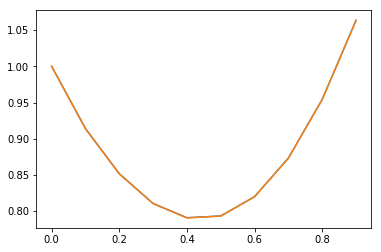

0.00030695493
0.00030695123
0.00030694754
0.00030694387
0.00030694017
0.00030693648
0.00030693278
0.0003069291
0.00030692542
0.00030692172
0.00030691805
0.00030691436
0.00030691066
0.000306907
0.0003069033
0.0003068996
0.00030689593
0.00030689224
0.00030688854
0.00030688487
0.00030688118
0.0003068775
0.00030687382
0.00030687012
0.00030686645
0.00030686276
0.00030685906
0.0003068554
0.0003068517
0.00030684803
0.00030684433
0.00030684064
0.00030683697
0.00030683327
0.0003068296
0.0003068259
0.0003068222
0.00030681855
0.00030681485
0.00030681118
0.0003068075
0.0003068038
0.00030680012
0.00030679643
0.00030679276
0.00030678906
0.0003067854
0.0003067817
0.00030677803
0.00030677434
0.00030677064
0.00030676697
0.00030676328
0.0003067596
0.00030675592
0.00030675225
0.00030674855
0.00030674489
0.0003067412
0.00030673752
0.00030673383
0.00030673016
0.00030672646
0.0003067228
0.0003067191
0.00030671543
0.00030671174
0.00030670807
0.00030670437
0.0003067007
0.000306697
0.00030669334
0.00030668965


0.00030536234
0.00030535873
0.00030535512
0.00030535148
0.00030534787
0.00030534426
0.00030534065
0.00030533702
0.0003053334
0.0003053298
0.0003053262
0.00030532258
0.00030531894
0.00030531533
0.00030531173
0.00030530812
0.00030530448
0.00030530087
0.00030529726
0.00030529365
0.00030529004
0.0003052864
0.0003052828
0.0003052792
0.00030527558
0.00030527197
0.00030526833
0.00030526472
0.0003052611
0.0003052575
0.0003052539
0.00030525026
0.00030524665
0.00030524304
0.00030523943
0.00030523582
0.0003052322
0.00030522858
0.00030522497
0.00030522136
0.00030521775
0.00030521414
0.00030521053
0.00030520692
0.00030520328
0.00030519965
0.000305196
0.0003051924
0.00030518876
0.00030518512
0.0003051815
0.00030517788
0.00030517424
0.0003051706
0.00030516696
0.00030516335
0.00030515972
0.00030515608
0.00030515244
0.00030514883
0.0003051452
0.00030514156
0.00030513795
0.0003051343
0.00030513067
0.00030512703
0.00030512342
0.0003051198
0.00030511615
0.00030511254
0.0003051089
0.00030510526
0.000305101

0.00030374757
0.000303744
0.0003037404
0.0003037368
0.00030373322
0.00030372964
0.00030372606
0.00030372245
0.00030371887
0.0003037153
0.00030371168
0.0003037081
0.00030370452
0.00030370094
0.00030369734
0.00030369376
0.00030369018
0.00030368657
0.000303683
0.0003036794
0.00030367583
0.00030367222
0.00030366864
0.00030366506
0.00030366148
0.00030365787
0.0003036543
0.0003036507
0.00030364713
0.00030364352
0.00030363994
0.00030363636
0.00030363278
0.00030362917
0.0003036256
0.00030362202
0.00030361844
0.00030361486
0.00030361125
0.00030360767
0.0003036041
0.0003036005
0.00030359693
0.00030359332
0.00030358974
0.00030358616
0.00030358258
0.000303579
0.0003035754
0.0003035718
0.00030356823
0.00030356465
0.00030356107
0.0003035575
0.00030355388
0.0003035503
0.00030354672
0.00030354314
0.00030353956
0.00030353598
0.0003035324
0.0003035288
0.00030352522
0.00030352164
0.00030351806
0.00030351448
0.0003035109
0.00030350732
0.00030350374
0.00030350013
0.00030349655
0.00030349297
0.0003034894
0.

0.00030263688
0.0003026334
0.0003026299
0.00030262637
0.00030262285
0.00030261936
0.00030261587
0.00030261237
0.00030260885
0.00030260533
0.00030260184
0.00030259832
0.0003025948
0.0003025913
0.00030258778
0.00030258426
0.00030258077
0.00030257725
0.00030257372
0.00030257023
0.0003025667


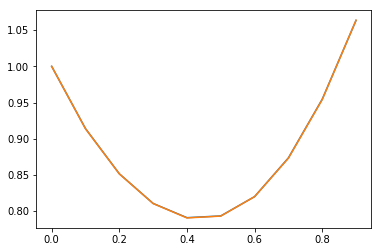

0.0003025632
0.0003025597
0.00030255617
0.00030255265
0.00030254916
0.00030254564
0.00030254215
0.00030253862
0.0003025351
0.0003025316
0.0003025281
0.00030252457
0.00030252105
0.0003025175
0.00030251397
0.00030251045
0.00030250693
0.0003025034
0.00030249986
0.00030249634
0.00030249282
0.0003024893
0.00030248574
0.00030248222
0.0003024787
0.00030247518
0.00030247166
0.00030246814
0.00030246458
0.00030246106
0.00030245754
0.00030245402
0.0003024505
0.00030244695
0.00030244343
0.0003024399
0.00030243638
0.00030243286
0.00030242934
0.0003024258
0.00030242227
0.00030241875
0.00030241522
0.0003024117
0.00030240818
0.00030240466
0.00030240114
0.0003023976
0.00030239407
0.00030239054
0.00030238702
0.0003023835
0.00030237998
0.00030237646
0.00030237294
0.0003023694
0.00030236586
0.00030236234
0.00030235882
0.0003023553
0.00030235178
0.00030234826
0.00030234474
0.0003023412
0.0003023377
0.00030233417
0.00030233062
0.0003023271
0.00030232358
0.00030232006
0.00030231653
0.000302313
0.0003023095
0

0.00030057758
0.0003005741
0.0003005706
0.0003005671
0.0003005636
0.00030056012
0.00030055663
0.00030055313
0.00030054964
0.00030054615
0.00030054266
0.00030053916
0.00030053567
0.00030053218
0.00030052869
0.0003005252
0.0003005217
0.0003005182
0.00030051472
0.00030051122
0.00030050773
0.00030050424
0.00030050075
0.00030049725
0.00030049376
0.00030049027
0.00030048678
0.00030048328
0.0003004798
0.0003004763
0.0003004728
0.0003004693
0.00030046585
0.00030046236
0.00030045887
0.00030045537
0.00030045188
0.0003004484
0.0003004449
0.0003004414
0.0003004379
0.00030043442
0.00030043093
0.00030042743
0.00030042394
0.00030042048
0.00030041698
0.0003004135
0.00030041
0.0003004065
0.00030040301
0.00030039952
0.00030039606
0.0003003926
0.00030038916
0.00030038581
0.0003003826
0.0003003797
0.00030037746
0.00030037656
0.00030037845
0.00030038596
0.0003004046
0.00030044164
0.0003005058
0.0003005847
0.0003006495
0.0003006674
0.0003006645
0.00030068465
0.00030072418
0.00030074612
0.00030074373
0.00030

0.00029912707
0.0002991236
0.00029912018
0.00029911674
0.00029911328
0.00029910984
0.00029910638
0.00029910295
0.0002990995
0.00029909605
0.00029909262
0.00029908918
0.00029908572
0.00029908228
0.00029907882
0.0002990754
0.00029907195
0.0002990685
0.00029906505
0.00029906162
0.00029905816
0.00029905472
0.0002990513
0.00029904782
0.0002990444
0.00029904096
0.0002990375
0.00029903406
0.00029903062
0.00029902716
0.00029902373
0.0002990203
0.00029901683
0.0002990134
0.00029900996
0.00029900653
0.00029900306
0.00029899963
0.0002989962
0.00029899273
0.0002989893
0.00029898586
0.0002989824
0.00029897896
0.00029897553
0.0002989721
0.00029896863
0.0002989652
0.00029896176
0.00029895833
0.00029895487
0.00029895143
0.000298948
0.00029894456
0.0002989411
0.00029893767
0.00029893423
0.0002989308
0.00029892733
0.0002989239
0.00029892047
0.00029891703
0.00029891357
0.00029891013
0.0002989067
0.00029890327
0.0002988998
0.00029889637
0.00029889293
0.0002988895
0.00029888607
0.0002988826
0.00029887917
0

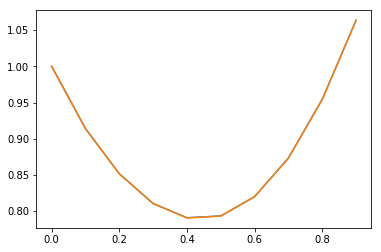

0.00029788507
0.0002978817
0.0002978783
0.0002978749
0.0002978715
0.0002978681
0.00029786472
0.00029786132
0.00029785794
0.00029785454
0.00029785116
0.00029784776
0.00029784438
0.00029784098
0.00029783757
0.0002978342
0.0002978308
0.0002978274
0.000297824
0.0002978206
0.00029781717
0.00029781373
0.0002978103
0.0002978069
0.00029780346
0.00029780003
0.0002977966
0.0002977932
0.00029778975
0.00029778632
0.0002977829
0.00029777948
0.00029777605
0.0002977726
0.0002977692
0.00029776577
0.00029776234
0.00029775893
0.0002977555
0.00029775206
0.00029774866
0.00029774522
0.0002977418
0.00029773838
0.00029773495
0.00029773152
0.0002977281
0.00029772468
0.00029772124
0.00029771784
0.0002977144
0.00029771097
0.00029770756
0.00029770413
0.0002977007
0.0002976973
0.00029769386
0.00029769042
0.00029768702
0.00029768358
0.00029768015
0.00029767674
0.0002976733
0.0002976699
0.00029766647
0.00029766303
0.00029765963
0.0002976562
0.00029765276
0.00029764936
0.00029764592
0.00029764252
0.00029763908
0.000

0.00029689205
0.0002968889
0.00029688558
0.00029688247
0.0002968794
0.00029687618
0.0002968729
0.00029686975
0.00029686655
0.00029686323
0.00029685994
0.00029685674
0.00029685348
0.00029685016
0.00029684688
0.00029684362
0.00029684033
0.000296837
0.0002968337
0.0002968304
0.0002968271
0.00029682377
0.00029682045
0.00029681716
0.00029681384
0.00029681053
0.0002968072
0.0002968039
0.00029680057
0.00029679723
0.0002967939
0.0002967906
0.00029678727
0.00029678392
0.0002967806
0.0002967773
0.00029677397
0.0002967706
0.00029676728
0.00029676396
0.0002967606
0.00029675727
0.00029675392
0.00029675057
0.00029674722
0.00029674388
0.00029674053
0.00029673715
0.0002967338
0.00029673046
0.0002967271
0.00029672374
0.0002967204
0.00029671704
0.0002967137
0.00029671035
0.00029670697
0.00029670363
0.00029670028
0.00029669693
0.00029669356
0.0002966902
0.00029668686
0.00029668352
0.00029668017
0.0002966768
0.00029667345
0.0002966701
0.00029666675
0.0002966634
0.00029666003
0.00029665668
0.00029665334
0.

0.00029537635
0.00029537303
0.0002953697
0.0002953664
0.00029536308
0.00029535976
0.00029535647
0.00029535315
0.00029534983
0.00029534652
0.0002953432
0.00029533988
0.00029533656
0.00029533324
0.00029532993
0.0002953266
0.0002953233
0.00029531997
0.00029531665
0.00029531334
0.00029531005
0.00029530673
0.0002953034
0.0002953001
0.00029529678
0.00029529346
0.00029529014
0.00029528682
0.0002952835
0.0002952802
0.0002952769
0.00029527358
0.00029527026
0.00029526695
0.00029526363
0.0002952603
0.000295257
0.00029525367
0.0002952504
0.00029524707
0.00029524375
0.00029524043
0.0002952371
0.0002952338
0.00029523048
0.0002952272
0.00029522387
0.00029522055
0.00029521724
0.00029521392
0.0002952106
0.0002952073
0.000295204
0.00029520068
0.00029519736
0.00029519404
0.00029519072
0.00029518743
0.00029518412
0.0002951808
0.00029517748
0.00029517416
0.00029517087
0.00029516756
0.00029516424
0.00029516092
0.0002951576
0.0002951543
0.000295151
0.00029514768
0.00029514436
0.00029514104
0.00029513775
0.00

0.000293965
0.00029396173
0.00029395844
0.00029395518
0.0002939519
0.00029394863
0.00029394534
0.00029394208
0.00029393882
0.00029393553
0.00029393227
0.00029392898
0.00029392572
0.00029392244
0.00029391918
0.00029391592
0.00029391263
0.00029390937
0.00029390608
0.00029390282
0.00029389956
0.00029389627
0.000293893
0.00029388972
0.00029388646
0.0002938832
0.00029387992
0.00029387666
0.00029387337
0.0002938701
0.00029386685
0.00029386356
0.0002938603
0.00029385704
0.00029385375
0.0002938505
0.0002938472
0.00029384394
0.00029384068
0.0002938374
0.00029383413
0.00029383088
0.0002938276
0.00029382433
0.00029382107


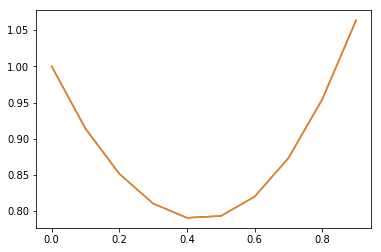

0.00029381778
0.00029381452
0.00029381126
0.00029380797
0.0002938047
0.00029380145
0.00029379816
0.0002937949
0.00029379164
0.00029378835
0.0002937851
0.00029378184
0.00029377855
0.0002937753
0.00029377203
0.00029376877
0.00029376548
0.00029376222
0.00029375896
0.00029375567
0.0002937524
0.00029374915
0.0002937459
0.0002937426
0.00029373934
0.00029373608
0.0002937328
0.00029372954
0.00029372628
0.00029372302
0.00029371973
0.00029371647
0.0002937132
0.00029370995
0.00029370666
0.0002937034
0.00029370014
0.00029369688
0.0002936936
0.00029369033
0.00029368707
0.0002936838
0.00029368052
0.00029367727
0.000293674
0.00029367075
0.0002936675
0.0002936642
0.00029366094
0.00029365768
0.00029365442
0.00029365113
0.00029364787
0.0002936446
0.00029364135
0.0002936381
0.0002936348
0.00029363154
0.00029362828
0.00029362502
0.00029362176
0.00029361848
0.00029361522
0.00029361196
0.0002936087
0.00029360544
0.00029360218
0.0002935989
0.00029359563
0.00029359237
0.0002935891
0.00029358585
0.0002935826
0

0.0002924541
0.00029245537
0.00029245362
0.00029245068
0.00029245016
0.00029244955
0.0002924467
0.00029244414
0.00029244306
0.00029244108
0.0002924379
0.0002924356
0.00029243383
0.00029243104
0.00029242795
0.00029242563
0.00029242324
0.00029242013
0.0002924172
0.00029241468
0.00029241186
0.0002924087
0.00029240575
0.000292403
0.00029239996
0.0002923968
0.00029239384
0.00029239093
0.0002923878
0.00029238462
0.00029238165
0.0002923786
0.0002923754
0.00029237228
0.00029236922
0.0002923661
0.0002923629
0.00029235976
0.00029235668
0.0002923535
0.0002923503
0.00029234716
0.00029234402
0.00029234082
0.00029233762
0.00029233447
0.00029233133
0.00029232813
0.00029232493
0.00029232175
0.00029231855
0.00029231538
0.00029231218
0.00029230898
0.0002923058
0.0002923026
0.00029229943
0.00029229623
0.00029229306
0.00029228986
0.00029228666
0.00029228348
0.00029228028
0.00029227708
0.00029227385
0.00029227065
0.00029226748
0.00029226425
0.00029226101
0.0002922578
0.00029225458
0.00029225135
0.000292248

0.00029104587
0.0002910427
0.0002910395
0.0002910363
0.00029103312
0.00029102992
0.00029102675
0.00029102355
0.00029102035
0.00029101718
0.00029101397
0.0002910108
0.0002910076
0.00029100443
0.00029100123
0.00029099802
0.00029099485
0.00029099165
0.00029098848
0.00029098528
0.0002909821
0.0002909789
0.00029097573
0.00029097253
0.00029096933
0.00029096616
0.00029096295
0.00029095978
0.00029095658
0.0002909534
0.0002909502
0.00029094703
0.00029094383
0.00029094066
0.00029093746
0.0002909343
0.0002909311
0.0002909279
0.0002909247
0.00029092154
0.00029091834
0.00029091517
0.00029091196
0.0002909088
0.0002909056
0.00029090242
0.00029089922
0.00029089605
0.00029089284
0.00029088967
0.00029088647
0.0002908833
0.0002908801
0.00029087692
0.00029087372
0.00029087055
0.00029086738
0.00029086418
0.000290861
0.0002908578
0.00029085463
0.00029085143
0.00029084826
0.00029084506
0.00029084188
0.00029083868
0.0002908355
0.00029083234
0.00029082914
0.00029082596
0.00029082276
0.0002908196
0.0002908164
0

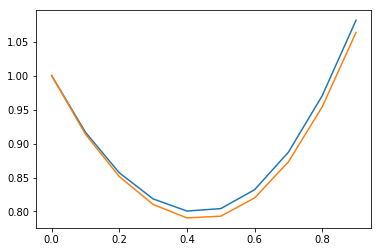

0.00028989918
0.00028990165
0.00028989953
0.00028990646
0.0002899124
0.00028990995
0.00028991027
0.0002899151
0.00028991507
0.00028991228
0.0002899137
0.00028991495
0.00028991222
0.0002899107
0.00028991146
0.00028990986
0.00028990695
0.0002899061
0.00028990515
0.00028990227
0.00028989994
0.0002898987
0.0002898963
0.0002898933
0.00028989126
0.0002898892
0.00028988617
0.00028988344
0.00028988122
0.0002898785
0.0002898754
0.00028987278
0.00028987022
0.00028986717
0.0002898642
0.00028986152
0.00028985858
0.00028985547
0.00028985259
0.00028984973
0.00028984668
0.0002898436
0.00028984065
0.00028983768
0.00028983457
0.0002898315
0.00028982855
0.00028982546
0.00028982235
0.0002898193
0.00028981623
0.00028981312
0.00028981004
0.00028980698
0.0002898039
0.00028980078
0.0002897977
0.00028979464
0.00028979153
0.00028978838
0.00028978533
0.00028978218
0.00028977907
0.00028977596
0.00028977284
0.00028976973
0.0002897666
0.0002897635
0.00028976038
0.00028975727
0.00028975416
0.00028975104
0.000289747

0.0002886194
0.00028861628
0.00028861317
0.00028861006
0.0002886069
0.0002886038
0.00028860068
0.00028859757
0.00028859446
0.00028859134
0.00028858823
0.0002885851
0.000288582
0.00028857886
0.00028857574
0.00028857263
0.0002885695
0.0002885664
0.0002885633
0.00028856017
0.00028855706
0.00028855394
0.00028855083
0.0002885477
0.00028854457
0.00028854146
0.00028853834
0.00028853523
0.00028853212
0.000288529
0.0002885259
0.00028852277
0.00028851966
0.00028851654
0.00028851343
0.00028851032
0.0002885072
0.00028850406
0.00028850095
0.00028849783
0.00028849472
0.0002884916
0.0002884885
0.00028848537
0.00028848226
0.00028847915
0.00028847603
0.00028847292
0.0002884698
0.0002884667
0.00028846358
0.00028846046
0.00028845735
0.00028845423
0.00028845112
0.000288448
0.0002884449
0.00028844178
0.00028843866
0.00028843555
0.00028843243
0.00028842932
0.0002884262
0.0002884231
0.00028841998
0.00028841686
0.00028841375
0.00028841064
0.00028840752
0.0002884044
0.0002884013
0.00028839818
0.00028839507
0.0

0.00028694226
0.00028693918
0.00028693606
0.00028693295
0.00028692983
0.00028692672
0.0002869236
0.00028692052
0.0002869174
0.0002869143
0.00028691118
0.00028690806
0.00028690498
0.00028690186
0.00028689875
0.00028689567
0.0002868926
0.00028688952
0.00028688644
0.00028688344
0.0002868805
0.00028687774
0.00028687526
0.00028687346
0.00028687302
0.0002868753
0.00028688315
0.00028690108
0.0002869369
0.00028699354
0.00028706534
0.00028711694
0.00028713048
0.000287128
0.00028714552
0.00028718065
0.0002871996
0.00028719762
0.0002872029
0.00028722198
0.0002872324
0.00028722975
0.00028723406
0.00028724637
0.00028725012
0.0002872473
0.00028725126
0.00028725746
0.00028725638
0.00028725457
0.00028725786
0.00028725964
0.00028725681
0.00028725594
0.0002872575
0.00028725623
0.0002872534
0.00028725291
0.00028725262
0.00028724998
0.00028724756
0.00028724666
0.00028724488
0.0002872419
0.0002872398
0.00028723822
0.0002872356
0.0002872327
0.00028723056
0.00028722832
0.00028722535
0.00028722262
0.000287220

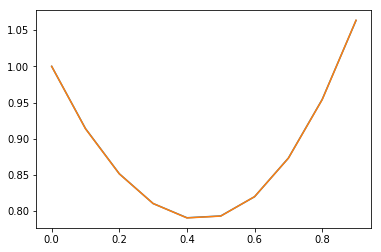

0.0002858272
0.00028582418
0.00028582112
0.0002858181
0.00028581507
0.000285812
0.000285809
0.00028580593
0.0002858029
0.00028579985
0.00028579682
0.00028579377
0.00028579074
0.00028578768
0.00028578466
0.00028578163
0.00028577857
0.00028577555
0.0002857725
0.00028576946
0.0002857664
0.00028576338
0.00028576035
0.0002857573
0.00028575427
0.00028575122
0.0002857482
0.00028574516
0.0002857421
0.00028573908
0.00028573602
0.000285733
0.00028572997
0.0002857269
0.0002857239
0.00028572083
0.0002857178
0.00028571478
0.00028571172
0.0002857087
0.00028570564
0.0002857026
0.00028569959
0.00028569653
0.0002856935
0.00028569048
0.00028568742
0.0002856844
0.00028568134
0.0002856783
0.00028567528
0.00028567223
0.0002856692
0.00028566617
0.00028566312
0.0002856601
0.00028565706
0.000285654
0.00028565098
0.00028564796
0.0002856449
0.00028564187
0.00028563885
0.0002856358
0.00028563276
0.00028562974
0.00028562668
0.00028562365
0.00028562063
0.00028561757
0.00028561454
0.00028561152
0.0002856085
0.00028

0.00028460714
0.00028460415
0.00028460118
0.0002845982
0.0002845952
0.00028459218
0.00028458922
0.00028458625
0.00028458325
0.00028458025
0.00028457725
0.00028457426
0.00028457123
0.00028456823
0.00028456523
0.00028456224
0.00028455924
0.00028455624
0.0002845532
0.00028455022
0.00028454722
0.00028454422
0.00028454122
0.00028453823
0.00028453523
0.0002845322
0.0002845292
0.0002845262
0.0002845232
0.0002845202
0.0002845172
0.00028451422
0.00028451122
0.0002845082
0.0002845052
0.0002845022
0.0002844992
0.0002844962
0.0002844932
0.0002844902
0.0002844872
0.0002844842
0.00028448118
0.00028447818
0.0002844752
0.0002844722
0.0002844692
0.0002844662
0.0002844632
0.0002844602
0.0002844572
0.0002844542
0.0002844512
0.00028444818
0.00028444518
0.00028444218
0.0002844392
0.0002844362
0.0002844332
0.0002844302
0.0002844272
0.0002844242
0.0002844212
0.0002844182
0.0002844152
0.0002844122
0.0002844092
0.0002844062
0.0002844032
0.00028440022
0.00028439722
0.00028439422
0.0002843912
0.0002843882
0.0002

0.00028288542
0.00028288242
0.00028287942
0.00028287643
0.00028287346
0.00028287046
0.00028286746
0.00028286446
0.00028286147
0.00028285847
0.00028285547
0.0002828525
0.0002828495
0.0002828465
0.0002828435
0.0002828405
0.0002828375
0.00028283455
0.00028283155
0.00028282855
0.00028282555
0.00028282256
0.0002828196
0.0002828166
0.0002828136
0.0002828106
0.0002828076
0.0002828046
0.00028280163
0.00028279863
0.00028279563
0.00028279267
0.00028278973
0.00028278676
0.00028278385
0.00028278097
0.00028277823
0.00028277579
0.0002827739
0.00028277322
0.00028277523
0.0002827826
0.00028280105
0.00028283807
0.00028290274
0.00028298076
0.00028304118
0.0002830543
0.0002830533
0.00028307966
0.0002831186
0.0002831331
0.00028313044
0.00028314473
0.0002831675
0.0002831714
0.0002831706
0.00028318402
0.00028319462
0.0002831926
0.000283195
0.00028320408
0.00028320536
0.00028320318
0.00028320766
0.00028321077
0.00028320812
0.0002832083
0.0002832111
0.00028320964
0.00028320742
0.00028320844
0.00028320804
0.00

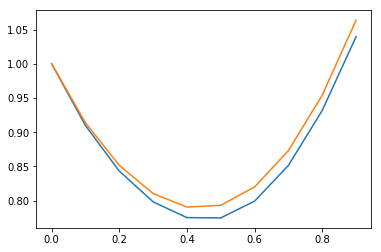

0.0002822178
0.00028225535
0.0002822664
0.0002822642
0.0002822796
0.00028229988
0.0002823024
0.00028230197
0.00028231466
0.00028232438
0.00028232235
0.00028232453
0.0002823331
0.00028233425
0.000282332
0.00028233603
0.00028233894
0.0002823364
0.00028233614
0.0002823386
0.00028233734
0.00028233492
0.00028233553
0.00028233524
0.0002823325
0.0002823311
0.00028233085
0.00028232863
0.00028232604
0.00028232488
0.0002823232
0.00028232034
0.00028231824
0.00028231659
0.00028231394
0.00028231123
0.0002823092
0.00028230684
0.00028230398
0.00028230148
0.00028229918
0.0002822964
0.0002822936
0.0002822911
0.00028228847
0.00028228556
0.00028228285
0.00028228023
0.00028227738
0.00028227453
0.00028227182
0.00028226903
0.00028226615
0.00028226333
0.00028226056
0.00028225768
0.00028225477
0.00028225197
0.00028224912
0.00028224624
0.00028224336
0.0002822405
0.00028223766
0.00028223475
0.00028223186
0.000282229
0.0002822261
0.0002822232
0.00028222034
0.00028221743
0.00028221452
0.0002822116
0.00028220873
0

0.00028113308
0.0002811302
0.0002811273
0.00028112438
0.00028112147
0.00028111855
0.00028111564
0.00028111273
0.00028110982
0.00028110694
0.00028110403
0.00028110112
0.0002810982
0.0002810953
0.0002810924
0.00028108948
0.0002810866
0.0002810837
0.00028108078
0.00028107787
0.00028107496
0.00028107205
0.00028106917
0.00028106626
0.00028106335
0.00028106043
0.00028105752
0.00028105464
0.00028105173
0.00028104882
0.0002810459
0.000281043
0.0002810401
0.0002810372
0.0002810343
0.0002810314
0.00028102848
0.00028102557
0.0002810227
0.00028101978
0.00028101687
0.00028101396
0.00028101105
0.00028100816
0.00028100525
0.00028100234
0.00028099943
0.00028099655
0.00028099364
0.00028099073
0.00028098782
0.0002809849
0.00028098203
0.00028097912
0.0002809762
0.0002809733
0.00028097042
0.0002809675
0.0002809646
0.00028096169
0.0002809588
0.0002809559
0.00028095298
0.00028095007
0.0002809472
0.00028094428
0.00028094137
0.00028093846
0.00028093558
0.00028093267
0.00028092976
0.00028092688
0.00028092397
0

0.00027960012
0.0002795972
0.0002795943
0.00027959142
0.0002795885
0.0002795856
0.00027958272
0.0002795798
0.0002795769
0.00027957401
0.0002795711
0.0002795682
0.0002795653
0.0002795624
0.0002795595
0.0002795566
0.0002795537
0.0002795508
0.0002795479
0.000279545
0.0002795421
0.0002795392
0.0002795363
0.0002795334
0.0002795305
0.0002795276
0.00027952468
0.0002795218
0.0002795189
0.000279516
0.0002795131
0.0002795102
0.00027950734
0.00027950446
0.0002795016
0.00027949878
0.00027949605
0.00027949348
0.00027949124
0.00027948976
0.00027948976
0.000279493
0.0002795025
0.0002795245
0.00027956572
0.0002796322
0.00027970297
0.0002797476
0.00027975213
0.00027975457
0.00027978406
0.00027981753
0.00027982585
0.0002798241
0.00027983947
0.0002798587
0.00027986043
0.00027986034
0.00027987288
0.00027988176
0.00027987963
0.00027988176
0.0002798898
0.0002798909
0.00027988863
0.00027989218
0.0002798953
0.0002798929
0.00027989227
0.00027989465
0.0002798937
0.00027989116
0.00027989145
0.00027989142
0.00027

0.0002788175
0.00027881464
0.00027881179
0.00027880896
0.0002788061
0.00027880326
0.00027880043
0.00027879758
0.00027879473
0.0002787919
0.00027878906
0.0002787862
0.00027878338
0.00027878053
0.0002787777
0.00027877485
0.000278772
0.00027876918
0.00027876633
0.00027876347
0.00027876065
0.0002787578
0.00027875497
0.00027875212
0.00027874927
0.00027874645
0.0002787436
0.00027874077
0.00027873792
0.00027873507
0.00027873224
0.0002787294
0.00027872657
0.00027872372
0.00027872087
0.00027871804
0.0002787152
0.00027871237
0.0002787095
0.00027870666
0.00027870384
0.000278701
0.00027869816
0.0002786953
0.0002786925
0.00027868964
0.00027868678
0.00027868396
0.0002786811
0.0002786783
0.00027867543
0.0002786726


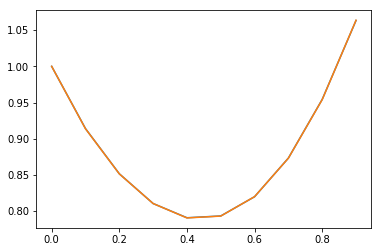

0.00027866976
0.00027866694
0.00027866408
0.00027866123
0.0002786584
0.00027865556
0.00027865273
0.00027864988
0.00027864706
0.0002786442
0.00027864138
0.00027863853
0.0002786357
0.00027863286
0.00027863003
0.00027862718
0.00027862433
0.0002786215
0.00027861865
0.00027861583
0.00027861298
0.00027861015
0.0002786073
0.00027860448
0.00027860163
0.0002785988
0.00027859595
0.00027859313
0.00027859028
0.00027858745
0.0002785846
0.00027858178
0.00027857893
0.0002785761
0.00027857325
0.00027857043
0.00027856758
0.00027856475
0.0002785619
0.00027855908
0.00027855625
0.0002785534
0.00027855058
0.00027854773
0.0002785449
0.00027854205
0.00027853923
0.00027853638
0.00027853355
0.0002785307
0.00027852788
0.00027852503
0.0002785222
0.00027851938
0.00027851653
0.0002785137
0.00027851085
0.00027850803
0.00027850518
0.00027850235
0.0002784995
0.00027849668
0.00027849386
0.000278491
0.00027848818
0.00027848533
0.0002784825
0.00027847965
0.00027847683
0.000278474
0.00027847115
0.00027846833
0.0002784654

0.00027737772
0.00027739187
0.0002773895
0.00027740584
0.00027743817
0.00027745694
0.00027745537
0.00027746038
0.00027747906
0.00027748887
0.0002774864
0.00027749076
0.00027750223
0.0002775055
0.00027750296
0.00027750703
0.00027751288
0.00027751172
0.00027751035
0.00027751384
0.00027751524
0.0002775126
0.0002775122
0.00027751378
0.00027751236
0.0002775099
0.0002775098
0.00027750945
0.0002775069
0.00027750494
0.00027750427
0.0002775025
0.00027749976
0.00027749807
0.0002774966
0.0002774941
0.00027749158
0.00027748977
0.00027748765
0.00027748488
0.0002774825
0.0002774804
0.00027747784
0.0002774751
0.00027747275
0.00027747033
0.0002774676
0.00027746492
0.00027746247
0.00027745988
0.00027745712
0.00027745447
0.0002774519
0.0002774492
0.00027744644
0.0002774438
0.00027744114
0.00027743838
0.0002774356
0.00027743293
0.00027743023
0.00027742746
0.00027742473
0.00027742202
0.00027741928
0.0002774165
0.00027741375
0.00027741102
0.00027740825
0.0002774055
0.0002774027
0.00027739996
0.0002773972
0

0.00027628752
0.00027628473
0.00027628196
0.0002762792
0.0002762764
0.00027627364
0.00027627088
0.00027626808
0.00027626532
0.00027626255
0.00027625976
0.000276257
0.00027625423
0.00027625143
0.00027624867
0.0002762459
0.0002762431
0.00027624035
0.00027623758
0.00027623482
0.00027623202
0.00027622926
0.0002762265
0.0002762237
0.00027622093
0.00027621817
0.00027621537
0.0002762126
0.00027620984
0.00027620708
0.0002762043
0.00027620152
0.00027619876
0.00027619596
0.0002761932
0.00027619043
0.00027618767
0.00027618487
0.0002761821
0.00027617934
0.00027617655
0.00027617379
0.00027617102
0.00027616826
0.00027616546
0.0002761627
0.00027615993
0.00027615717
0.00027615437
0.0002761516
0.00027614884
0.00027614608
0.00027614328
0.00027614052
0.00027613775
0.000276135
0.0002761322
0.00027612943
0.00027612667
0.0002761239
0.0002761211
0.00027611834
0.00027611558
0.0002761128
0.00027611005
0.00027610725
0.0002761045
0.00027610172
0.00027609896
0.00027609617
0.0002760934
0.00027609064
0.00027608787


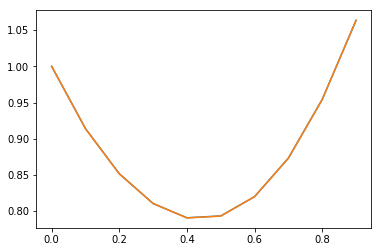

0.00027499362
0.00027499083
0.00027498807
0.0002749853
0.0002749825
0.00027497974
0.00027497698
0.00027497418
0.00027497142
0.00027496865
0.00027496586
0.0002749631
0.00027496033
0.00027495754
0.00027495477
0.000274952
0.0002749492
0.00027494645
0.0002749437
0.00027494098
0.0002749382
0.0002749355
0.00027493286
0.0002749303
0.00027492797
0.00027492607
0.00027492509
0.000274926
0.0002749307
0.00027494252
0.0002749677
0.00027501123
0.00027507465
0.0002751333
0.00027516234
0.000275162
0.00027516767
0.00027519622
0.00027522314
0.00027522774
0.00027522666
0.00027524043
0.00027525643
0.00027525757
0.00027525696
0.0002752669
0.00027527506
0.0002752735
0.00027527378
0.00027528024
0.0002752824
0.0002752798
0.0002752812
0.00027528463
0.00027528344
0.00027528135
0.00027528257
0.00027528298
0.00027528044
0.0002752791
0.00027527937
0.00027527788
0.0002752753
0.00027527416
0.00027527323
0.00027527078
0.00027526848
0.00027526717
0.00027526525
0.00027526257
0.00027526045
0.00027525867
0.00027525626
0.

0.00027423172
0.00027422898
0.00027422627
0.00027422357
0.00027422083
0.00027421812
0.0002742154
0.00027421268
0.00027420998
0.00027420724
0.00027420453
0.0002742018
0.0002741991
0.00027419638
0.00027419365
0.00027419094
0.00027418823
0.0002741855
0.0002741828
0.00027418006
0.00027417735
0.00027417464
0.0002741719
0.0002741692
0.0002741665
0.00027416376
0.00027416105
0.00027415834
0.0002741556
0.0002741529
0.00027415017
0.00027414746
0.00027414475
0.00027414202
0.0002741393
0.0002741366
0.00027413387
0.00027413116
0.00027412846
0.00027412572
0.000274123
0.0002741203
0.00027411757
0.00027411486
0.00027411216
0.00027410942
0.00027410671
0.000274104
0.00027410127
0.00027409857
0.00027409586
0.00027409315
0.00027409042
0.0002740877
0.000274085
0.00027408227
0.00027407956
0.00027407685
0.00027407412
0.0002740714
0.0002740687
0.000274066
0.00027406326
0.00027406056
0.00027405785
0.0002740551
0.0002740524
0.0002740497
0.000274047
0.00027404426
0.00027404155
0.00027403884
0.0002740361
0.000274

0.00027296564
0.0002729629
0.0002729602
0.0002729575
0.00027295476
0.00027295205
0.0002729493
0.0002729466
0.0002729439
0.00027294116
0.00027293846
0.00027293572
0.00027293302
0.0002729303
0.00027292757
0.00027292487
0.00027292213
0.00027291942
0.00027291672
0.00027291398
0.00027291127
0.00027290857
0.00027290583
0.00027290313
0.0002729004
0.00027289768
0.00027289498
0.00027289224
0.00027288953
0.00027288683
0.0002728841
0.00027288139
0.00027287868
0.00027287594
0.00027287324
0.0002728705
0.0002728678
0.0002728651
0.00027286235
0.00027285964
0.00027285694
0.0002728542
0.0002728515
0.0002728488
0.00027284605
0.00027284335
0.00027284064
0.0002728379
0.0002728352
0.0002728325
0.00027282975
0.00027282705
0.00027282434
0.0002728216
0.0002728189
0.0002728162
0.00027281346
0.00027281075
0.00027280804
0.00027280534
0.0002728026
0.0002727999
0.0002727972
0.00027279445
0.00027279175
0.00027278904
0.0002727863
0.0002727836
0.0002727809
0.00027277818
0.00027277545
0.00027277274
0.00027277003
0.000

0.00027218257
0.00027217992
0.0002721773
0.0002721747
0.00027217204
0.00027216942
0.00027216677
0.00027216415
0.00027216153
0.00027215888
0.00027215626
0.00027215361
0.000272151
0.00027214838
0.00027214573
0.0002721431
0.0002721405
0.00027213784
0.00027213522
0.00027213257
0.00027212992
0.00027212728
0.00027212463
0.00027212198
0.0002721193
0.00027211665
0.000272114
0.00027211133
0.00027210868
0.000272106
0.00027210335
0.0002721007
0.00027209803
0.00027209538
0.0002720927


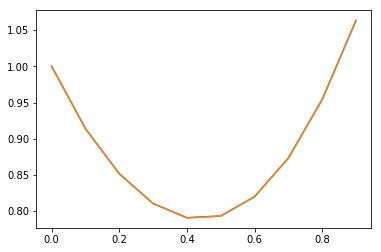

In [10]:
EPOCHS = 100000
for epoch in range(EPOCHS):
  train_step(Xs)
  print(train_loss.result().numpy())
  if (epoch+1) % 2000 == 0:
    pred = ts.call(tf.convert_to_tensor(Xs, dtype='float64')).numpy()
    plt.plot(Xs, pred)
    plt.plot(Xs, np.exp(-0.5*Xs**2)/(1+Xs+Xs**3) + Xs**2)
    plt.show()

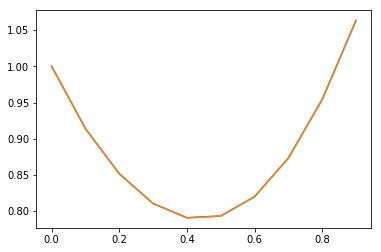

In [11]:
pred = ts.call(tf.convert_to_tensor(Xs, dtype='float64')).numpy()
plt.plot(Xs, pred)
plt.plot(Xs, np.exp(-0.5*Xs**2)/(1+Xs+Xs**3) + Xs**2)
plt.show()

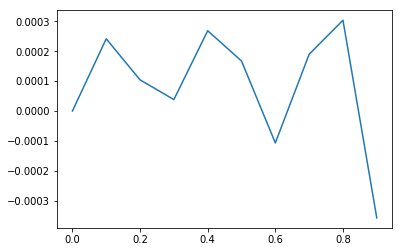

In [12]:
plt.plot(Xs, pred - np.exp(-0.5*Xs**2)/(1+Xs+Xs**3) - Xs**2)
plt.show()